### DESCRIPTION

###### Goal: Reduce the time a Mercedes-Benz spends on the test bench.

#### Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

##### Exploration Todos:

<form>
    <input type="checkbox" value="Task 1">  If for any column(s), the variance is equal to zero, then you need to remove those variable(s).<br>
    <input type="checkbox" value="Task 2">  Check for null and unique values for test and train sets.<br>
    <input type="checkbox" value="Task 3">  Apply some encoding to the categorical variables<br>
    <input type="checkbox" value="Task 3">  Perform dimensionality reduction.<br>
    <input type="checkbox" value="Task 3">  Build a Predictor Model<br>
    
    
    
</form>

#### Exploratory Data Analysis

In [48]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [49]:
#importing the data set
df_train = pd.read_csv("train.csv")

In [50]:
#Taking a look to few of the rows of our data
df_train.head(5)

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

In [51]:
#shape of our data
df_train.shape

(4209, 378)

So we can see above that our dataset has 4209 entries(rows or data points) and 378 columns(or features), pretty decent amount of data!! and by looking few rows of our data we can see that column named "<b>y</b>" is our target variable and we can also observe that column named "<b>ID</b>" is of no use so we can think of dropping the "id column". Let us explore more about our Data.

In [52]:
#Description of our dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


We can see above that we have 8 columns with datatype of <b>object</b> indicating that those 8 columns are of categorical type and we can infer that our <b>y</b> feature is of <b>float64</b> type. 

In [53]:
#statistical summary of our dataset(only columns with numerical values)
df_train.describe()

ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16          X17  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean      0.057971     0.428130     0.000475     0.002613     0.007603  ...   
std       0.233716     0.494867     0.021796     0.051061     0.086872  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              X375         X376         X377         X378         X379  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.318841     0.057258     0.314802     0.020670     0.009503   
std       0.466082     0.232363     0.464492     0.142294     0.097033   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.008078     0.007603     0.001663     0.000475     0.001426  
std       0.089524     0.086872     0.040752     0.021796     0.037734  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 370 columns]

In [54]:
#Taking a look into our columns
df_columns = df_train.columns
df_columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [55]:
#Checking if we have any zero variance columns
#and if we have zero variance columns, we drop them
print("Variances of the Features: ")
for i in range(len(df_columns)):
    if df_train.iloc[:, i].dtype == "object":
        pass
    else:
        print(df_train.iloc[:,i].var())
        if df_train.iloc[:,i].var() == 0:
            df_train.drop(df_columns[i], axis=1)
            
df_train.head(5)

Variances of the Features: 
5941936.117997081
160.76670968227825
0.013130924408767376
0.0
0.0694571292549823
0.05462335372237836
0.24489291460359702
0.00047505932877854525
0.002607236710760122
0.007546747102668826
0.00778071975045327
0.08965996727996409
0.12242957558807083
0.002607236710760122
0.07941395271945777
0.020247554805156793
0.001897527207224786
0.004965595180344132
0.21671422906012558
0.031497325575197806
0.041163602889697705
0.004494826855723791
0.1784108062841982
0.011044480097419348
0.0002375861249703018
0.005435911820316234
0.1784108062841982
0.004494826855723791
0.1784108062841982
0.03216333458901666
0.0002375861249703018
0.0007124196114247309
0.011276758927772915
0.00023758612497030185
0.06702548495122258
0.011276758927772915
0.1891676761818555
0.24059152169847883
0.012668060565491114
0.021839517347852288
0.10723162930782941
0.1682812134417738
0.2008584040897335
0.04051148317881203
0.00684415163234315
0.04159778475781122
0.0052008099609112115
0.020702965851737223
0.0131

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

We can see above that there are no <b>zero variance</b> columns. We can continue our further data exploration

In [56]:
#Check if there are any missing values in our dataset

for i in range(len(df_columns)):
    if df_train.iloc[:, i].isna().any() == True:
        print("There are missing values in: ",df_columns[i])

Here we get no output that means, <b>we don't have any missing values</b> in the Dataset! So let us continue our data exploration.

In [57]:
#Let us view our categorical columns
print("Categorical Features: ")
cat_columns = []
for i in range(len(df_columns)):
    if df_train.iloc[:,i].dtype == "object":
        cat_columns.append(df_columns[i])
cat_columns

Categorical Features: 


['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

So we got the <b>Categorical Features</b> above!!

In [58]:
#Checking the Cardinality of our categorical features
df_train[["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]].nunique()

X0    47
X1    27
X2    44
X3     7
X4     4
X5    29
X6    12
X8    25
dtype: int64

In [59]:
#Detailed Cardinality
for i in cat_columns:
    print(df_train[i].value_counts())

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
aq     18
i      18
am     18
u      17
aw     16
l      16
ad     14
b      11
k      11
au     11
as     10
r      10
bc      6
ao      4
c       3
aa      2
q       2
ab      1
ac      1
g       1
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
f      23
y      23
j      22
n      19
k      17
p       9
g       6
ab      3
d       3
q       3
Name: X1, dtype: int64
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
z       19
ag   

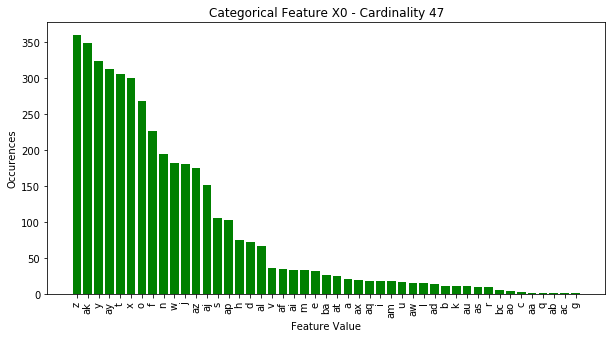

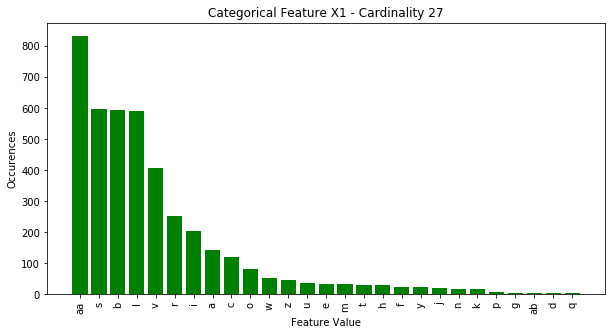

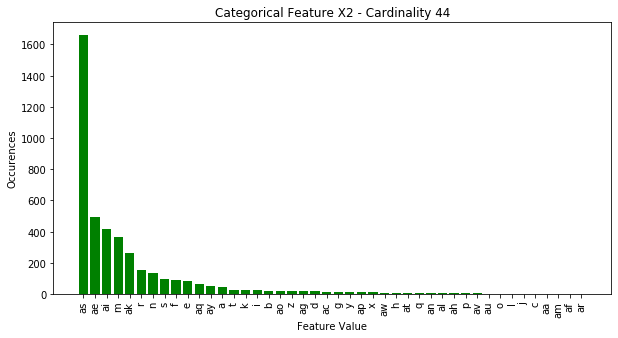

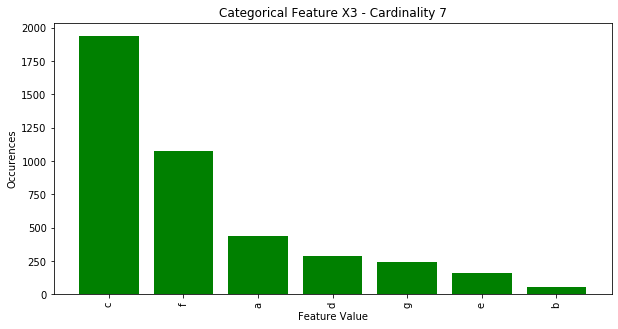

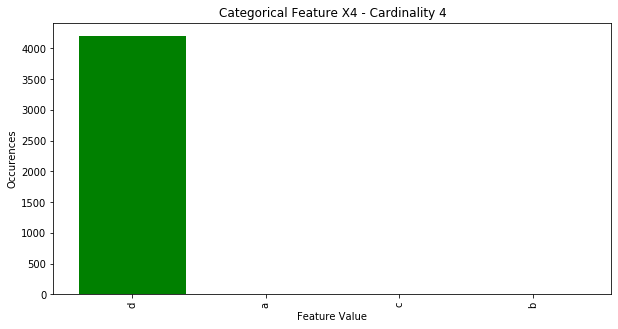

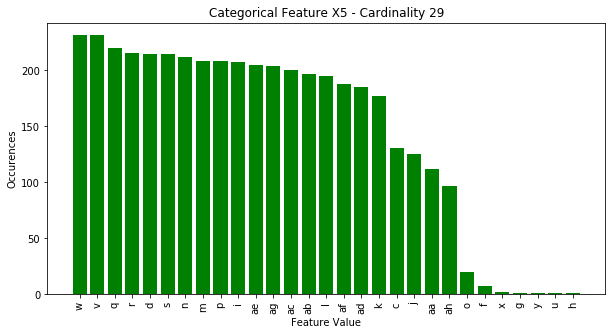

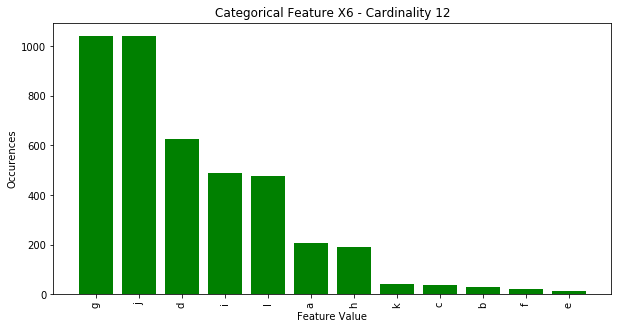

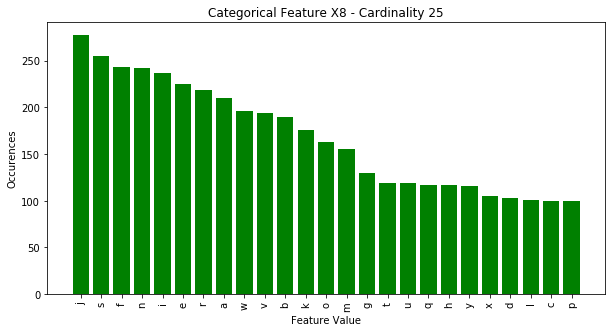

In [60]:
#Let us Plot the Cardinalities
for c in cat_columns:
    value_count = df_train[c].value_counts()
    fig, ax = plt.subplots(figsize=(10, 5)) 
    plt.title("Categorical Feature {} - Cardinality {}".format(c, len(np.unique(df_train[c]))))
    plt.xlabel("Feature Value")
    plt.ylabel("Occurences")
    plt.bar(range(len(value_count)), value_count.values, color="green")
    ax.set_xticks(range(len(value_count)))
    ax.set_xticklabels(value_count.index, rotation=90)
    plt.show()

In [61]:
numerical_columns = df_train.iloc[:, 10:].columns
numerical_columns
#categorical_data = df_train[["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]]

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

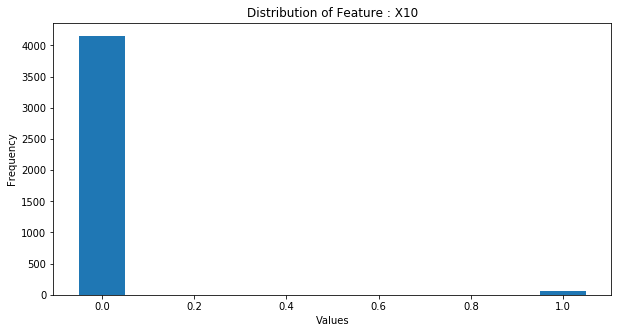

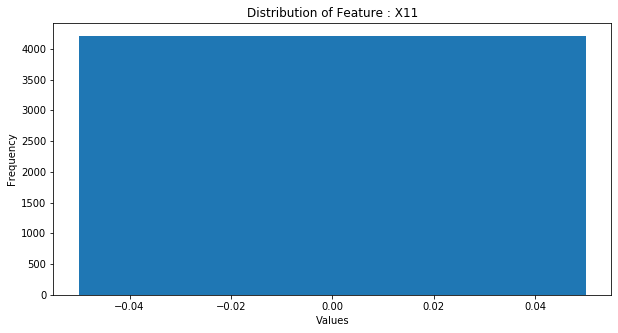

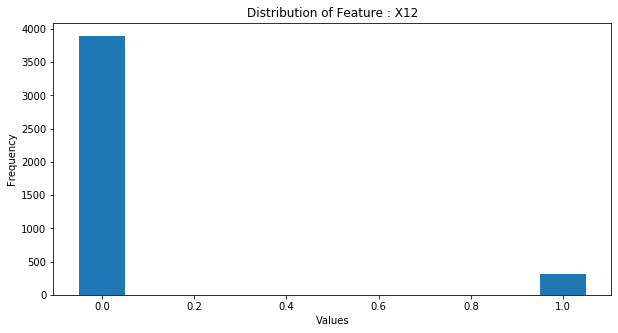

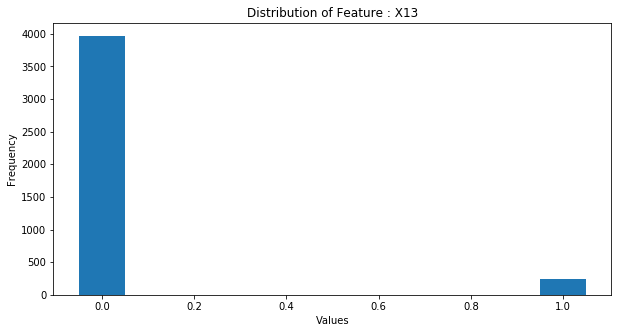

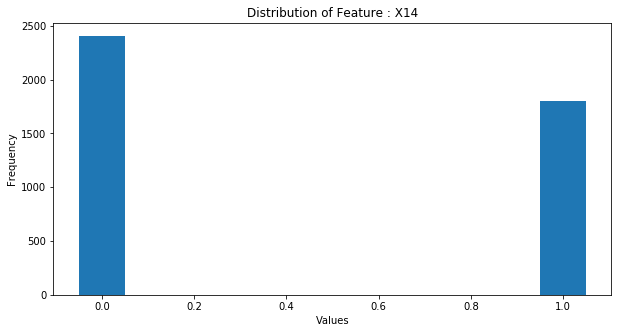

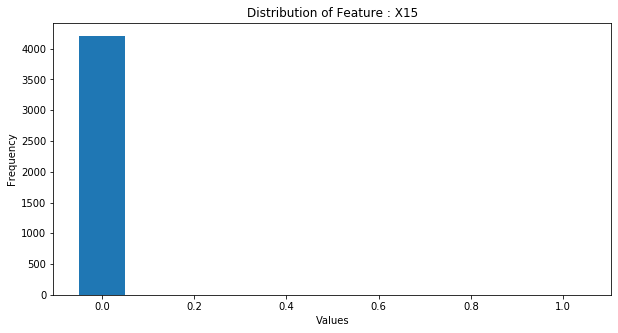

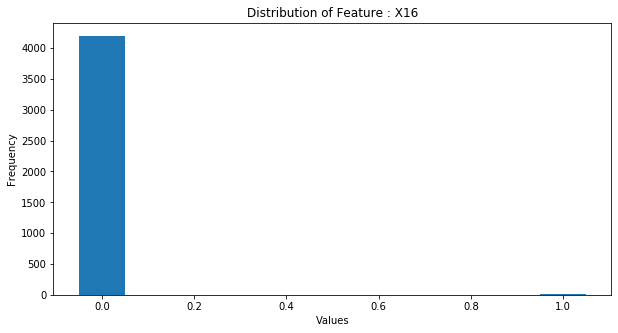

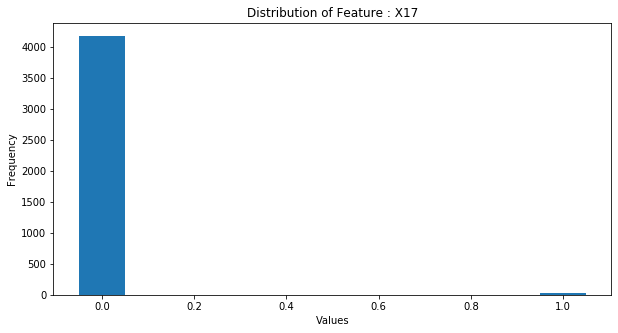

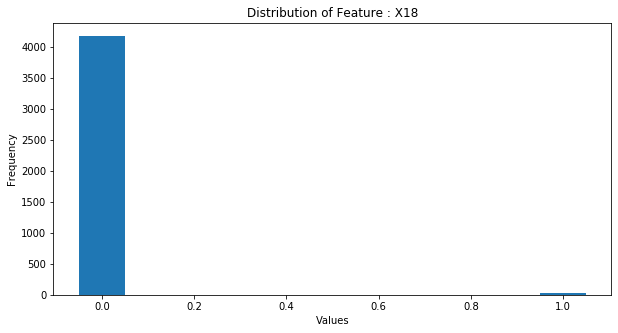

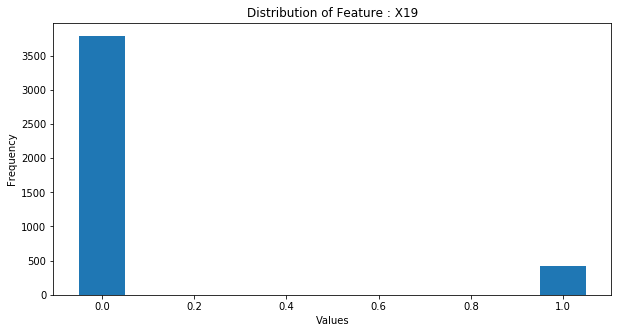

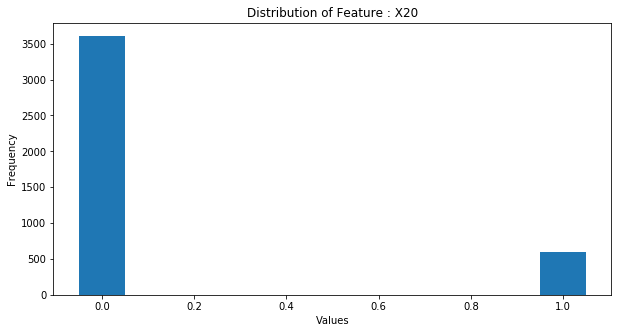

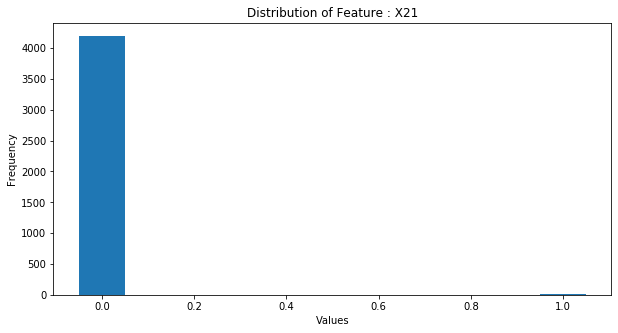

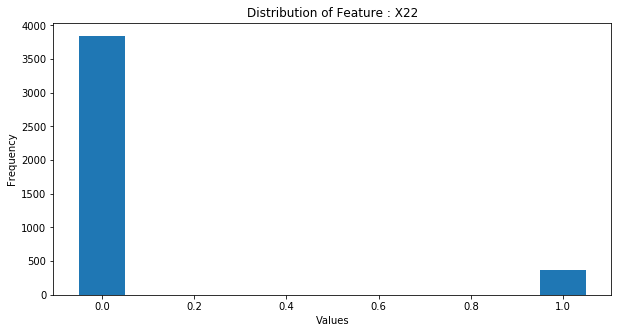

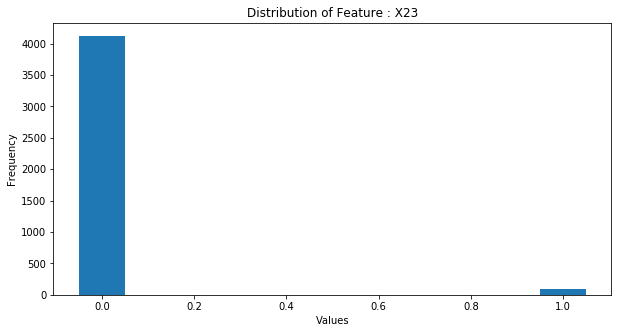

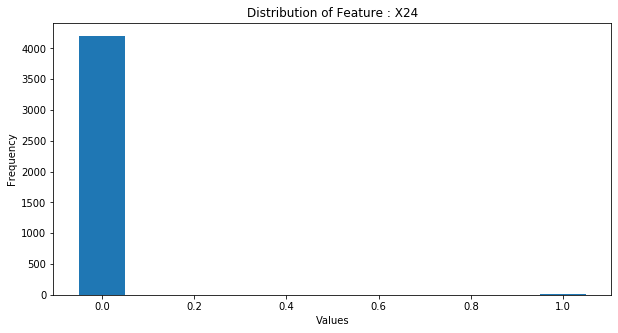

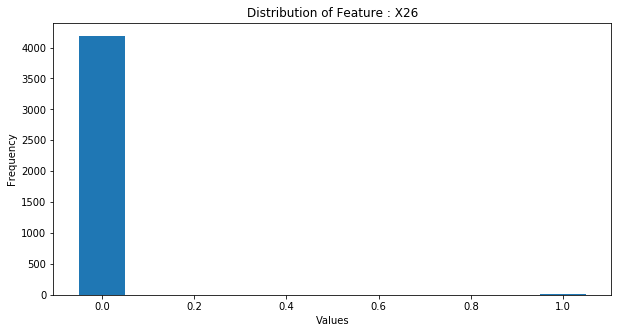

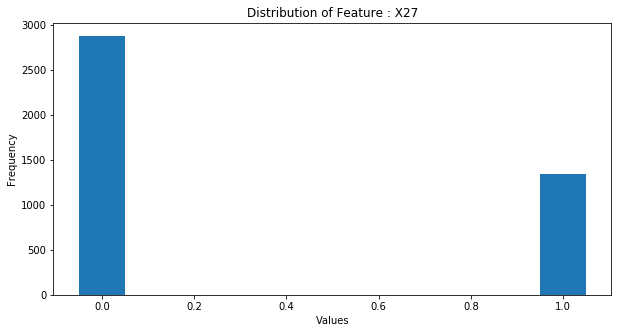

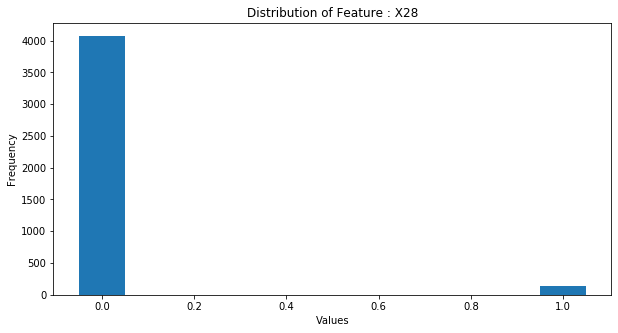

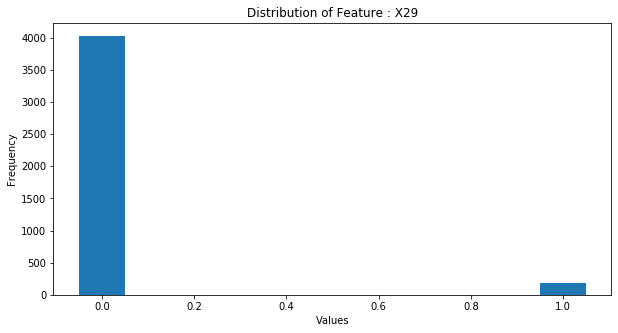

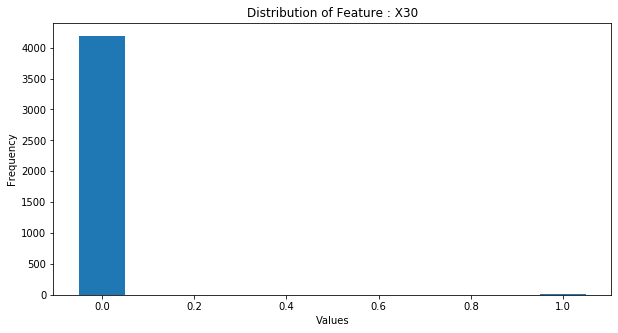

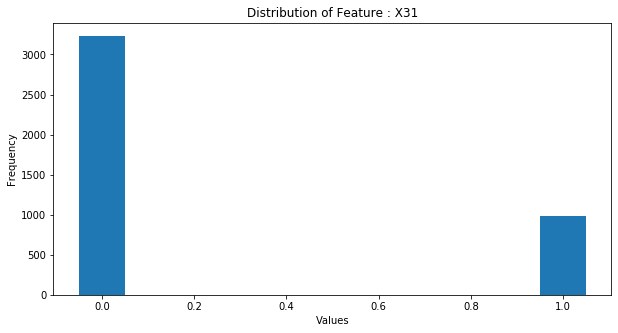

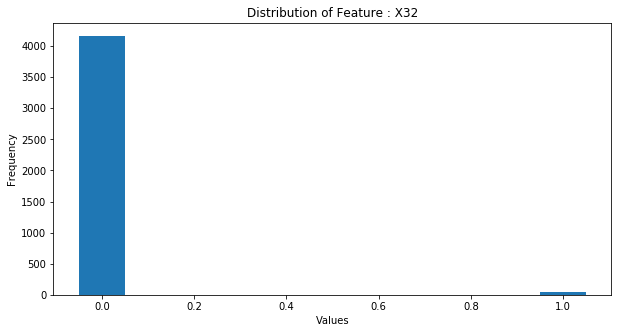

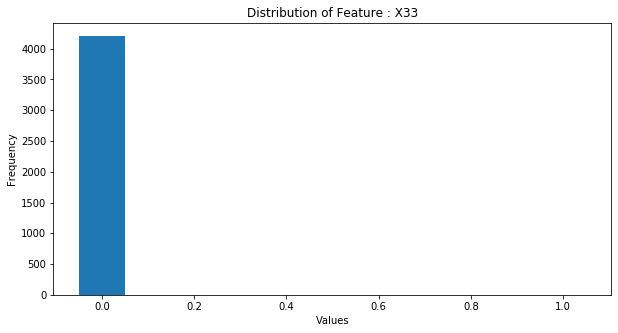

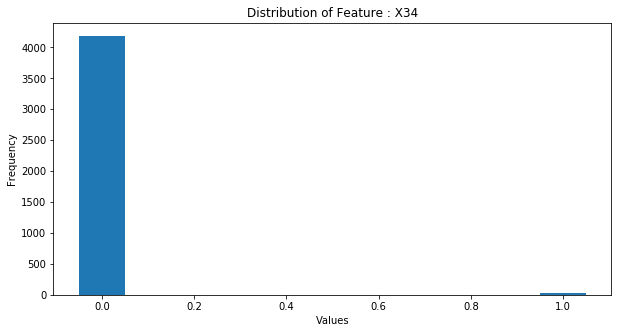

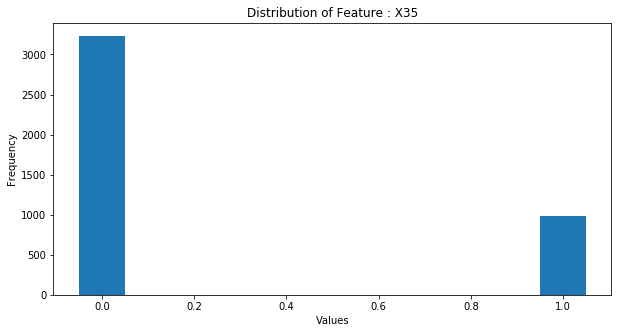

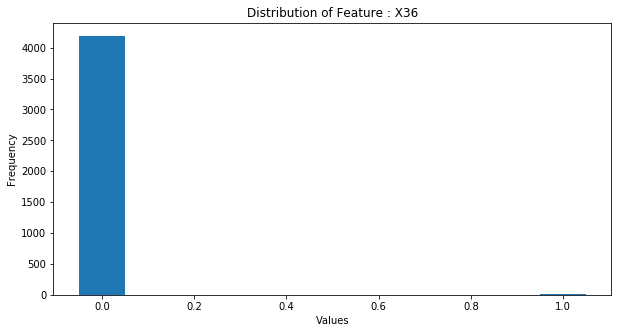

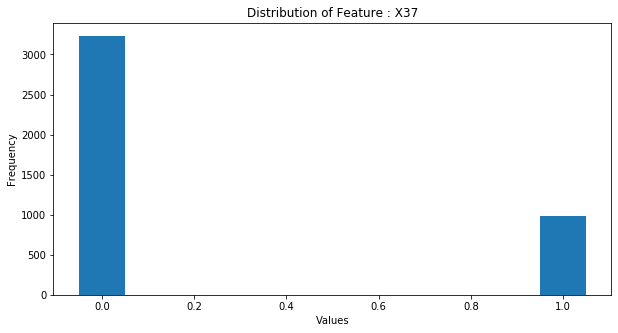

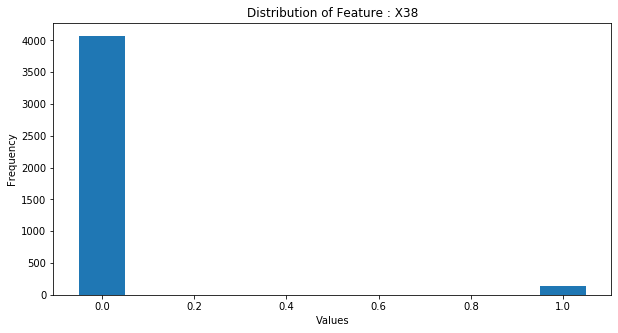

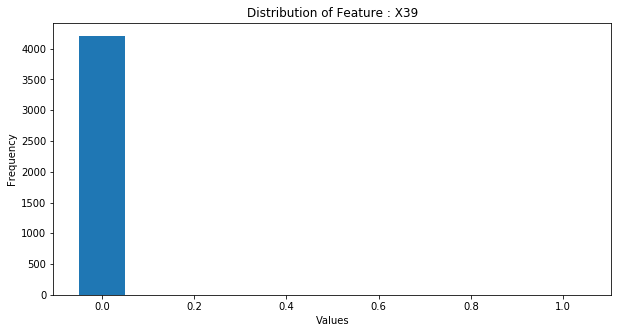

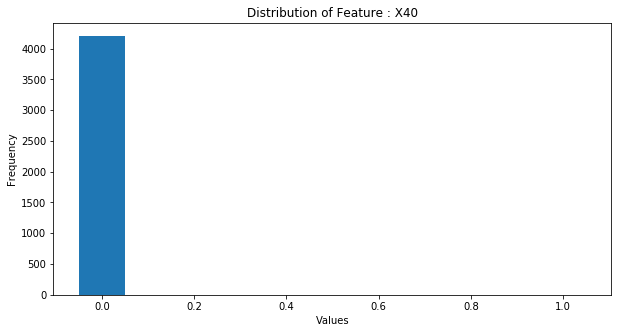

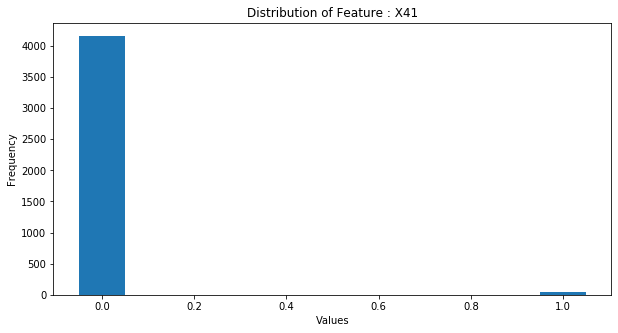

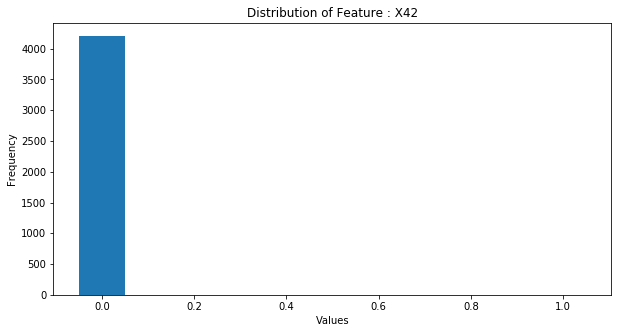

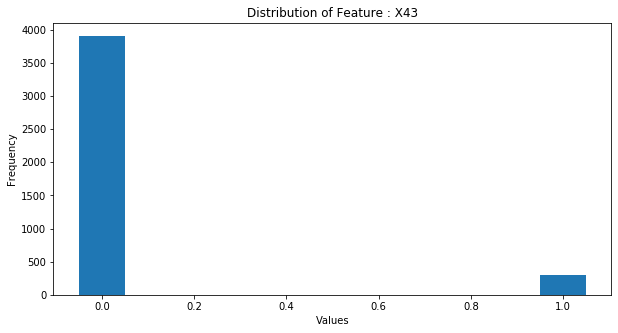

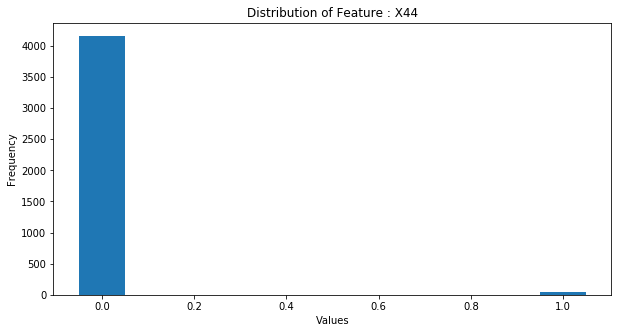

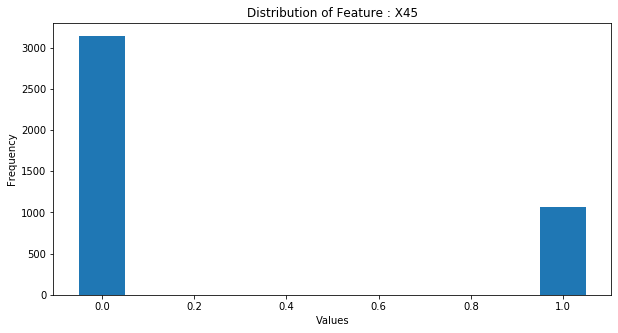

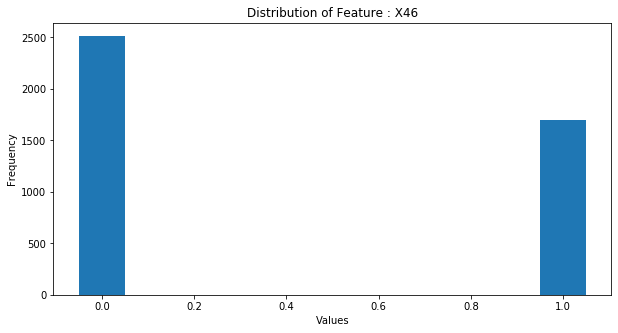

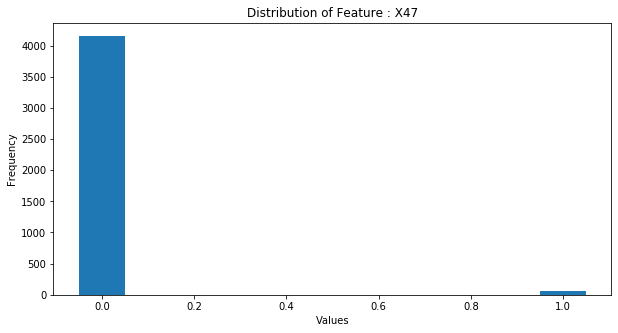

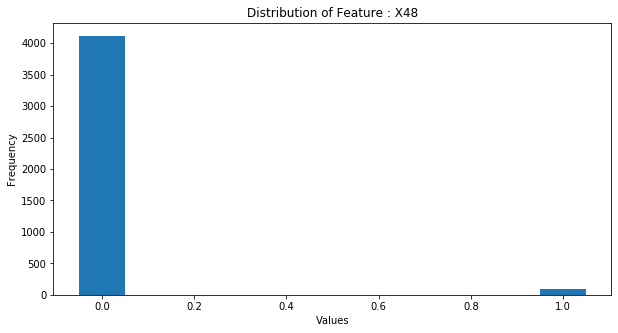

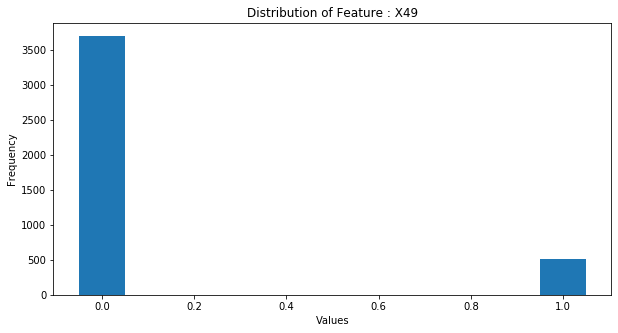

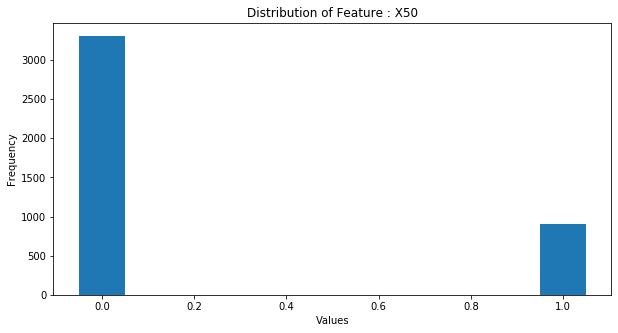

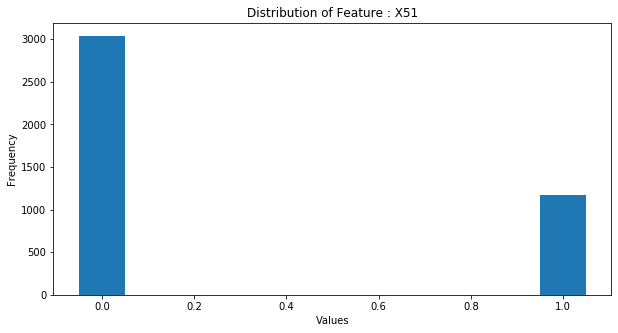

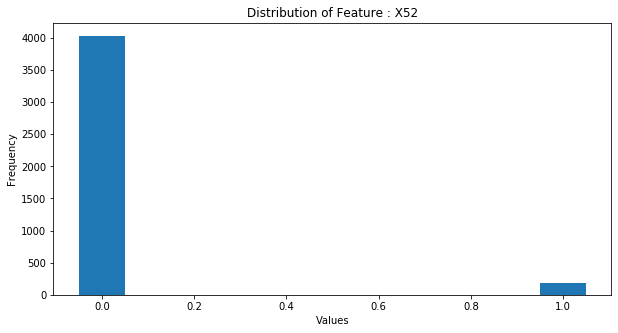

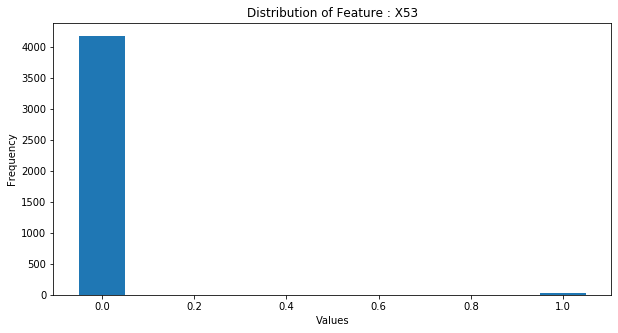

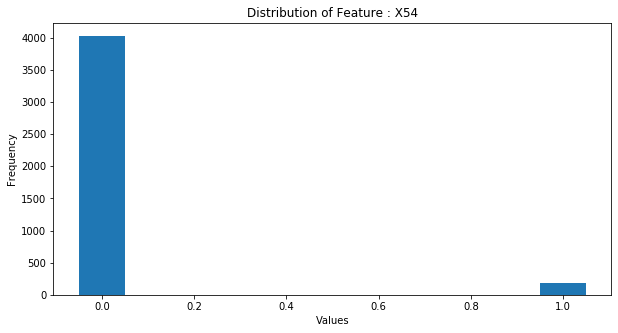

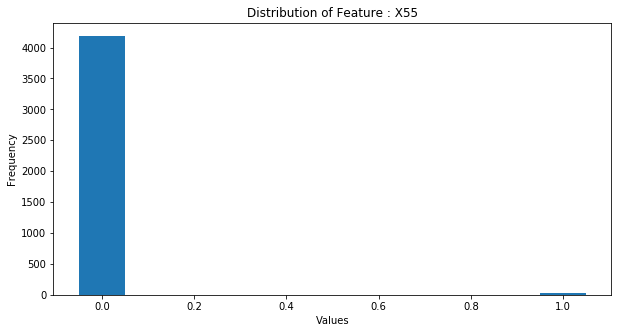

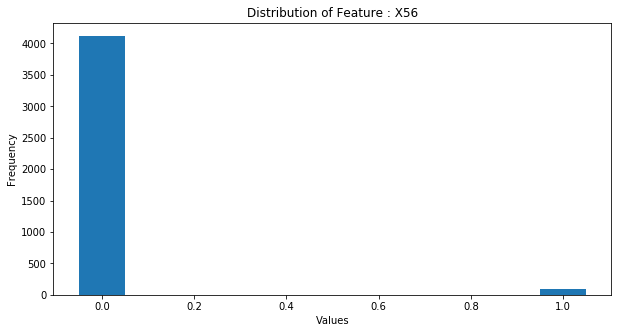

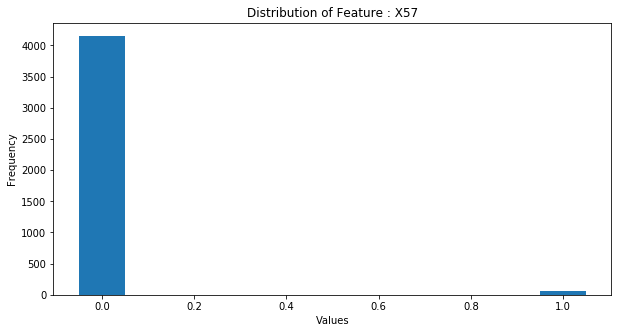

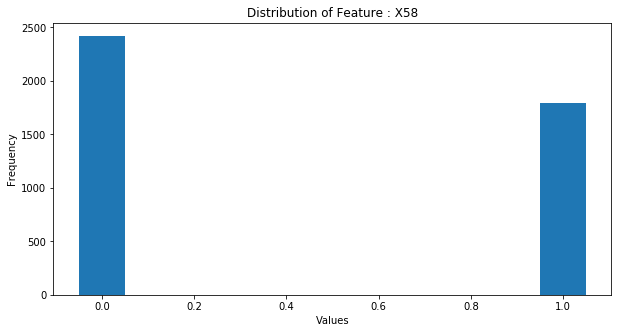

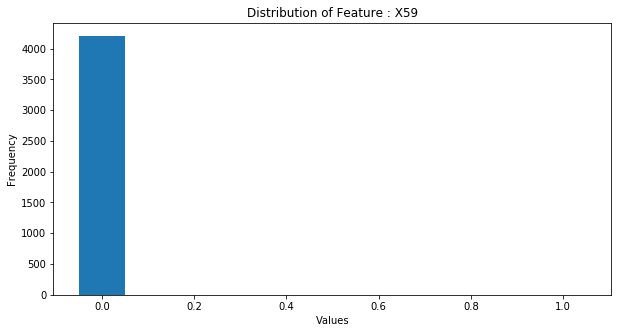

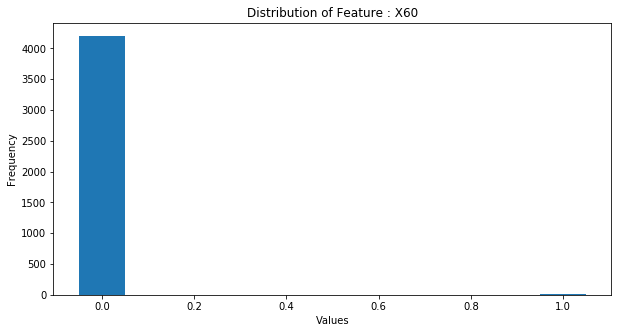

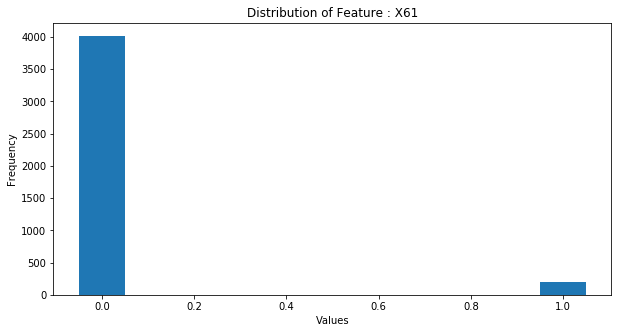

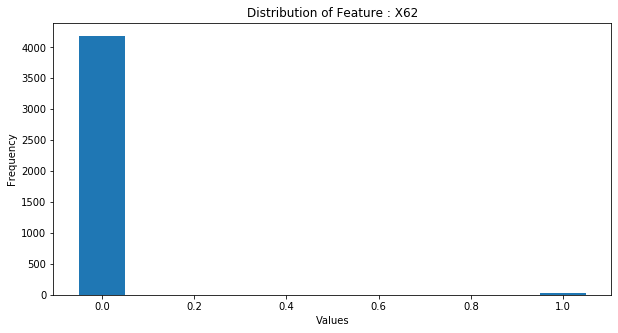

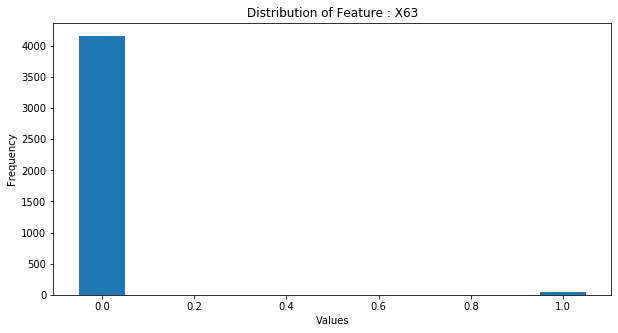

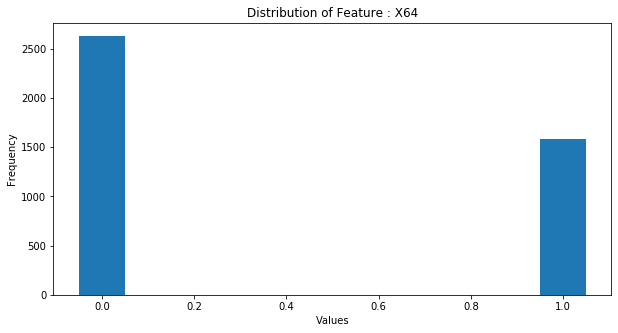

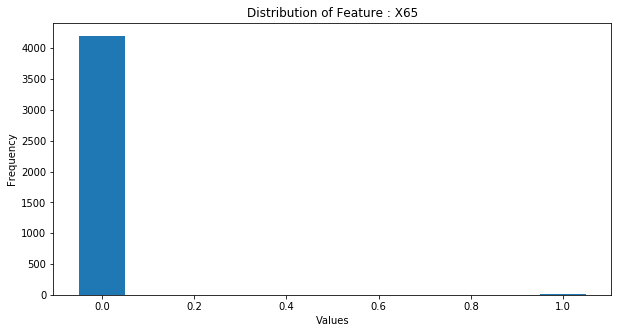

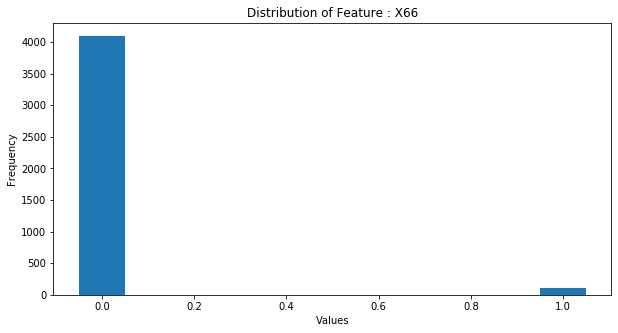

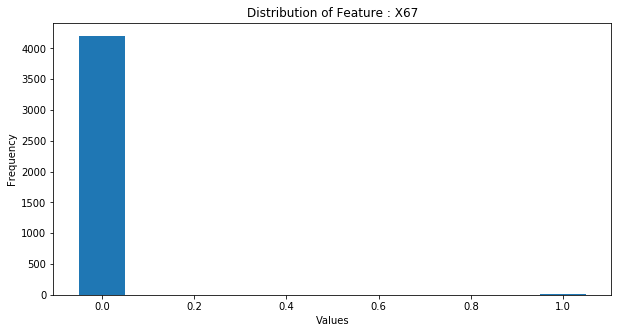

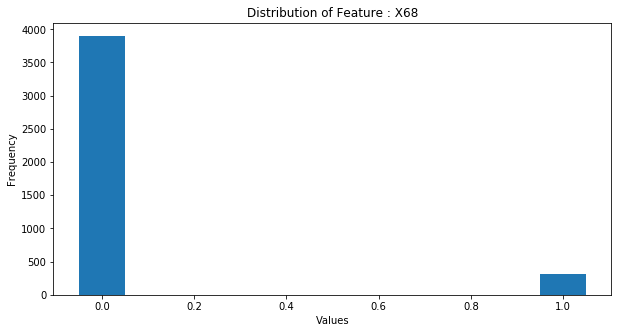

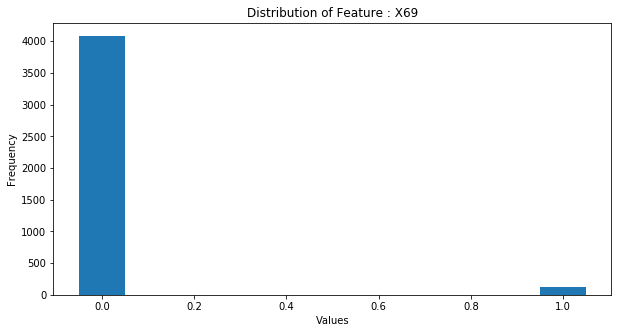

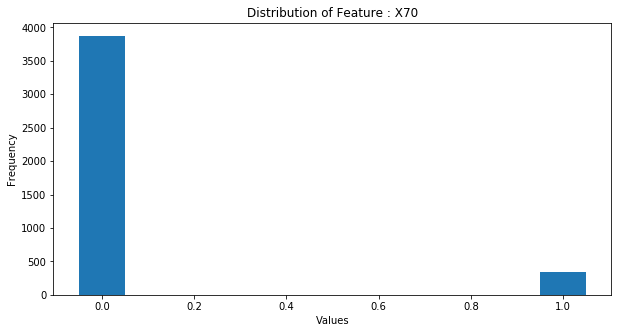

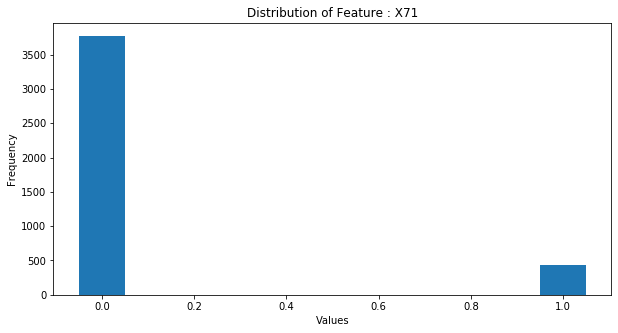

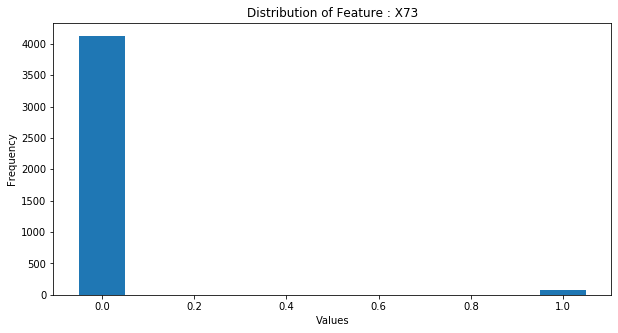

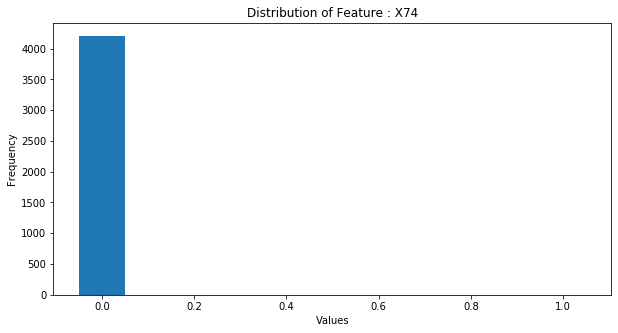

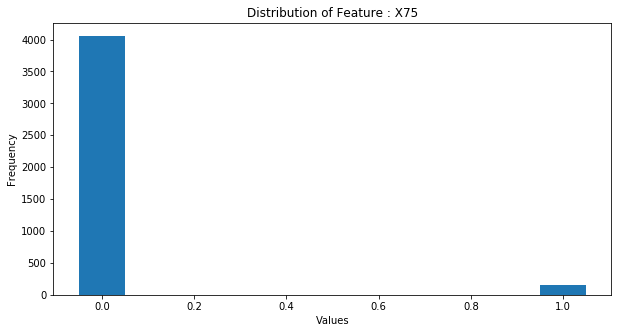

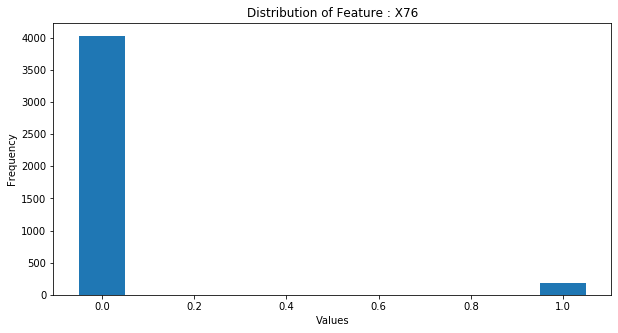

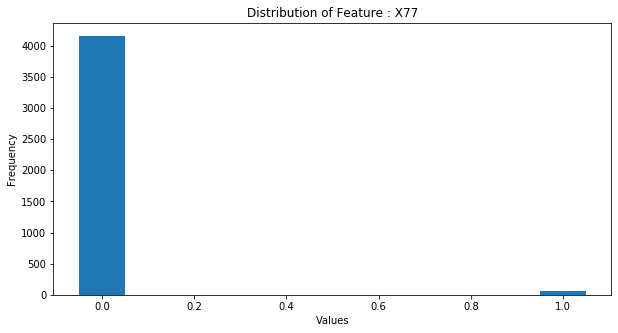

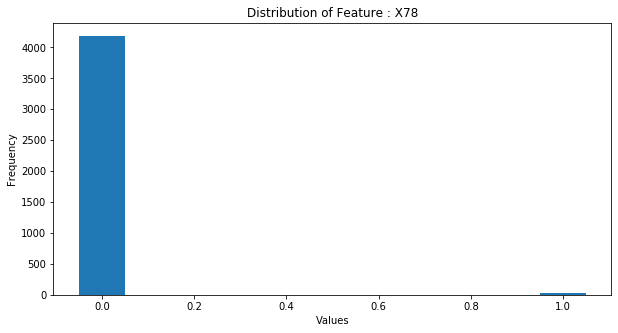

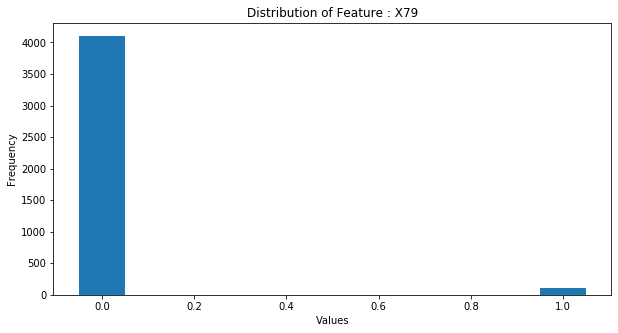

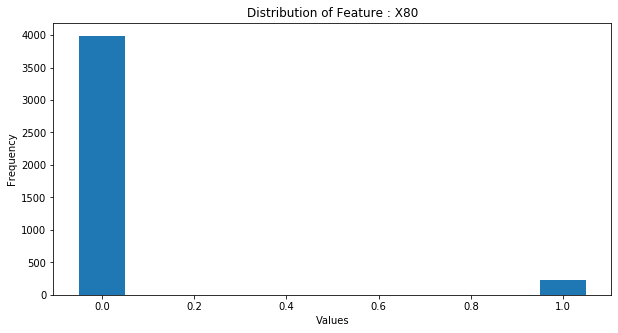

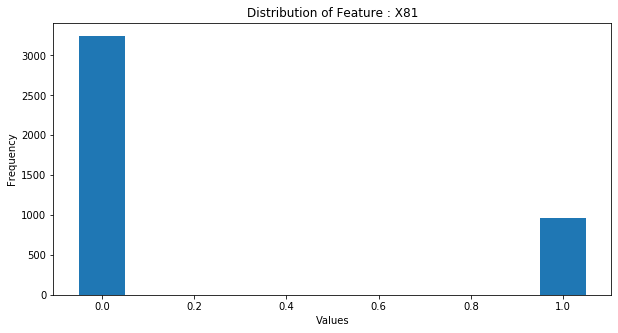

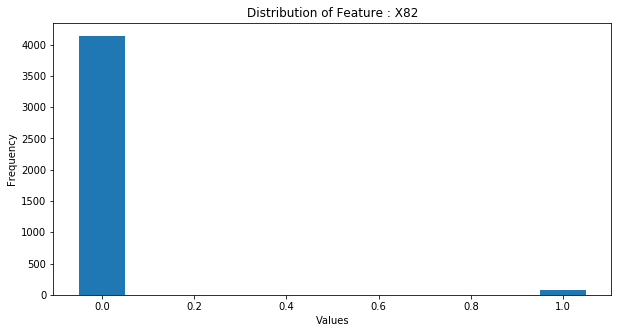

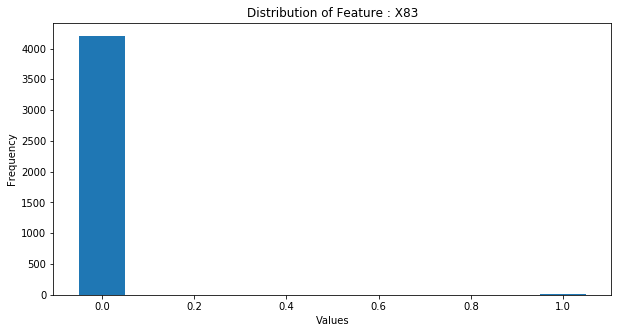

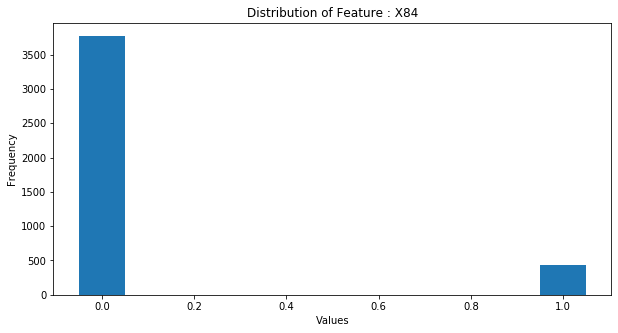

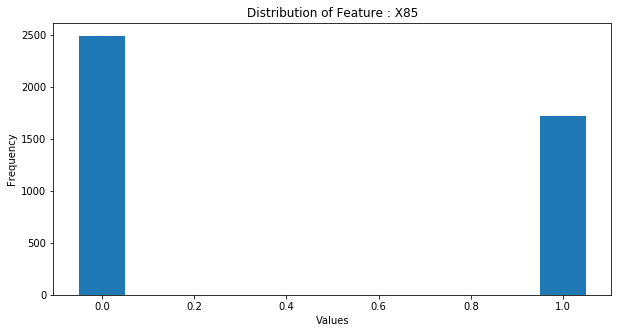

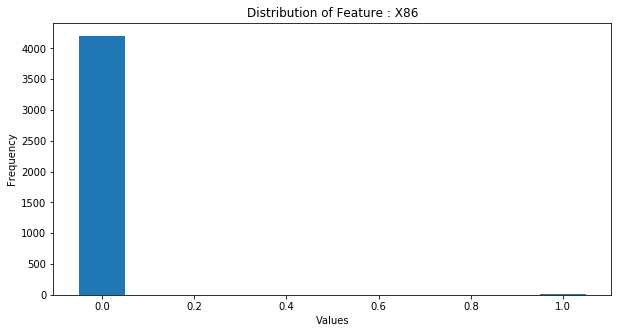

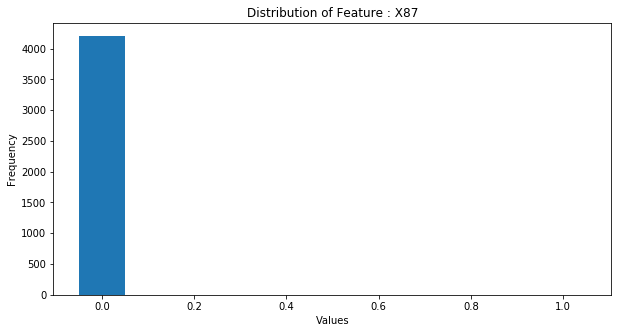

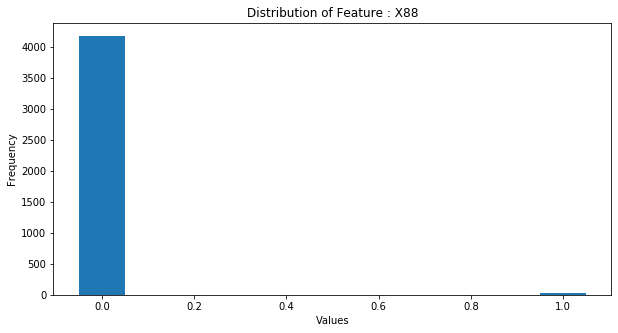

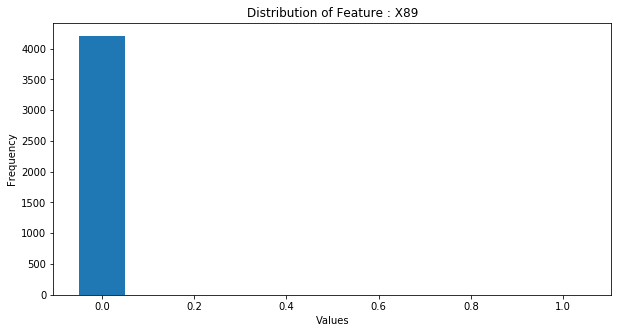

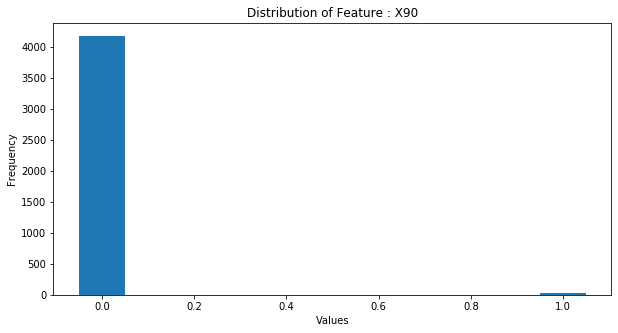

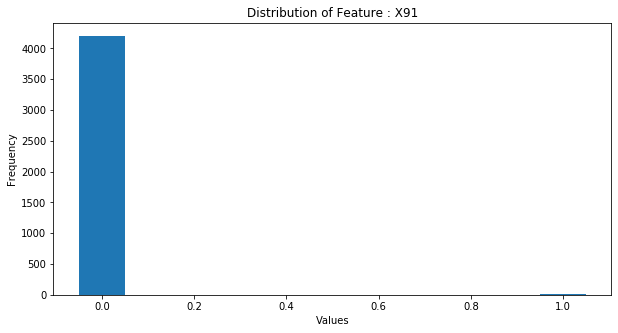

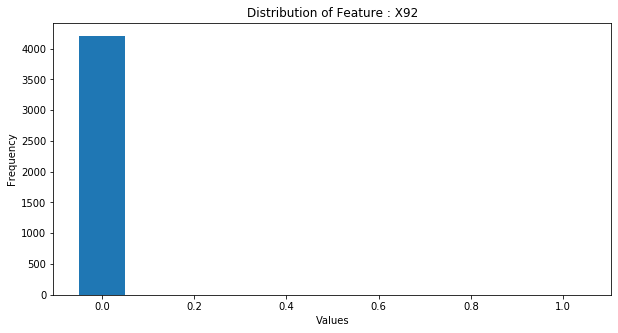

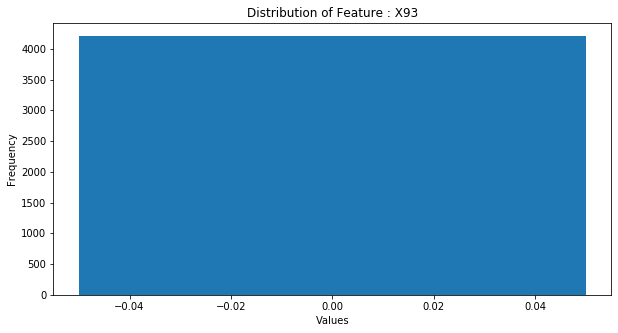

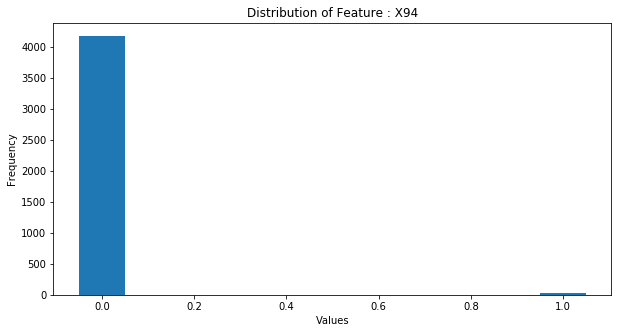

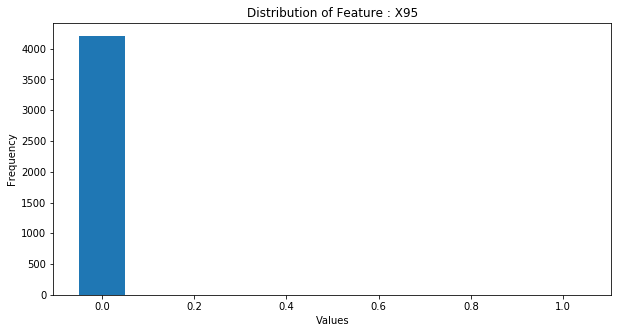

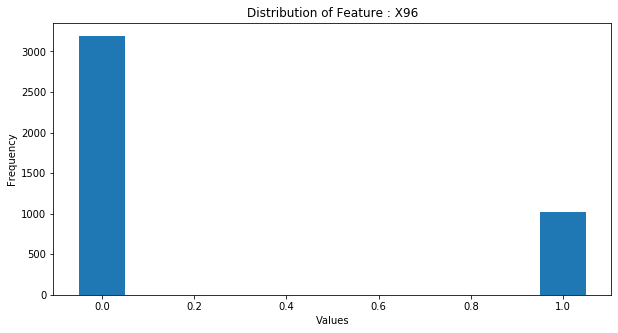

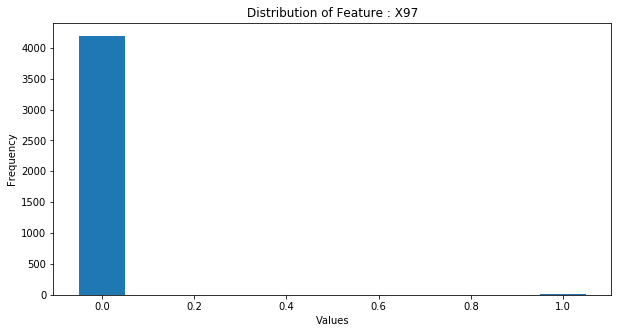

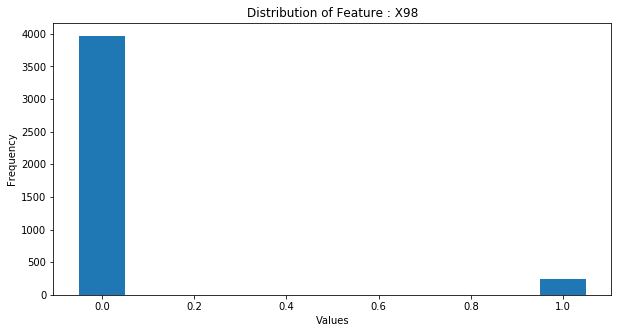

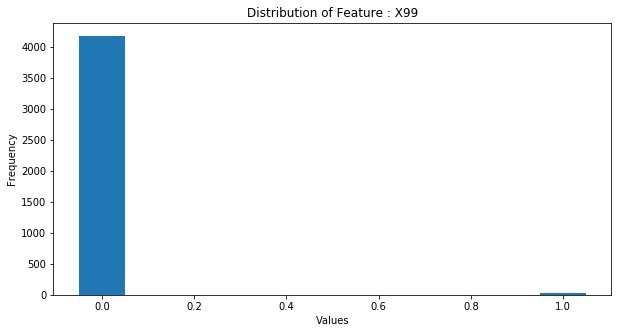

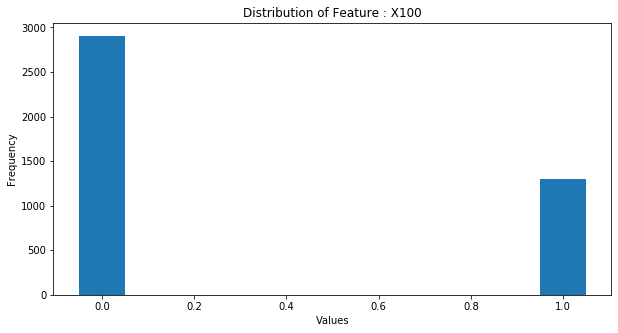

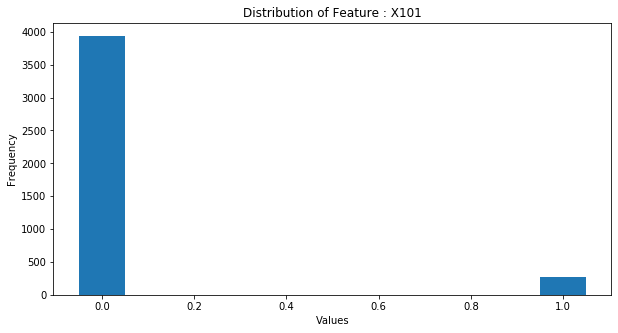

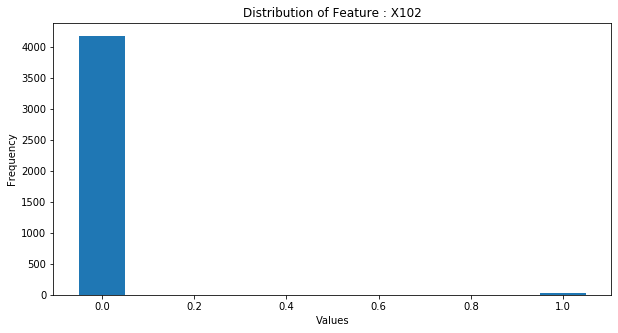

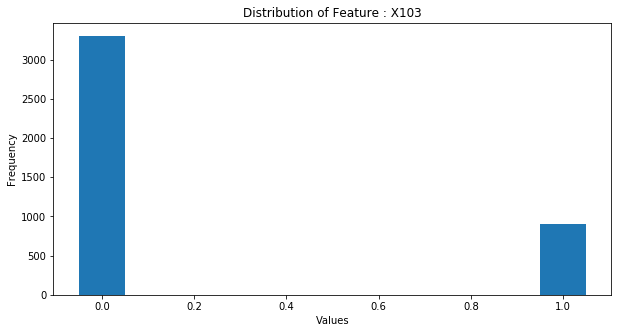

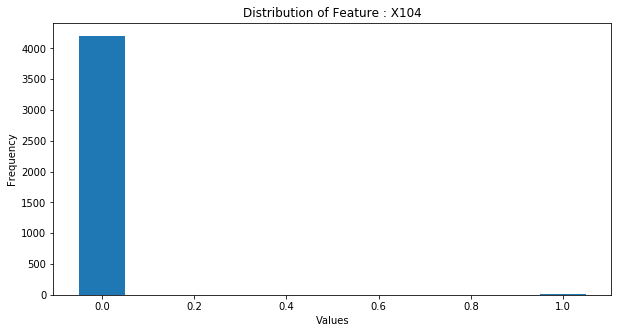

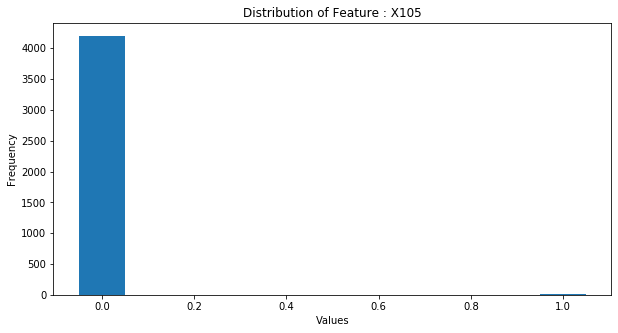

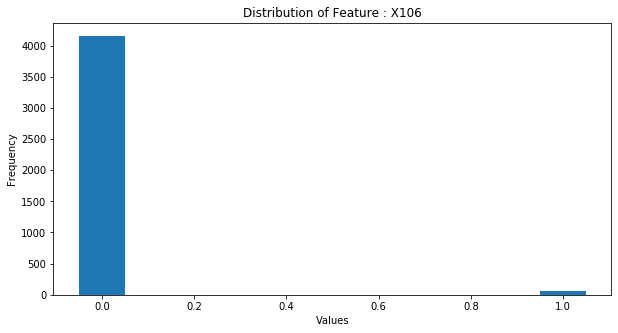

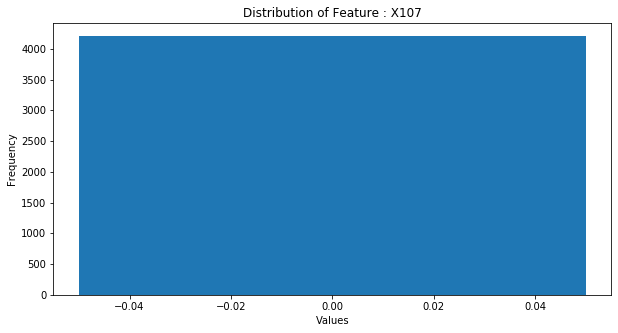

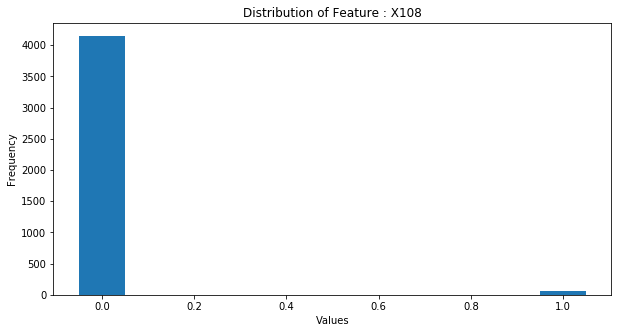

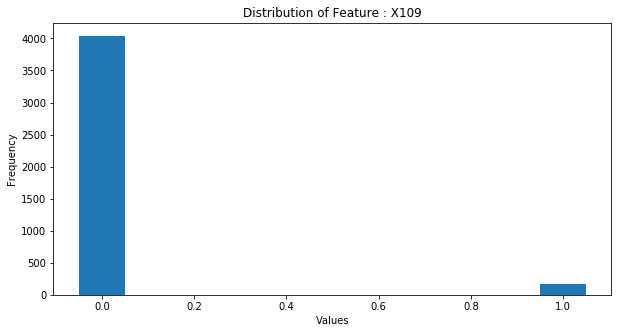

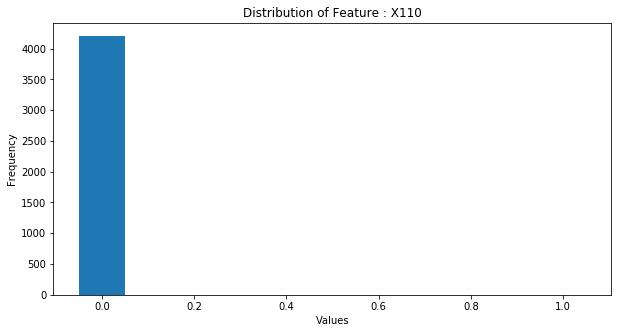

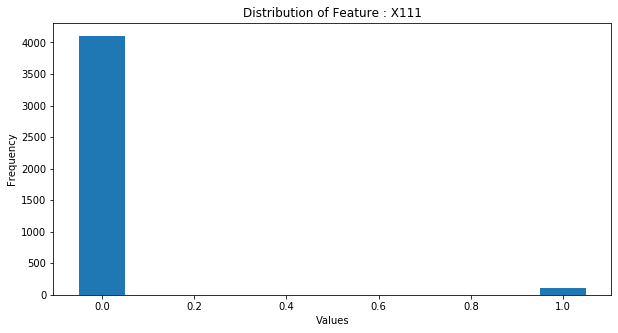

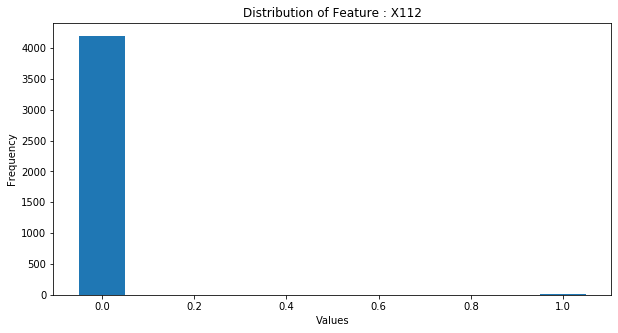

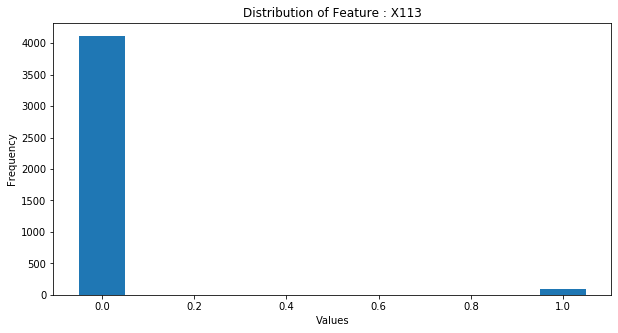

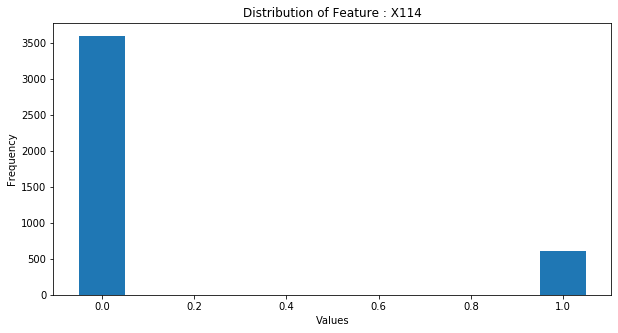

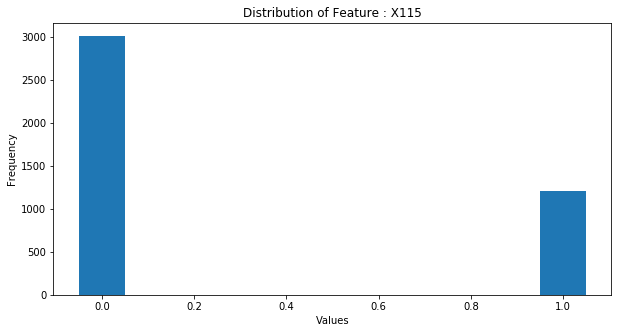

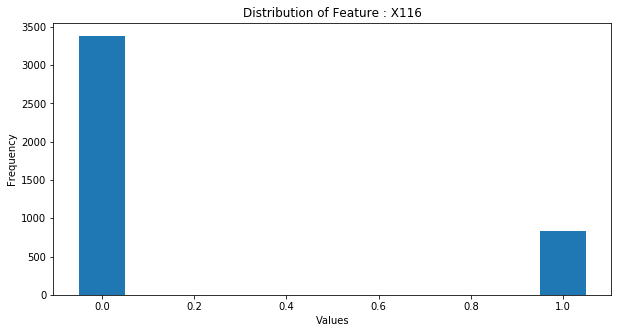

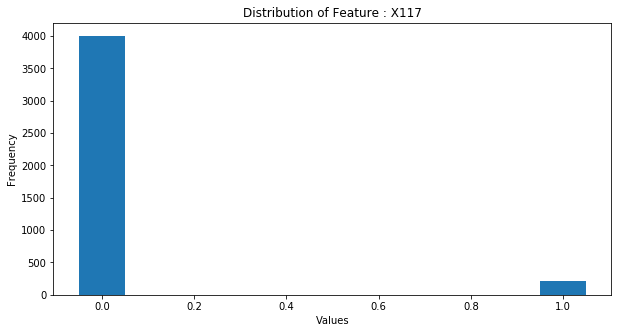

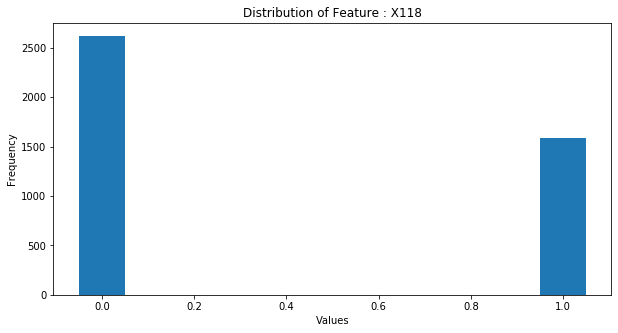

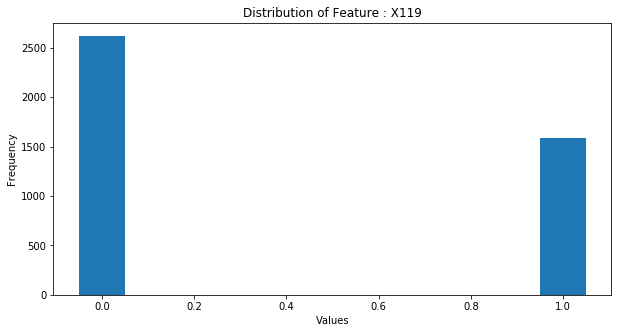

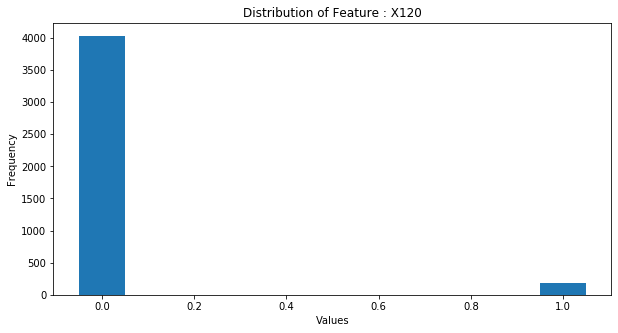

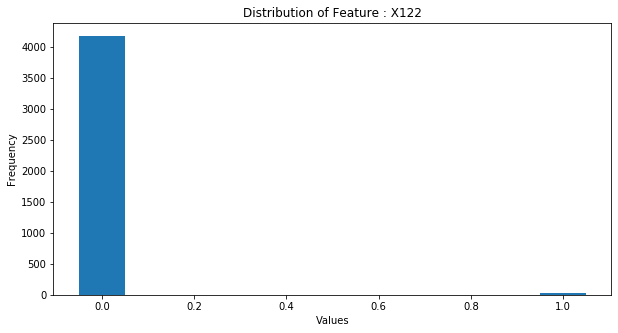

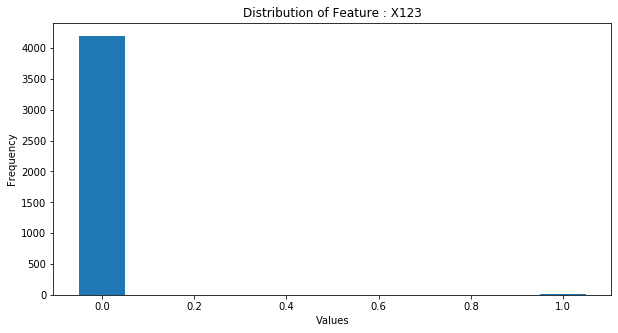

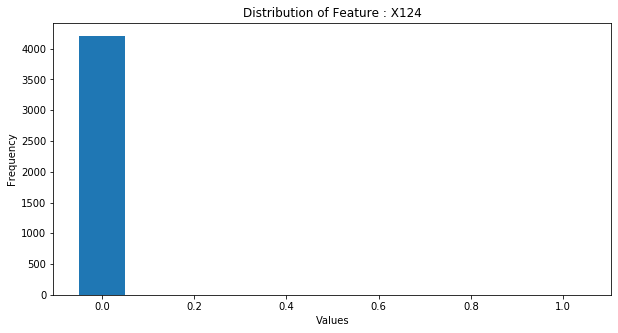

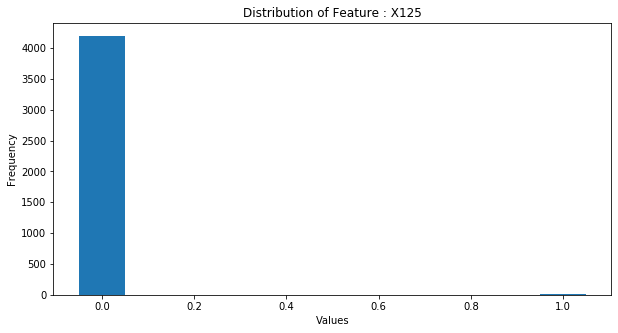

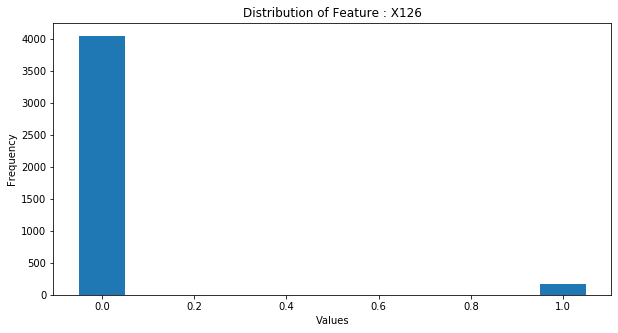

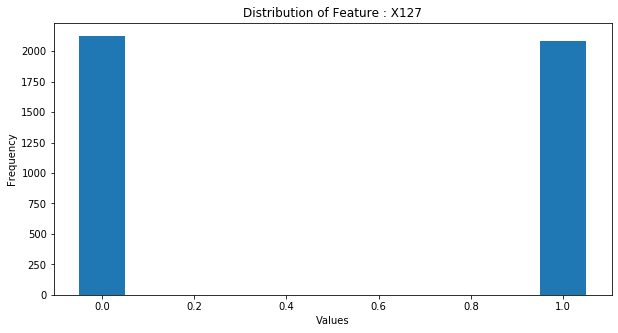

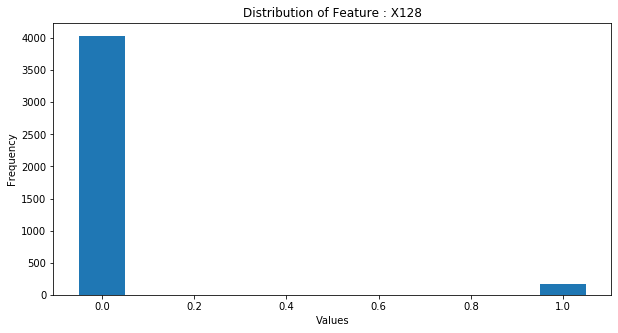

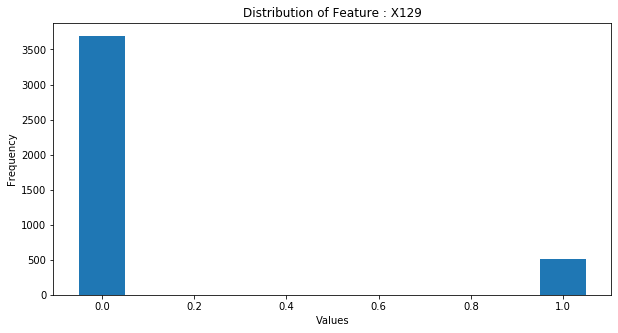

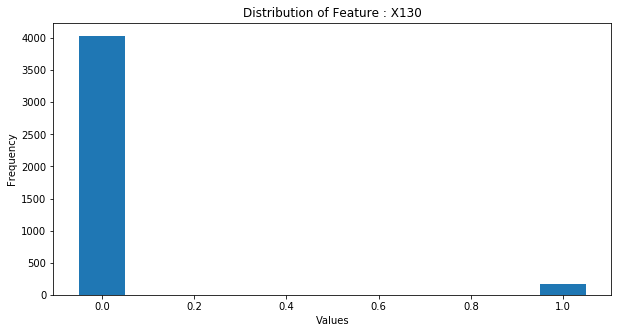

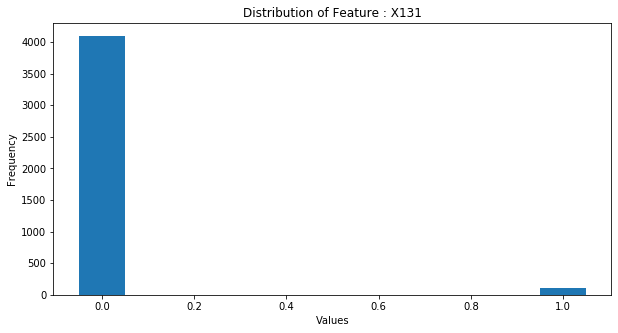

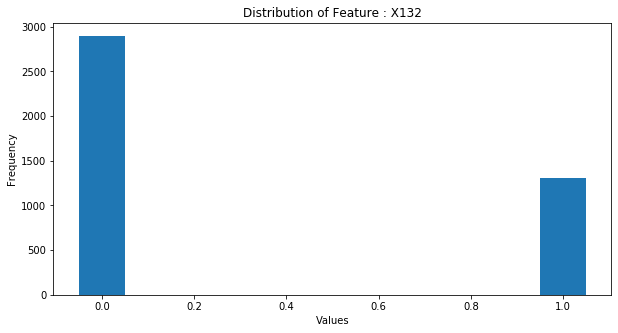

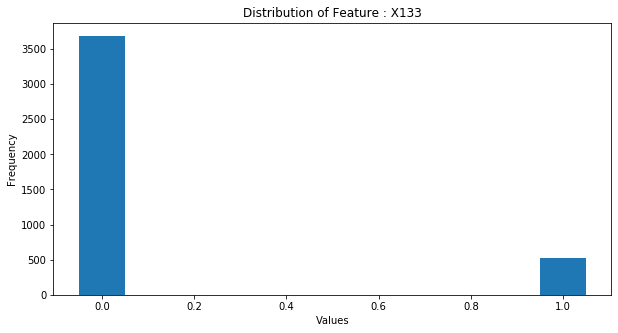

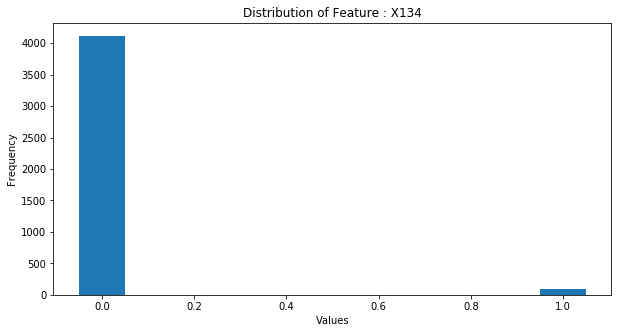

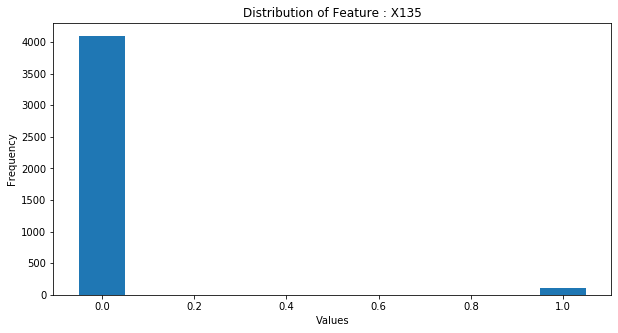

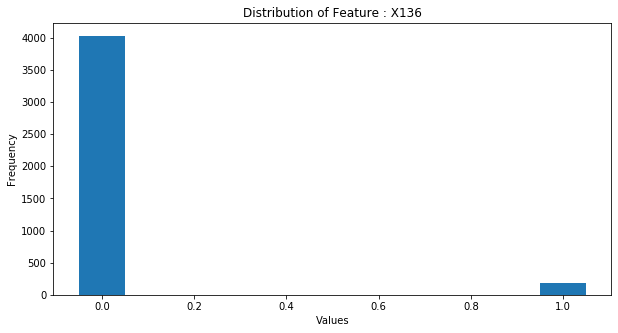

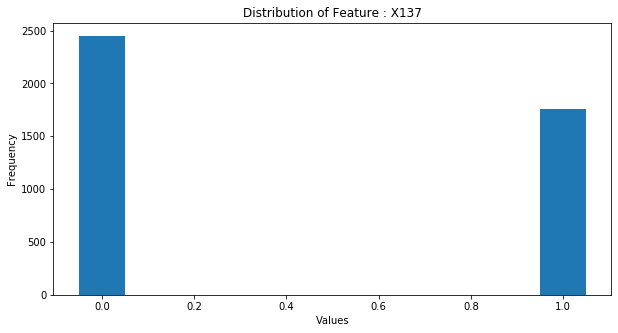

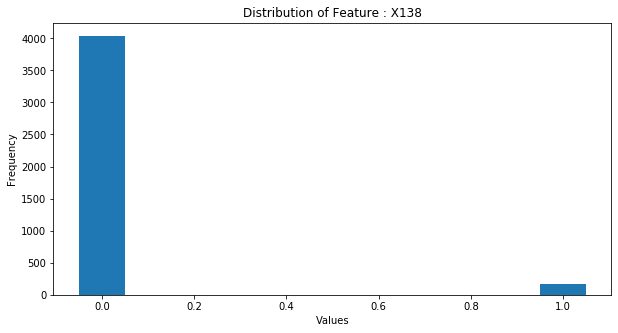

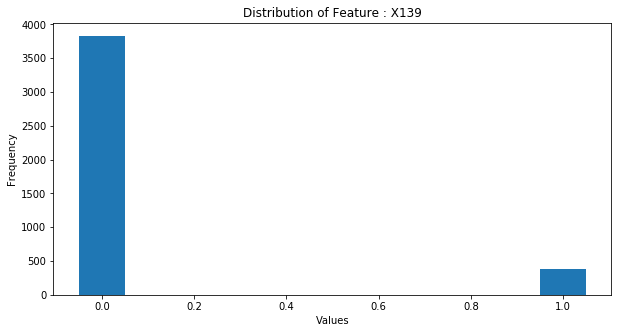

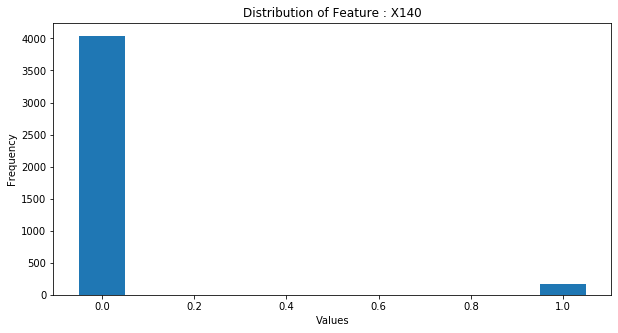

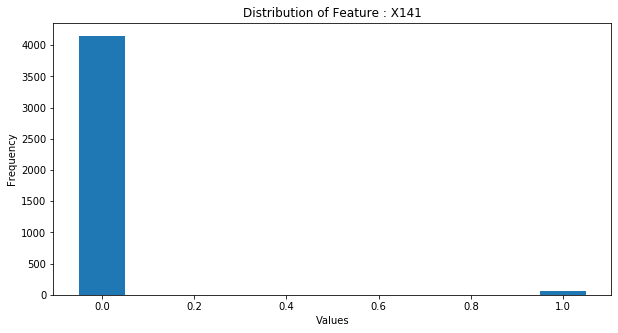

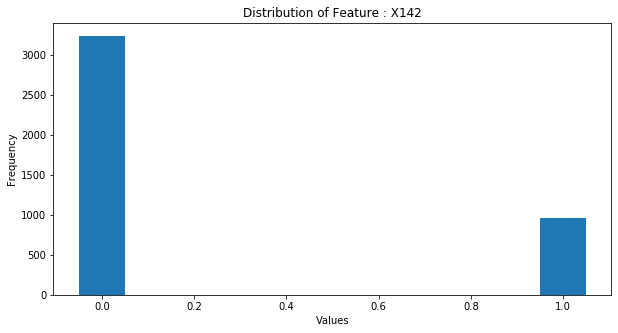

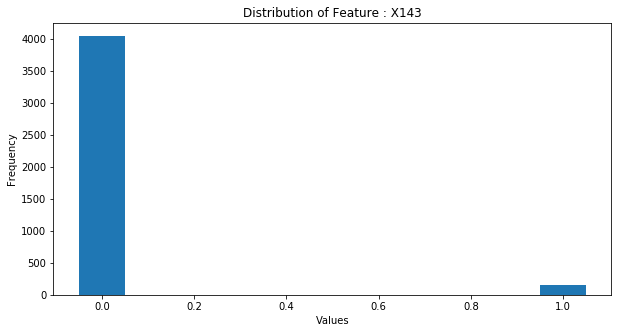

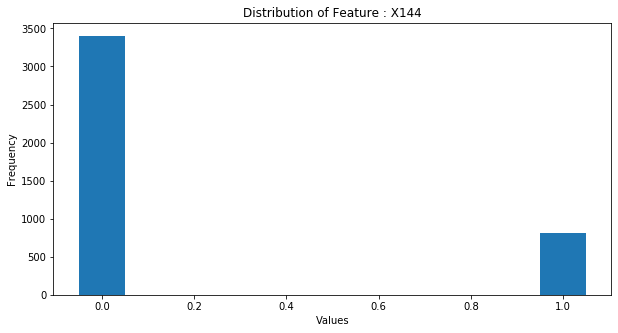

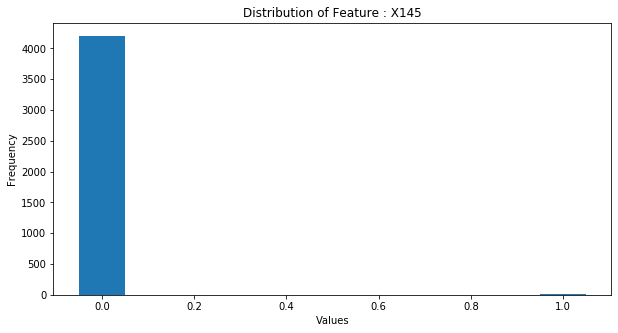

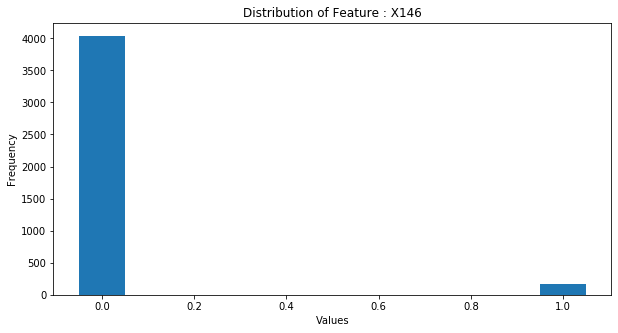

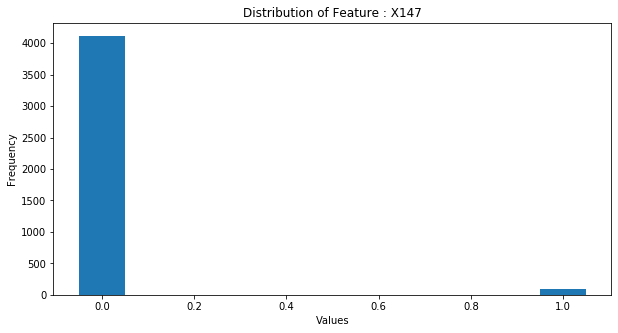

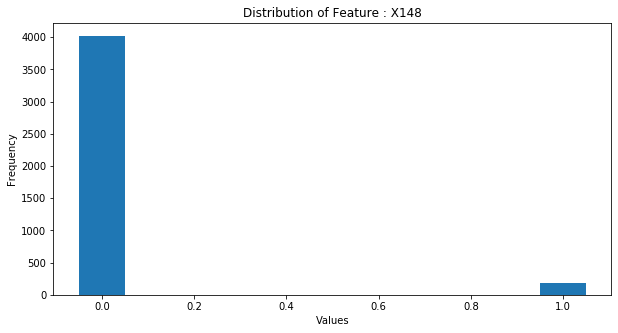

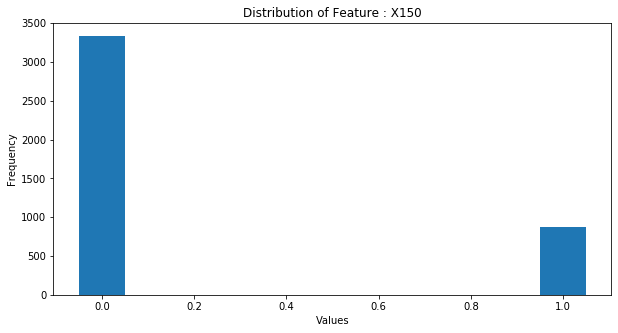

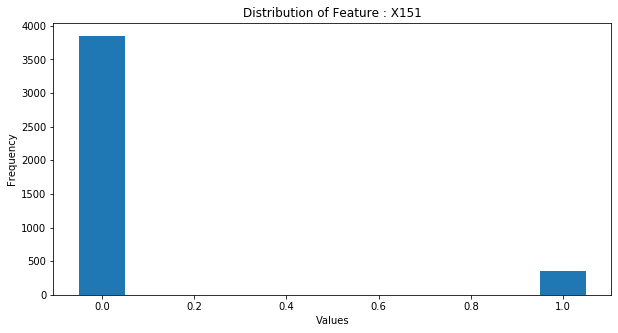

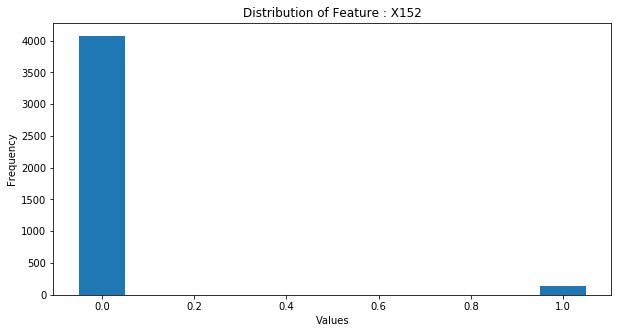

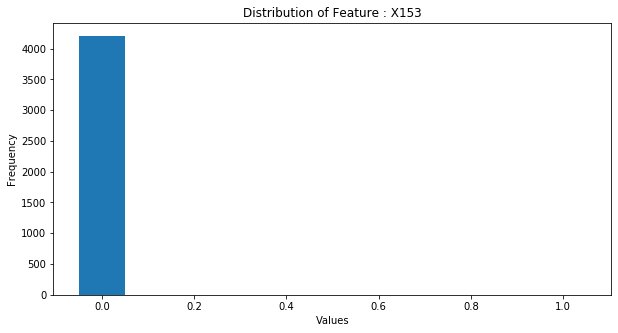

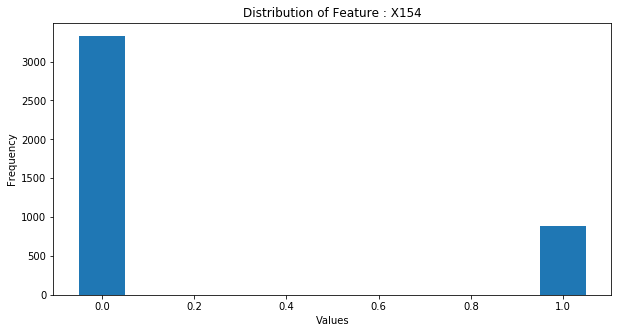

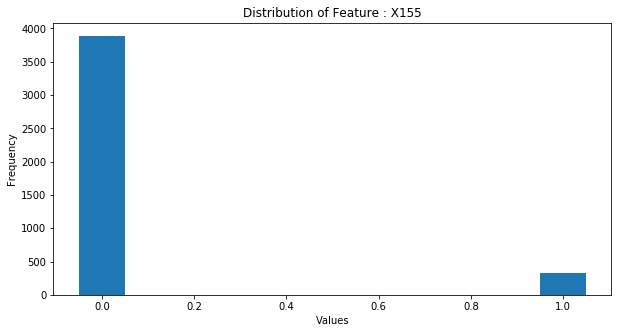

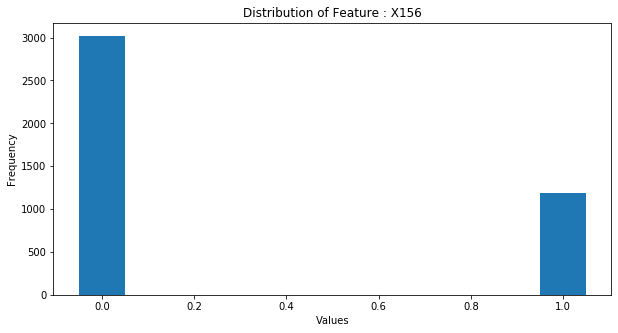

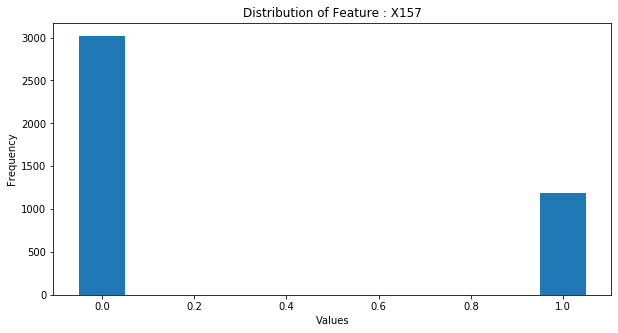

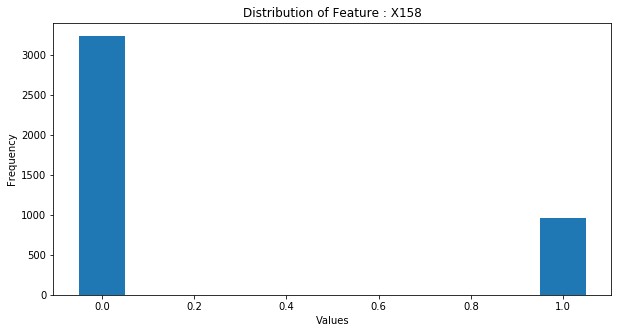

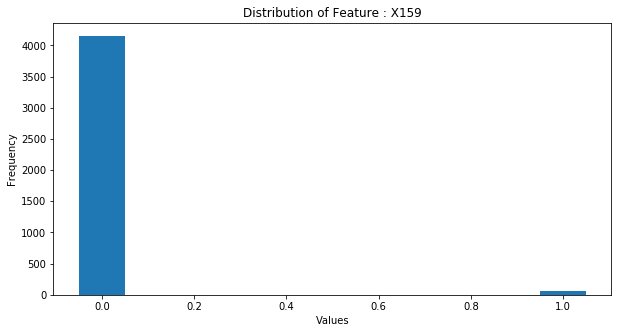

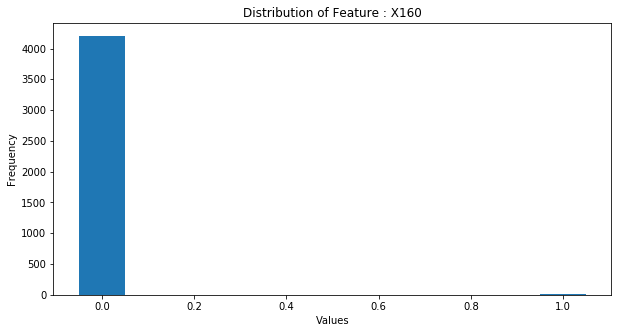

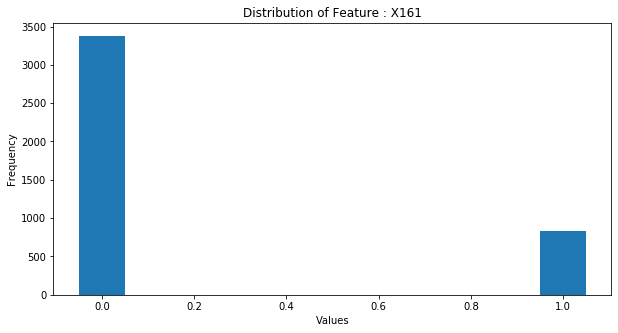

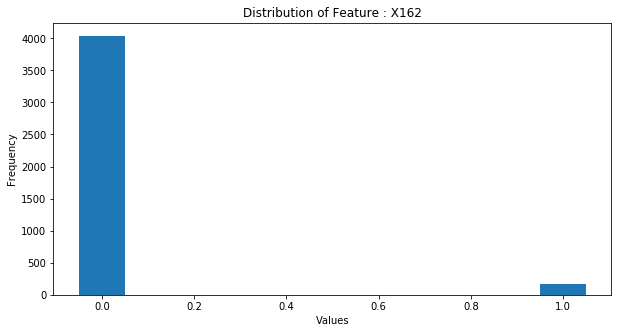

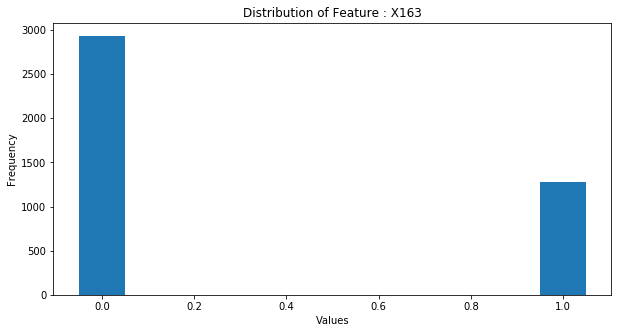

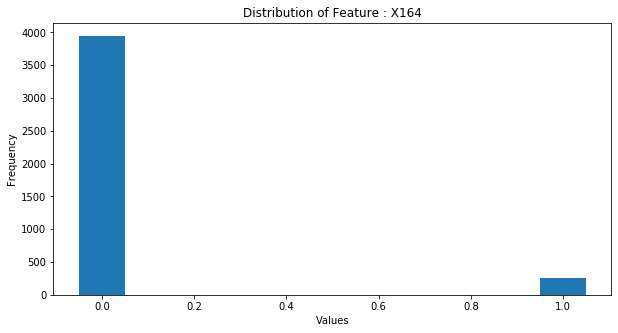

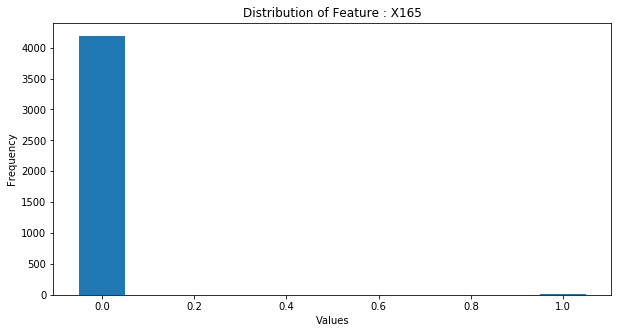

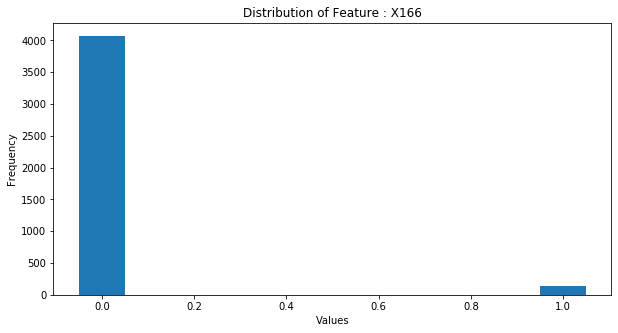

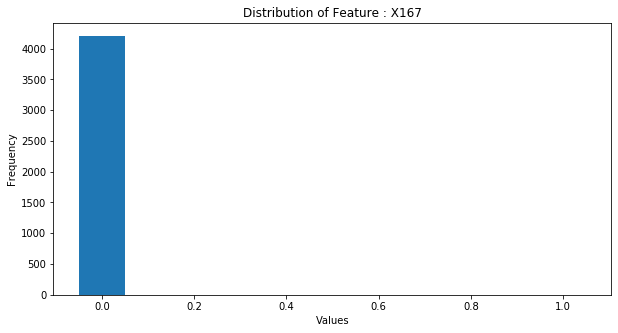

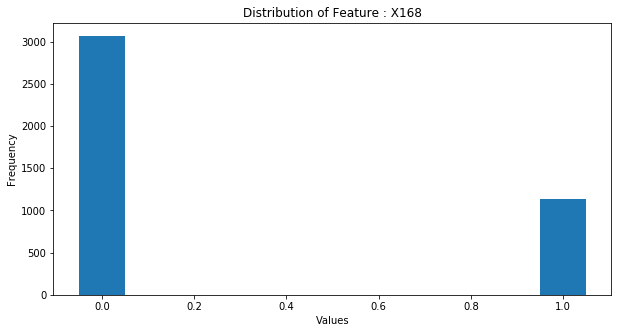

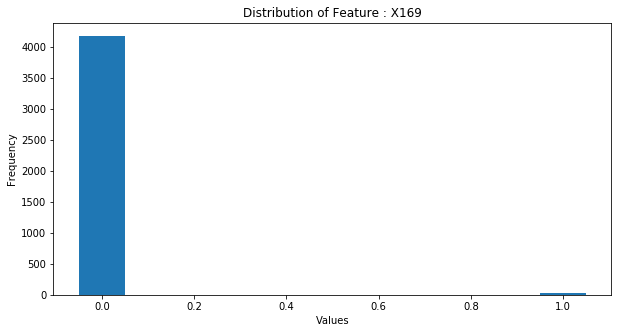

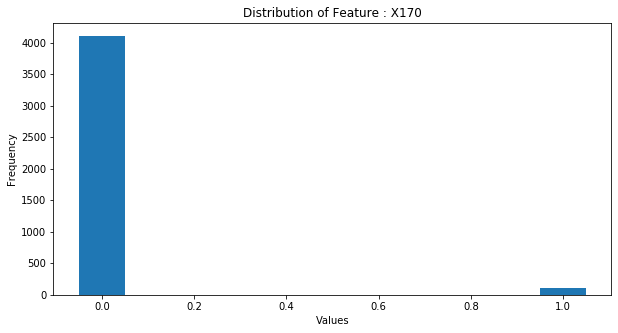

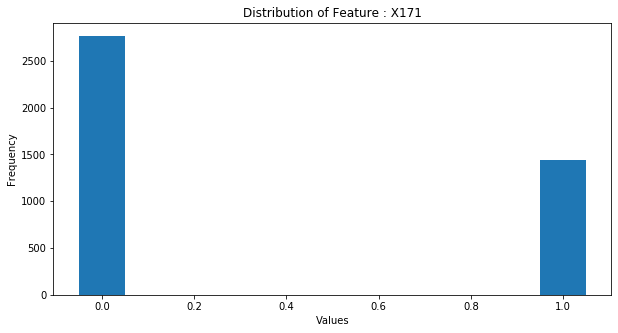

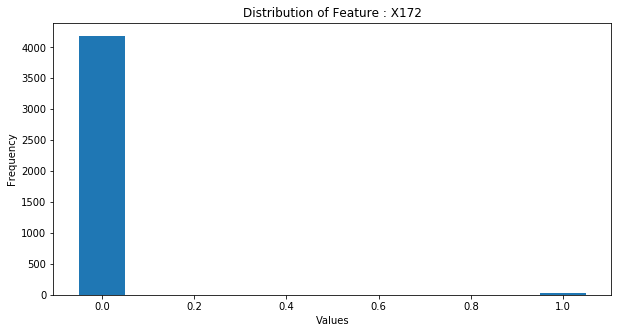

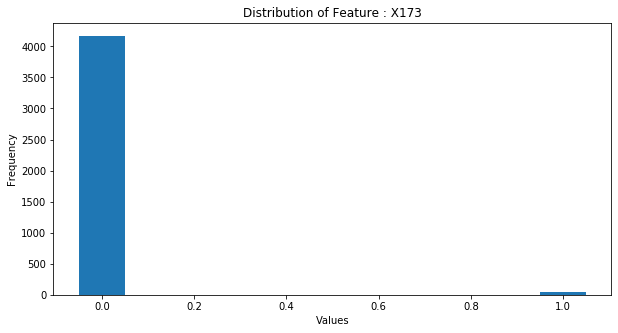

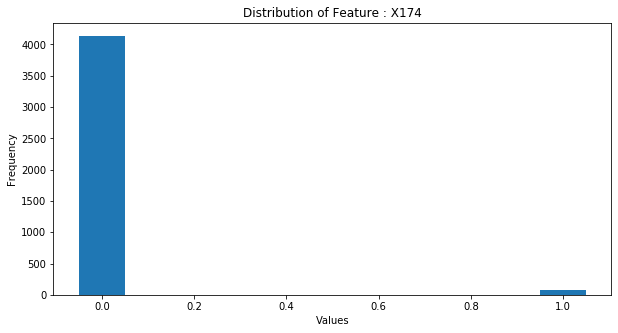

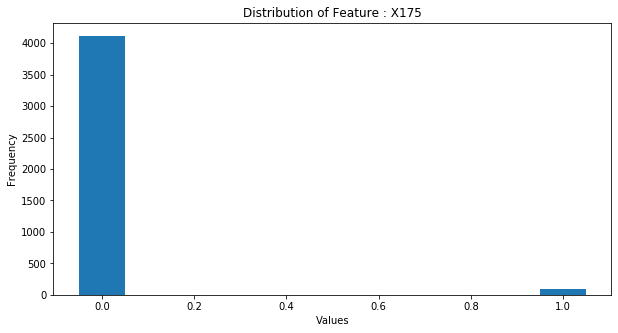

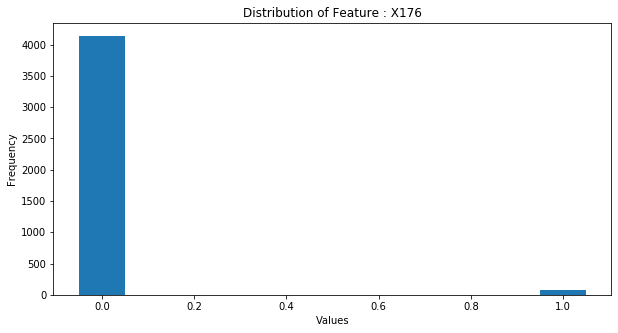

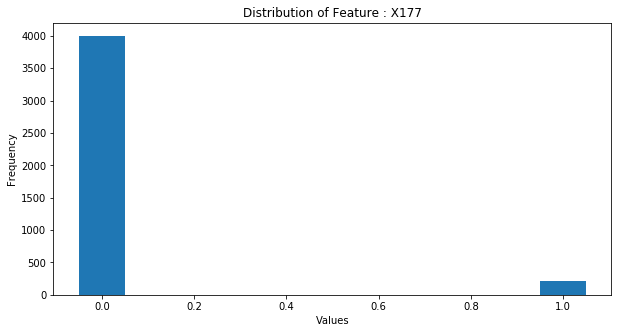

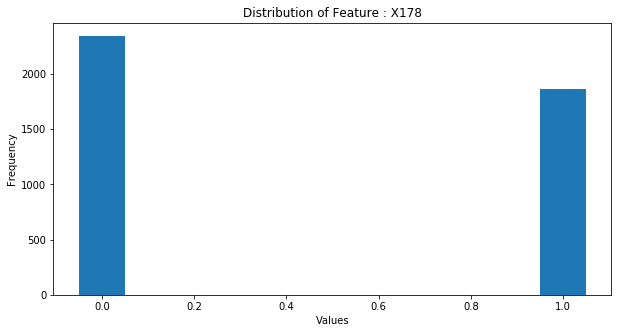

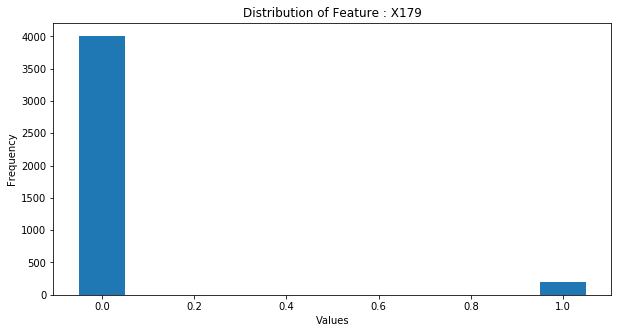

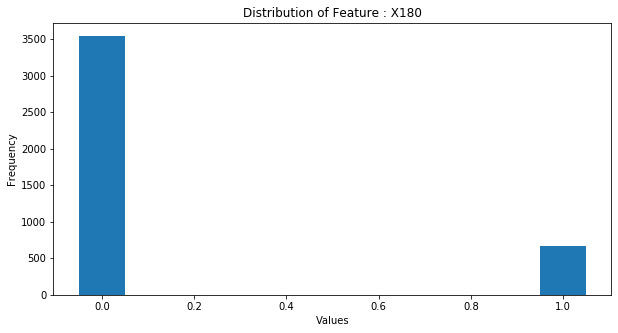

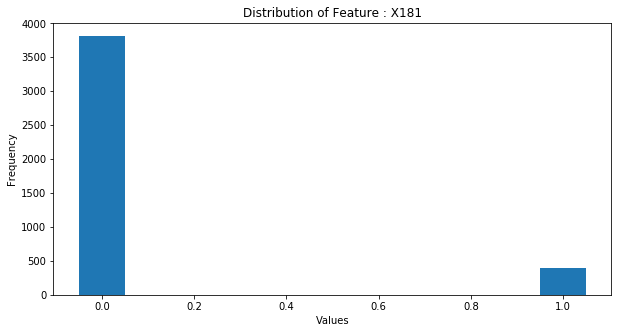

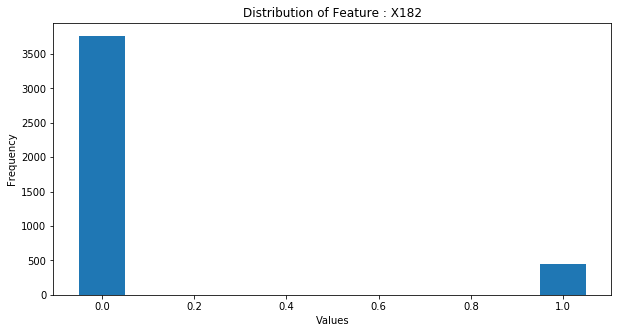

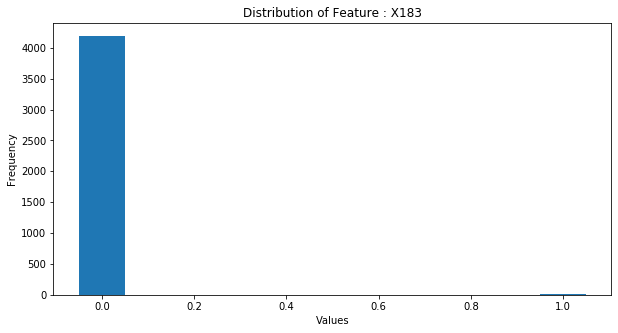

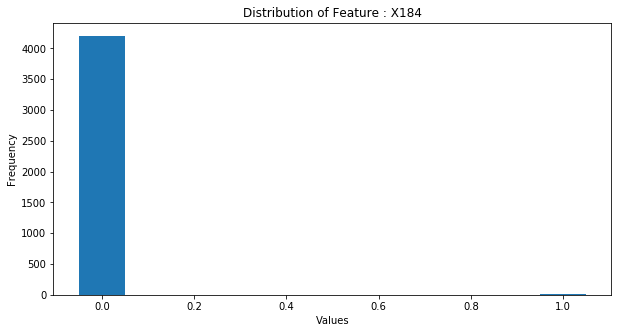

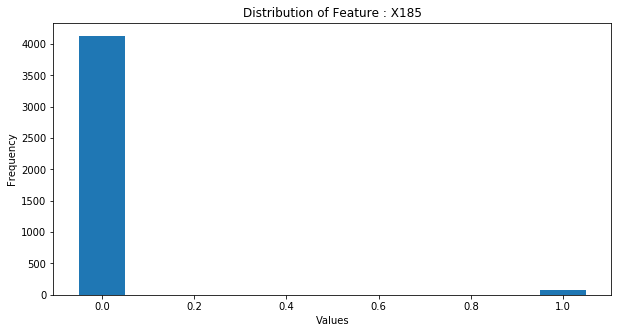

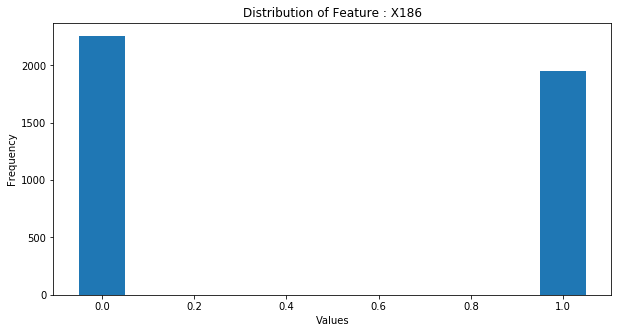

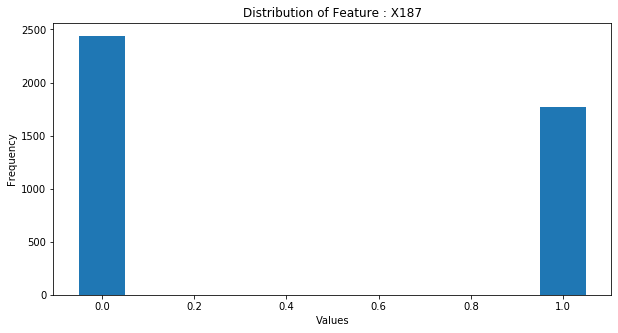

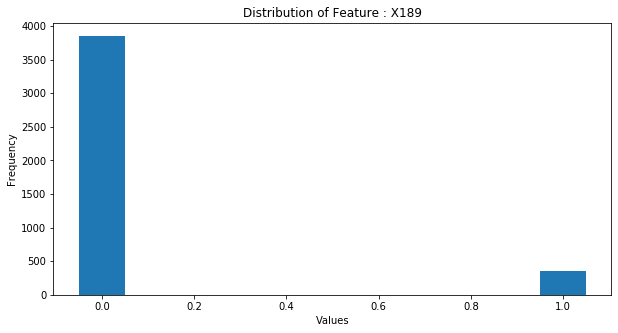

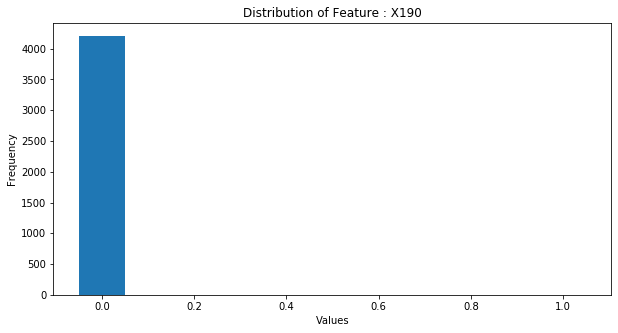

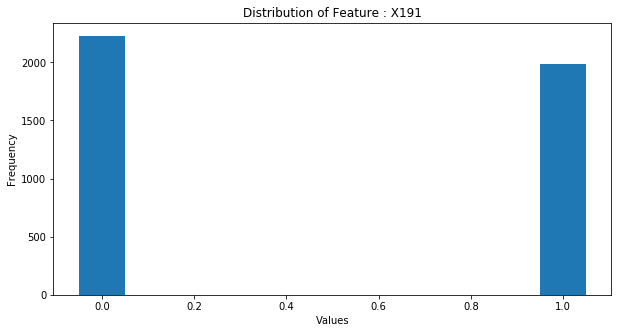

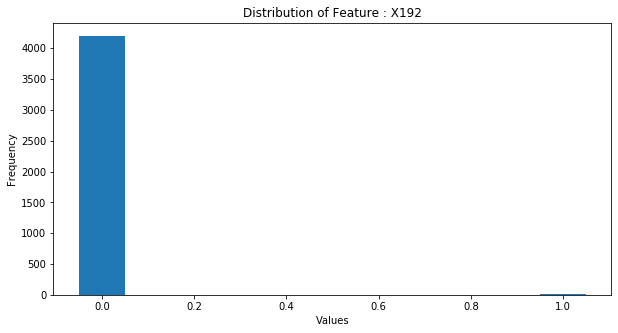

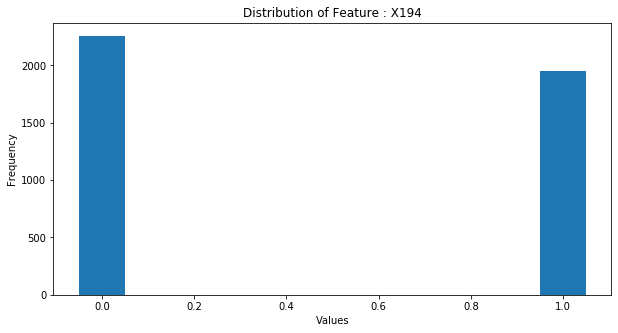

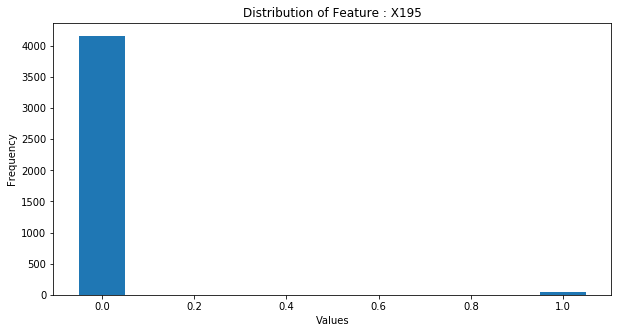

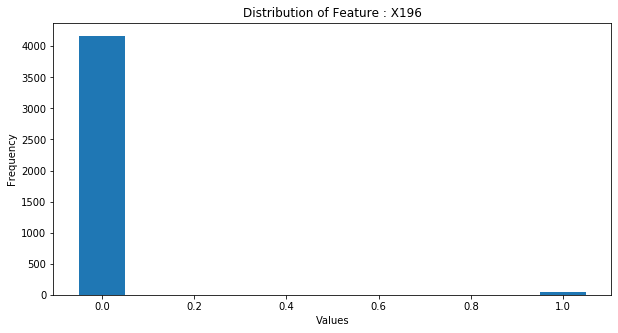

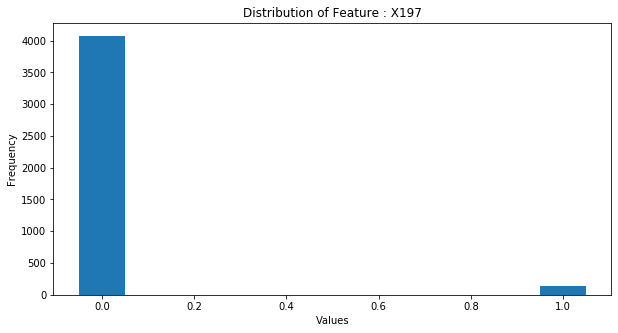

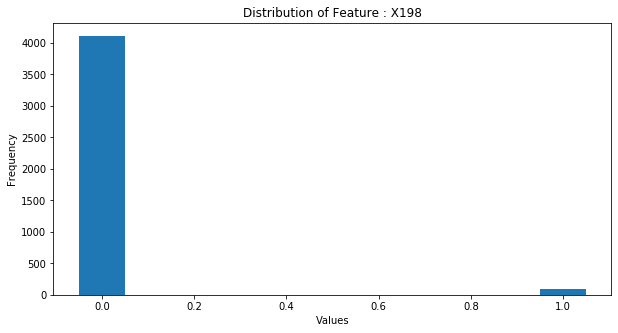

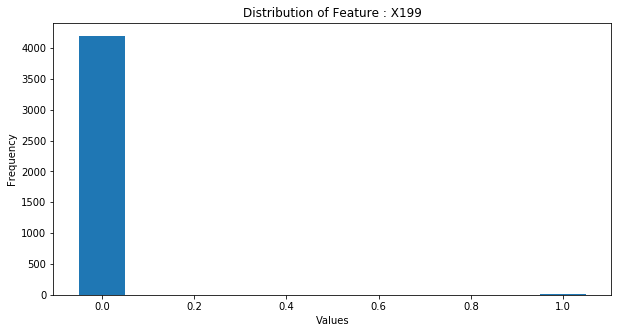

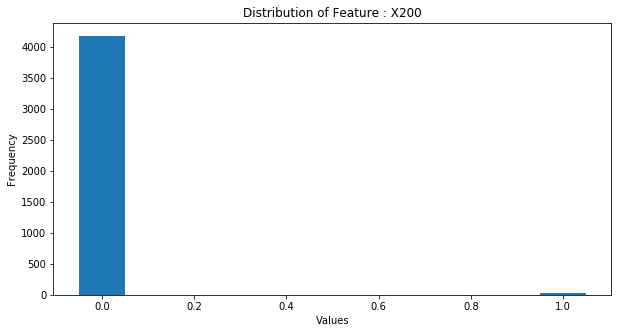

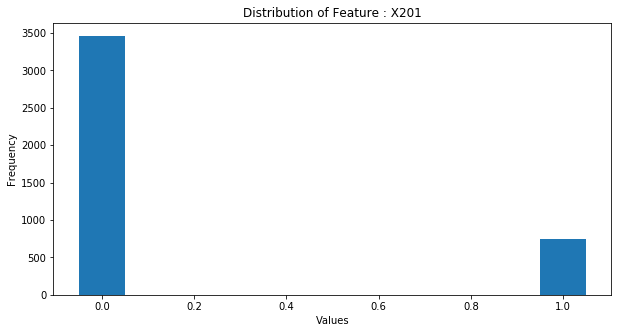

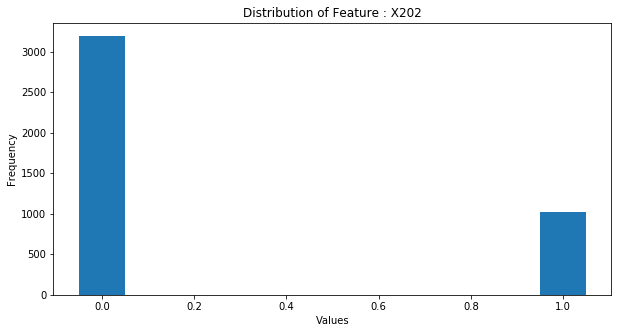

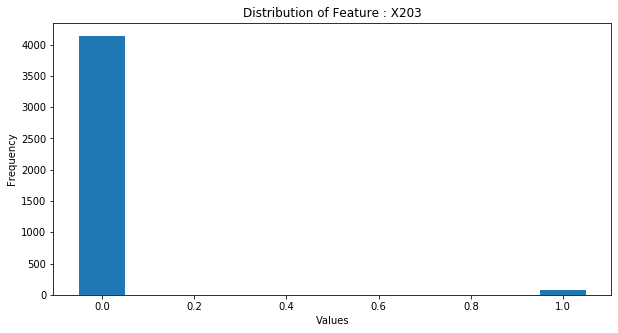

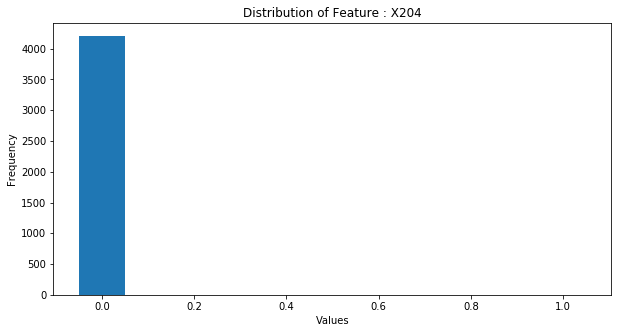

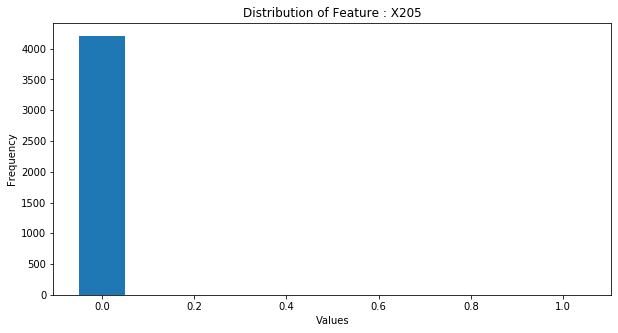

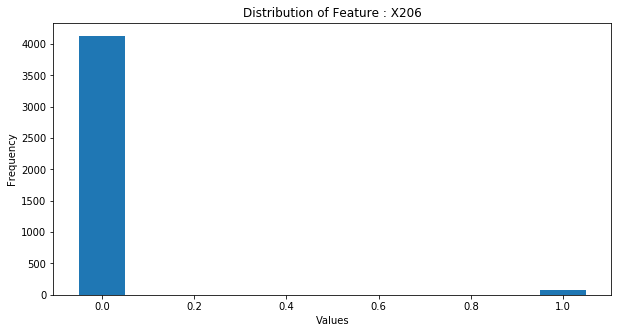

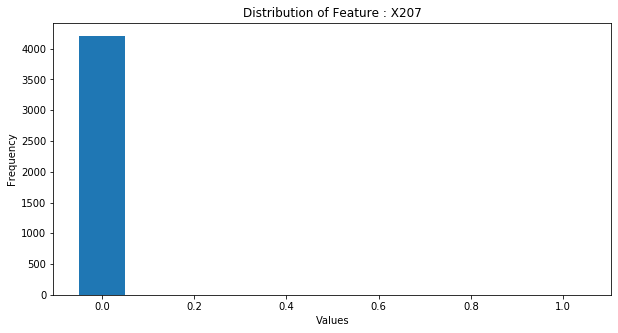

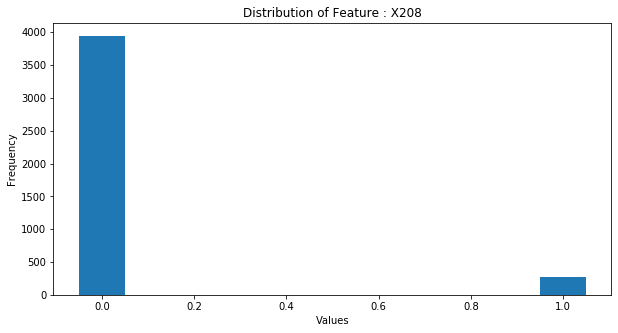

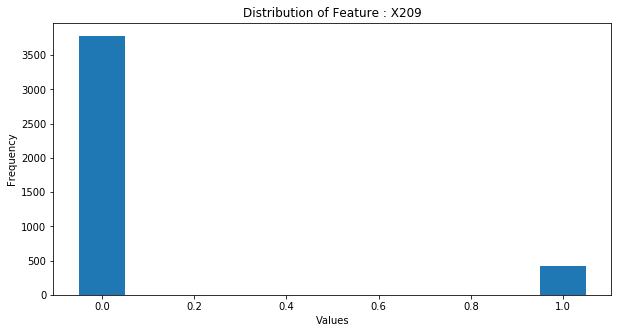

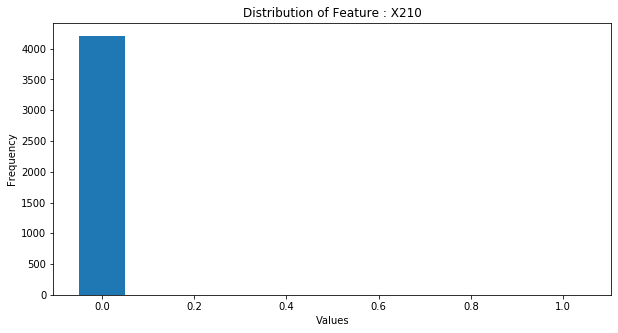

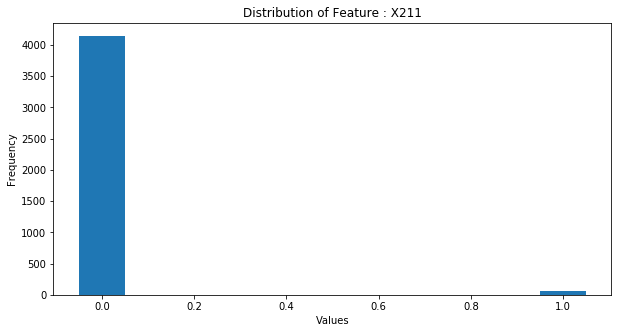

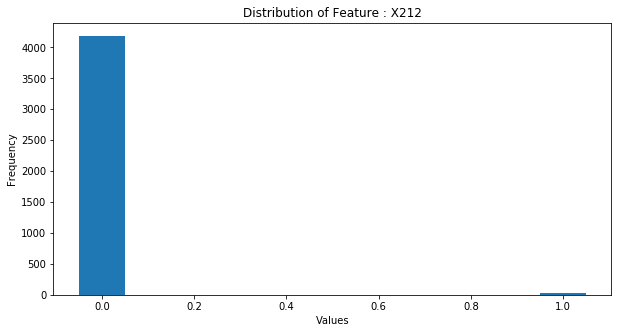

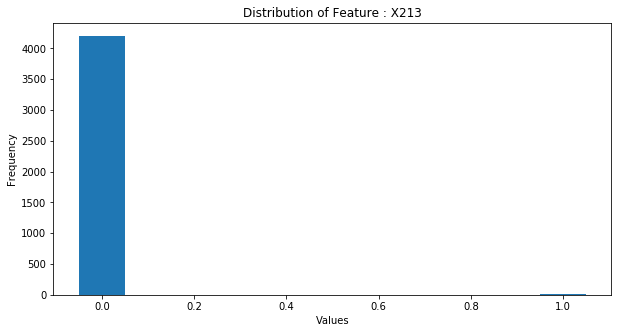

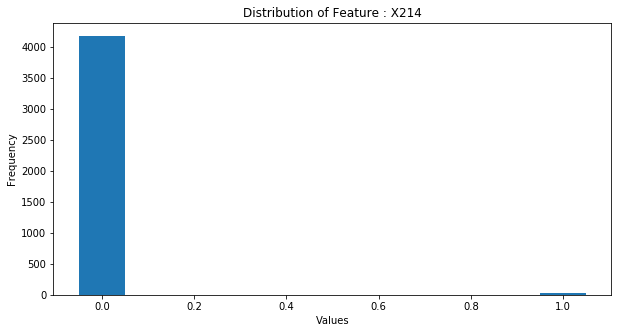

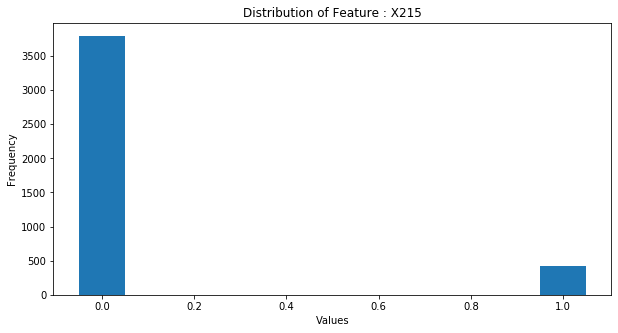

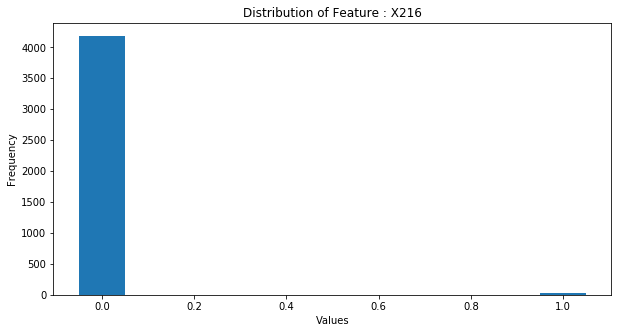

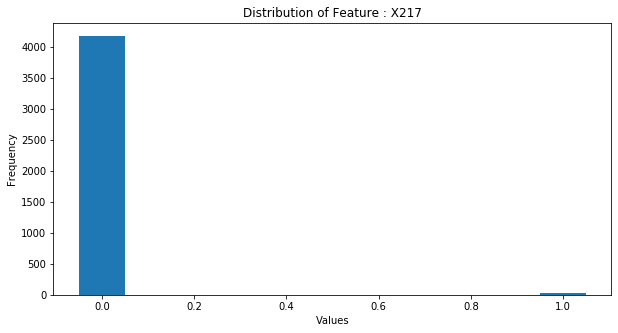

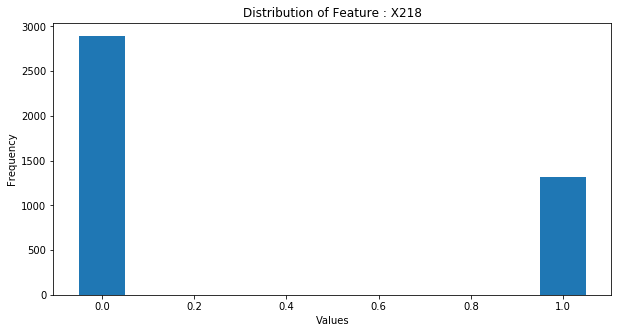

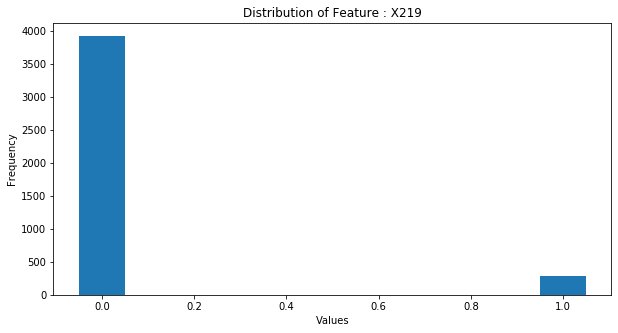

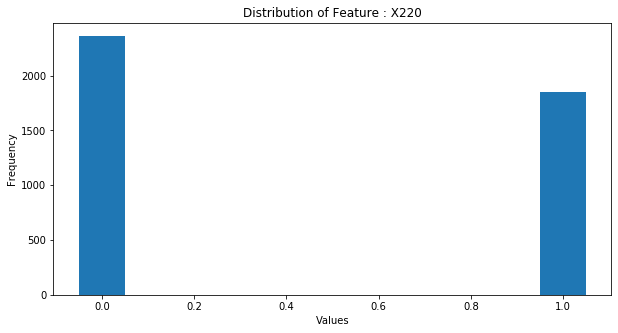

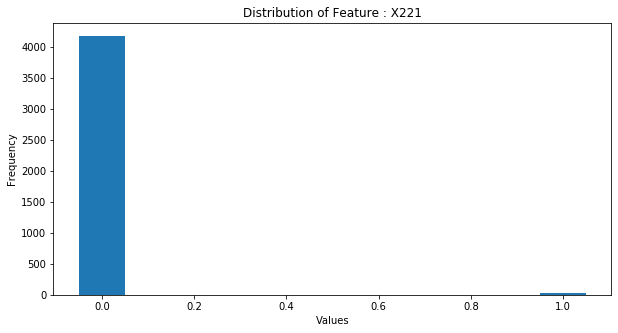

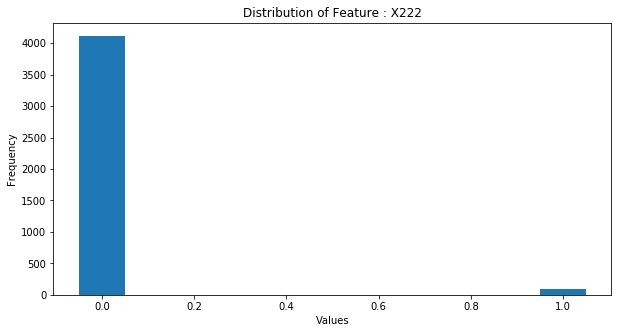

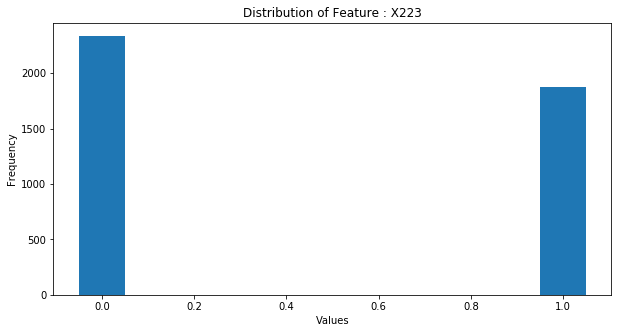

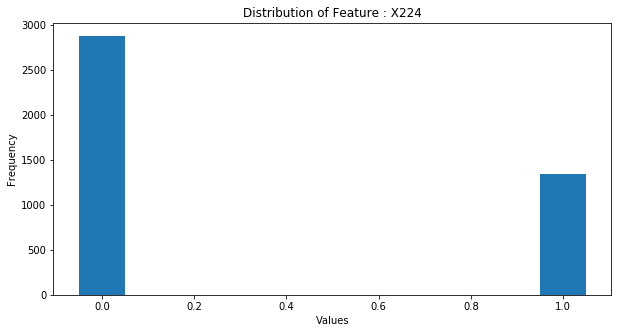

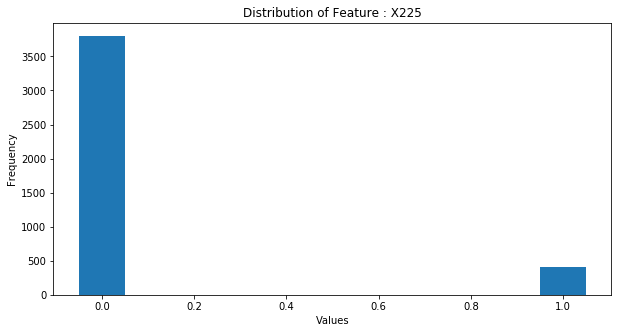

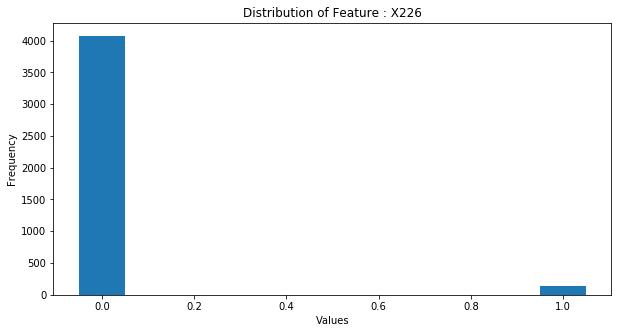

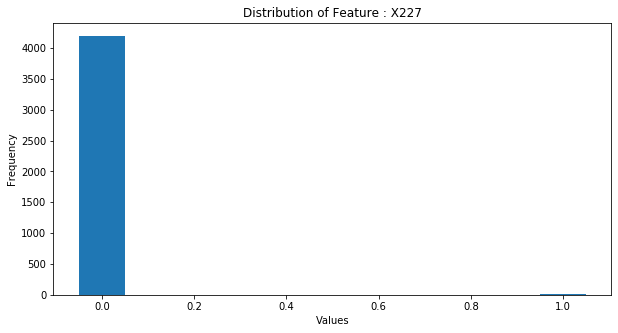

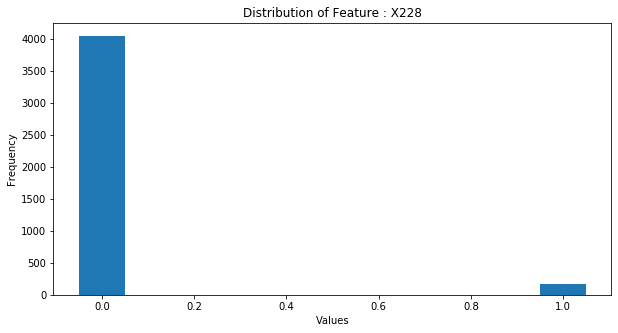

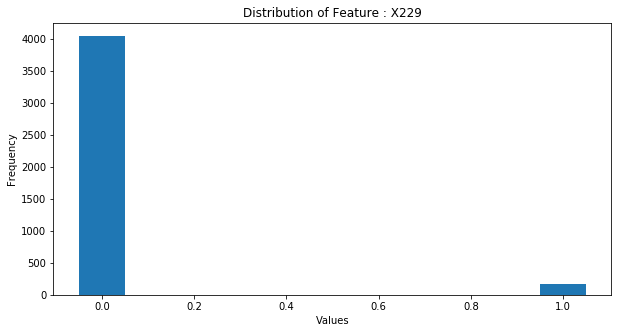

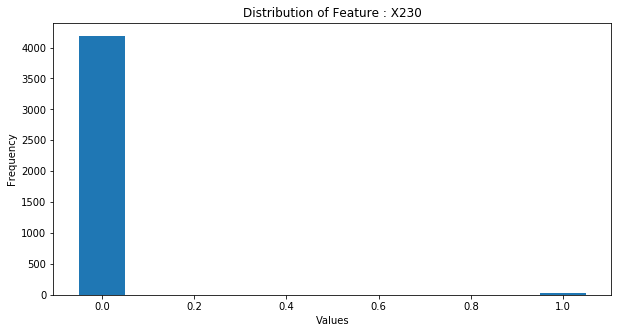

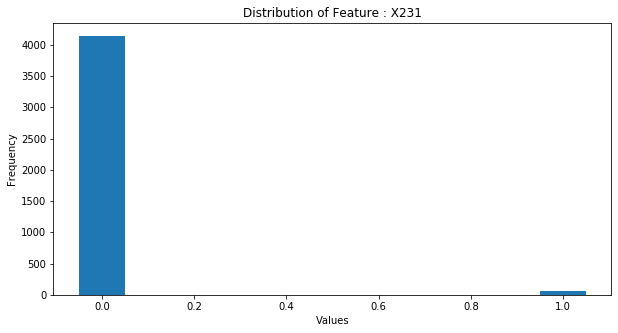

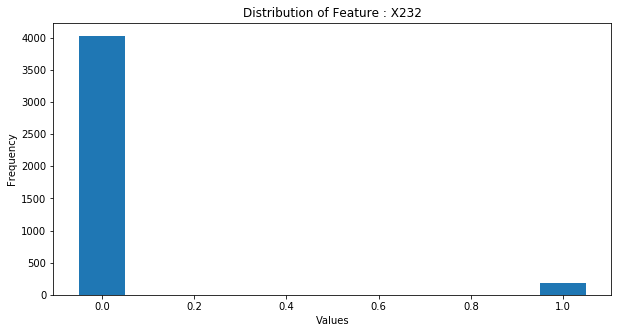

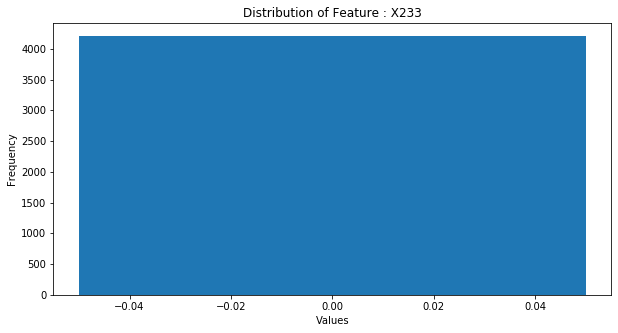

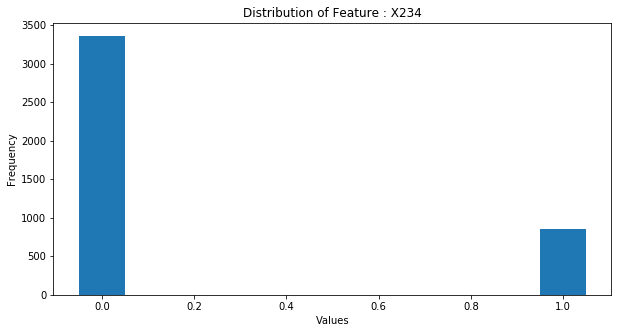

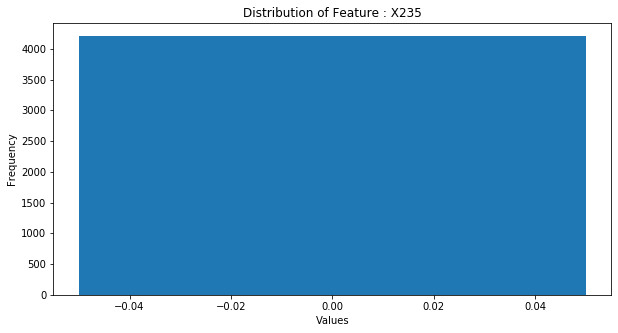

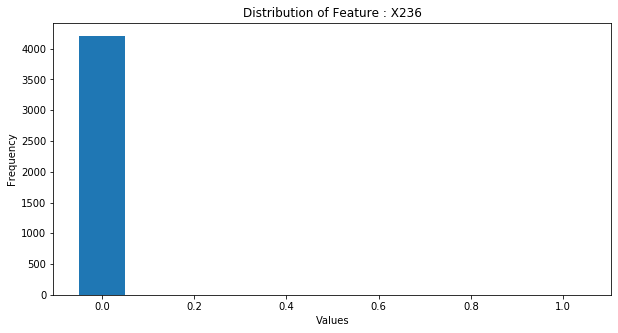

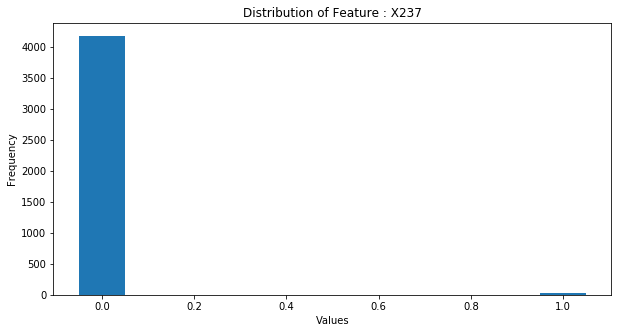

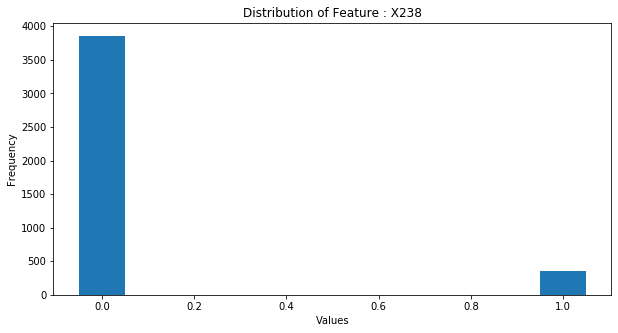

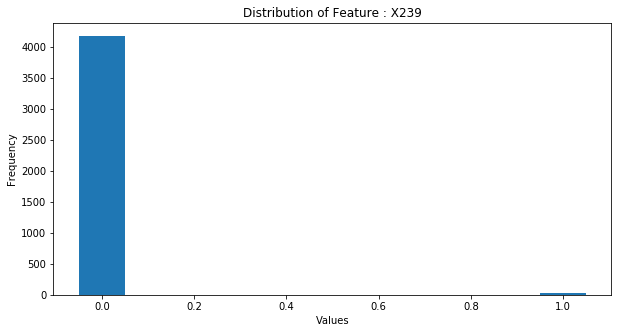

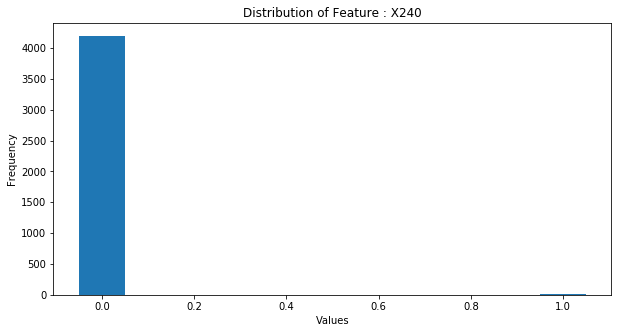

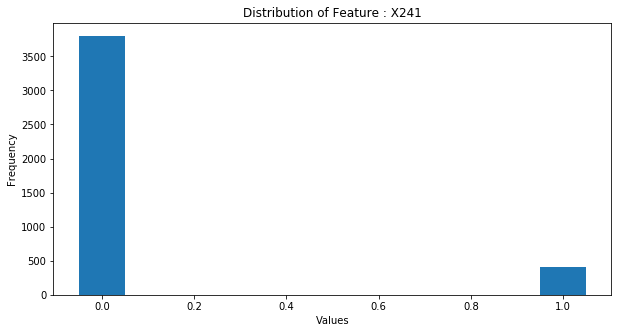

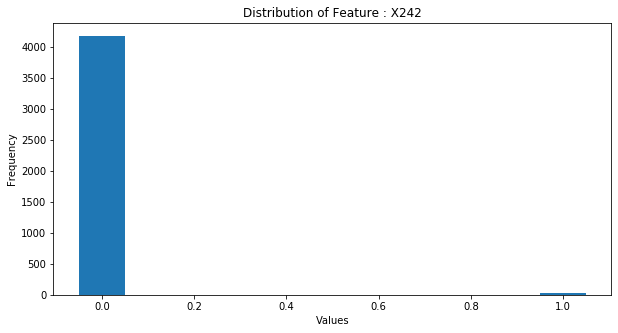

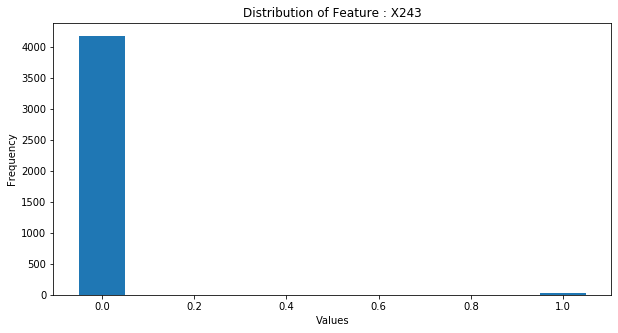

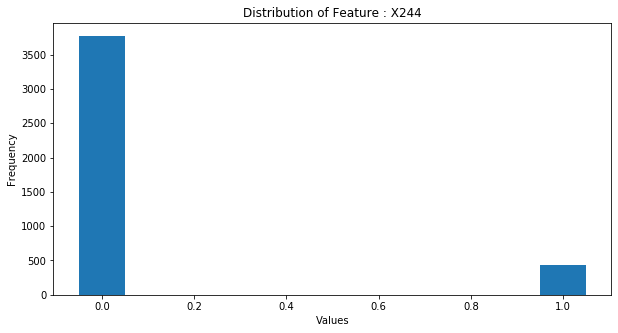

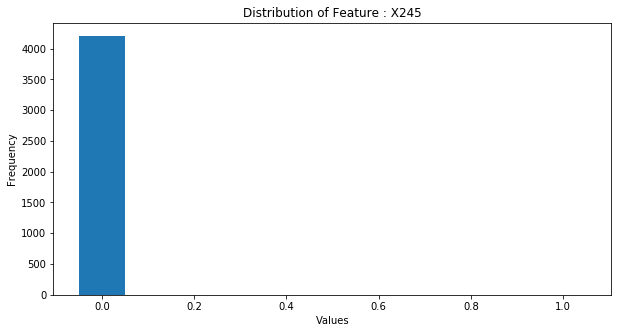

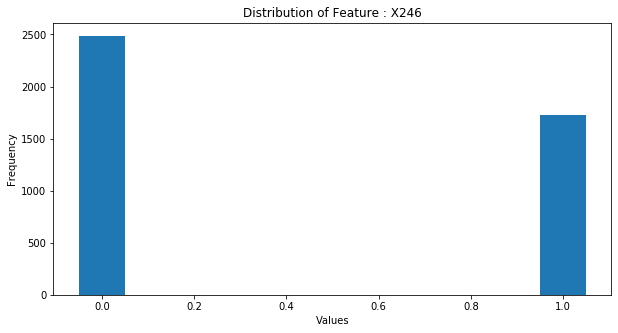

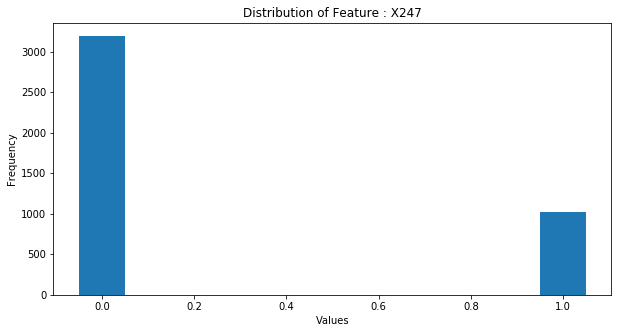

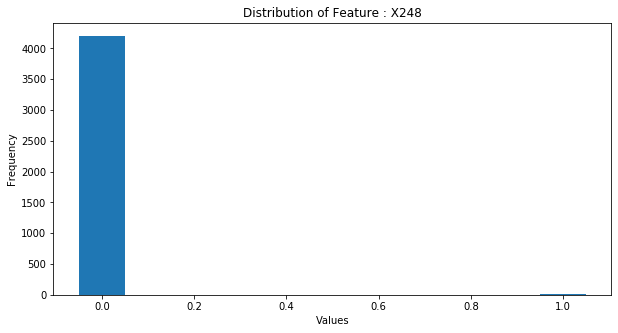

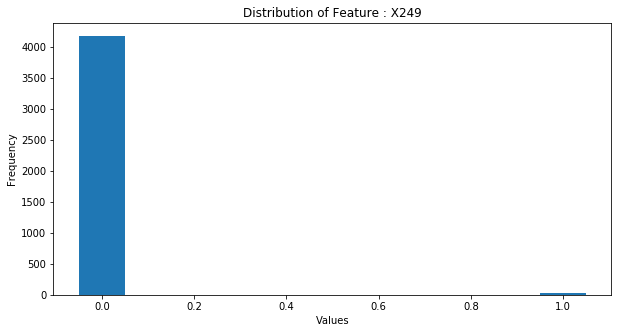

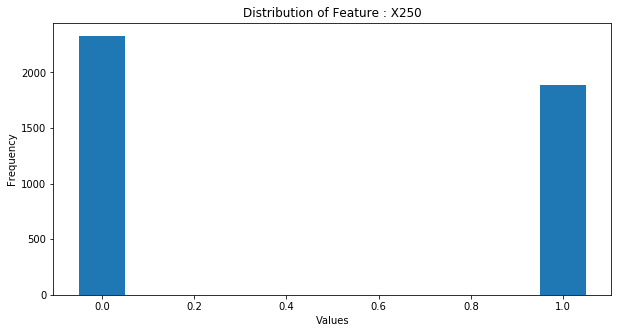

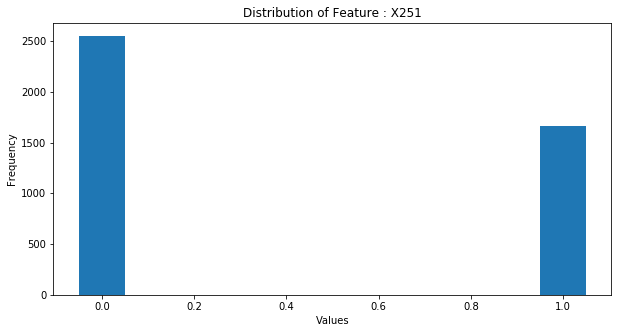

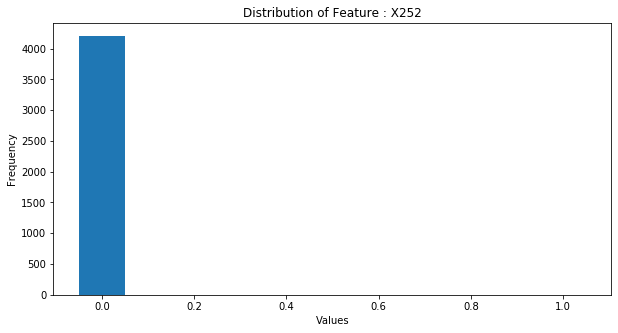

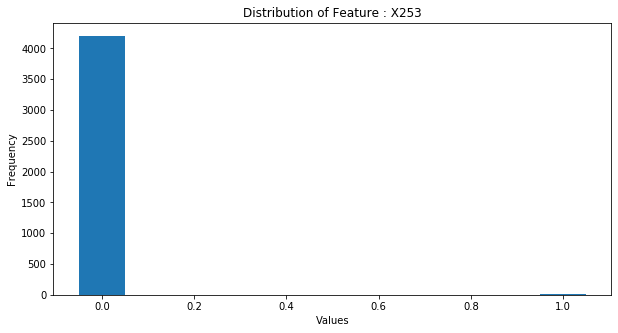

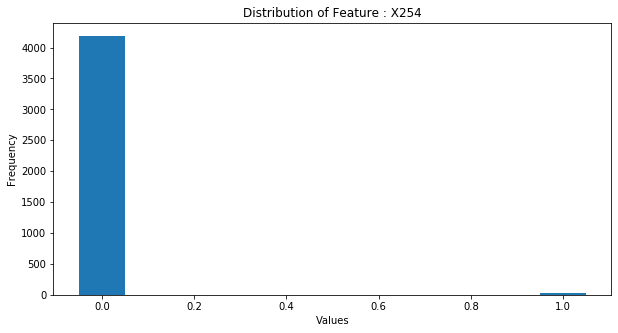

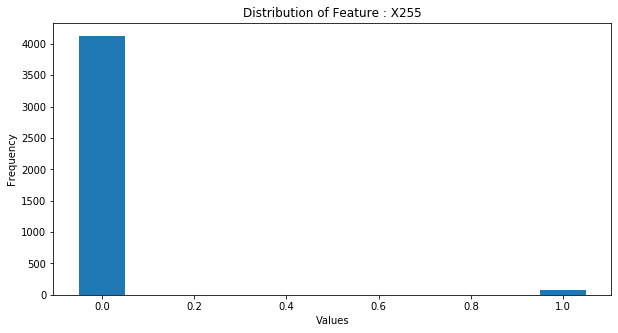

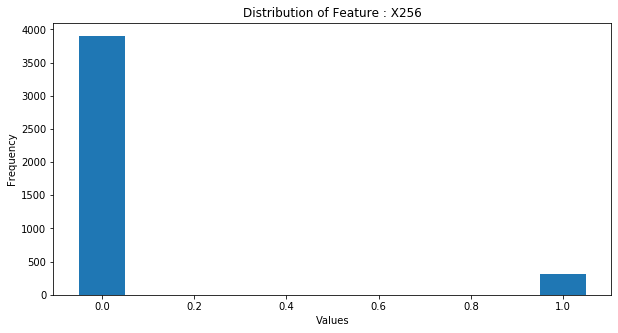

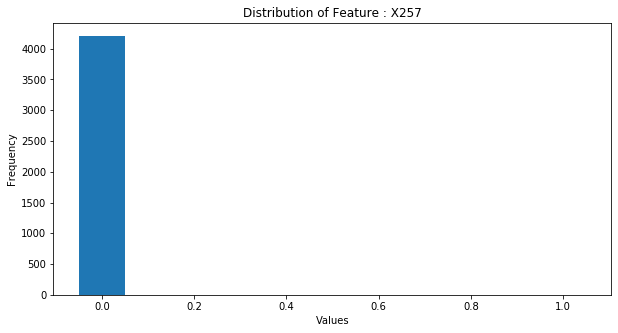

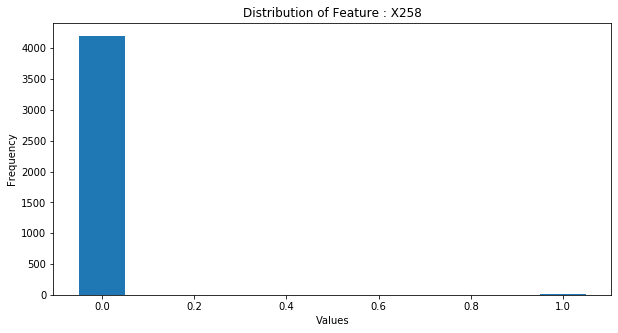

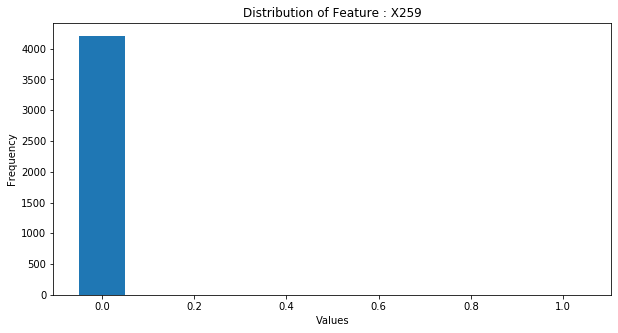

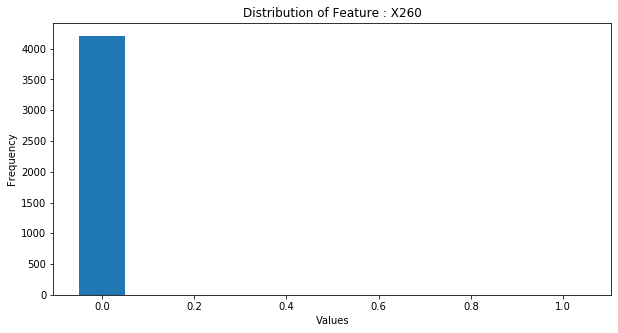

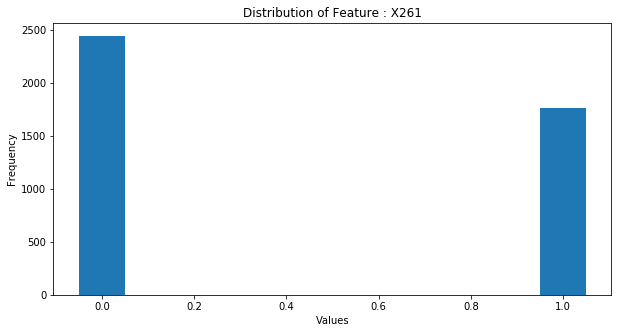

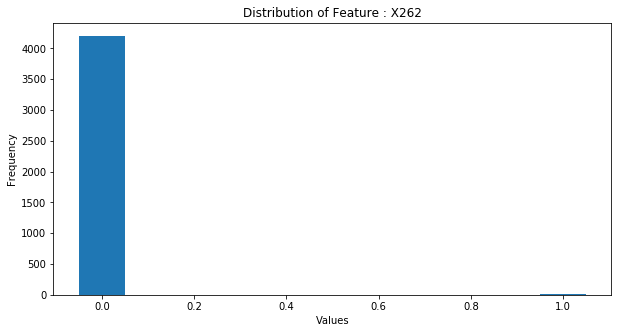

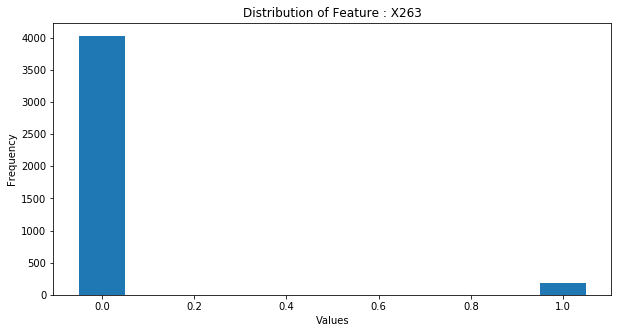

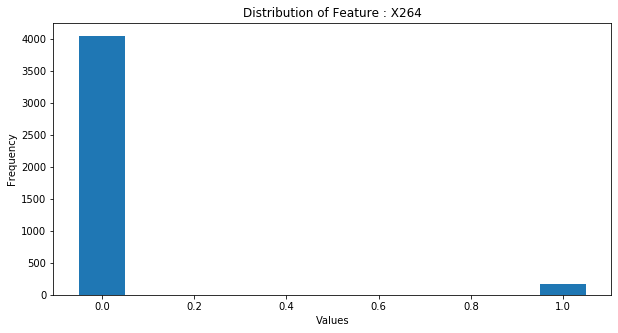

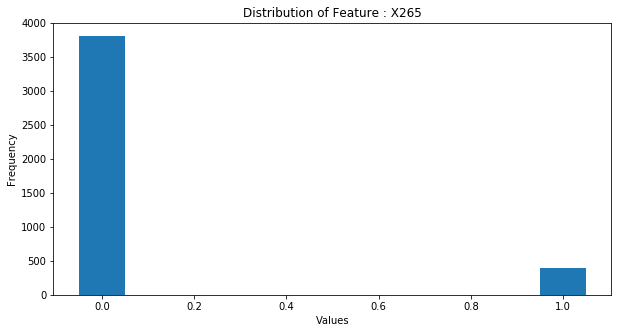

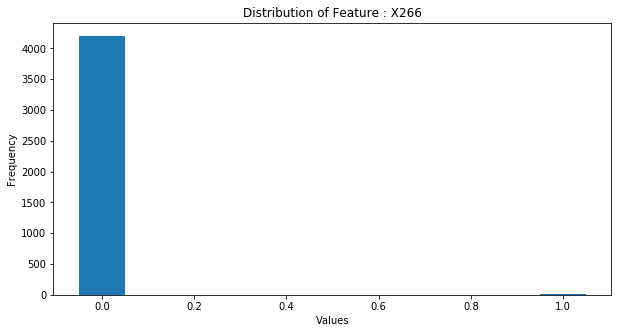

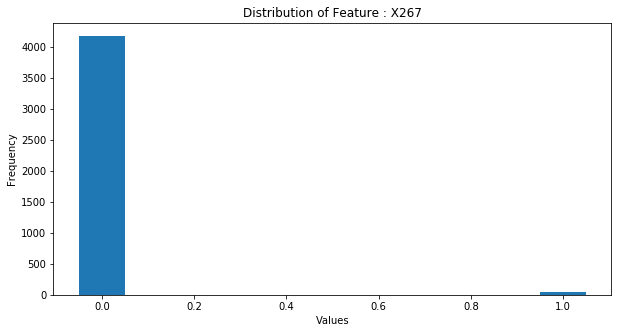

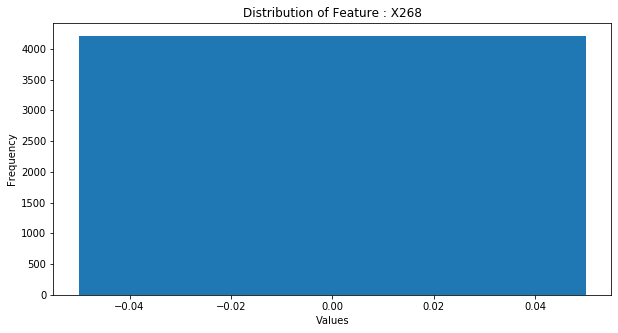

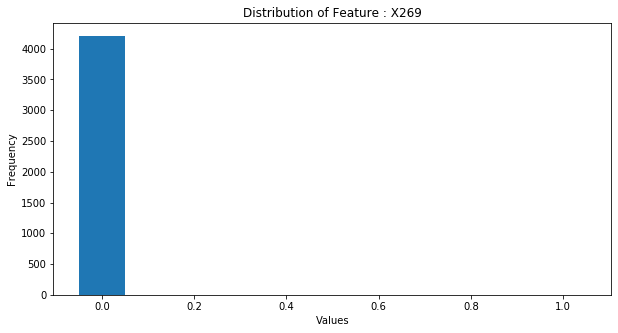

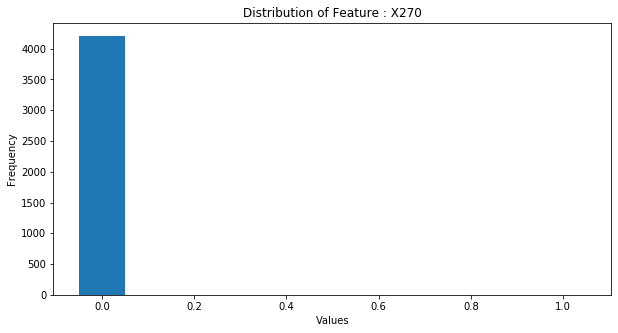

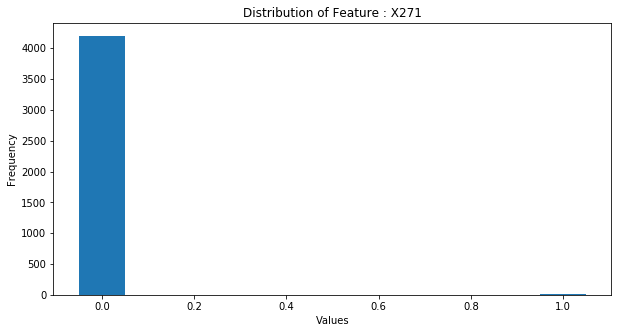

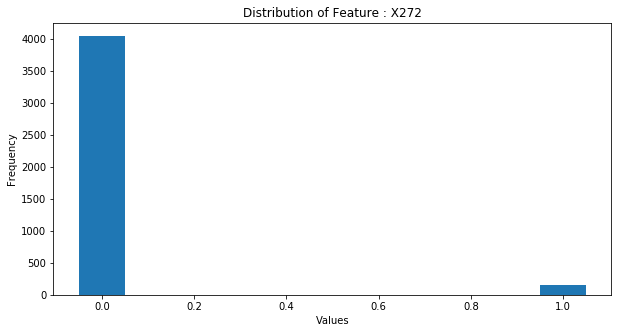

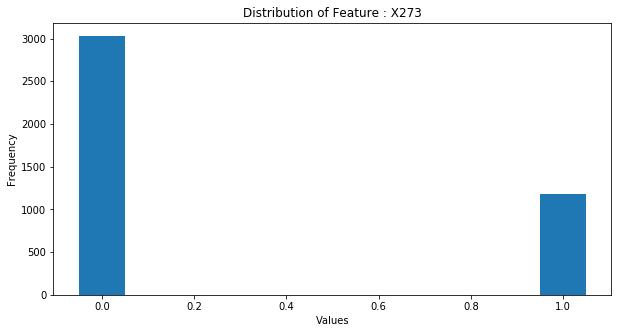

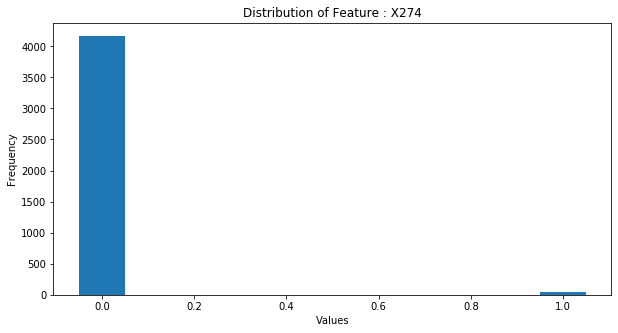

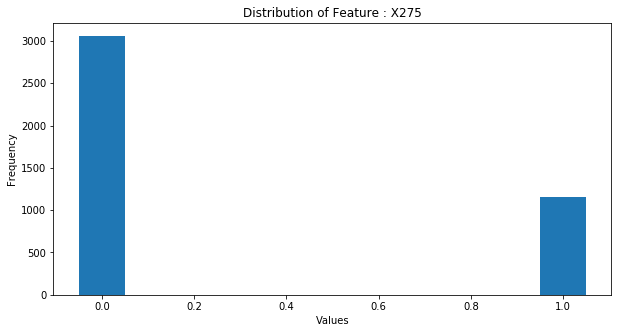

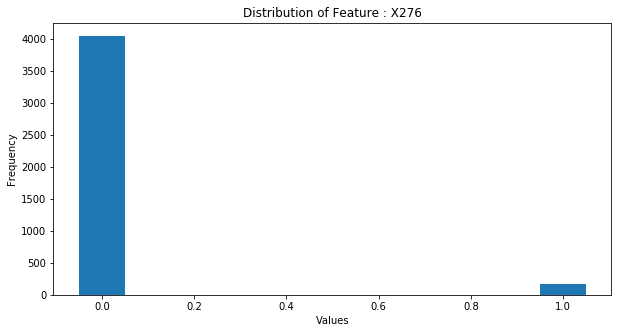

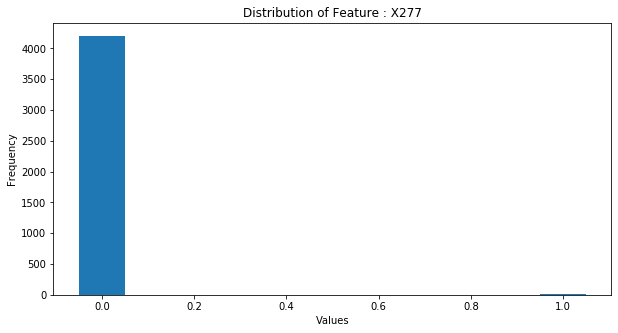

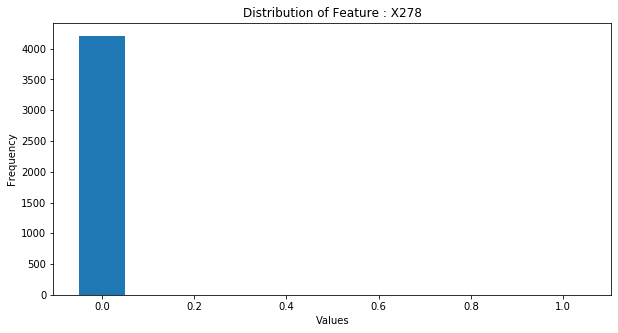

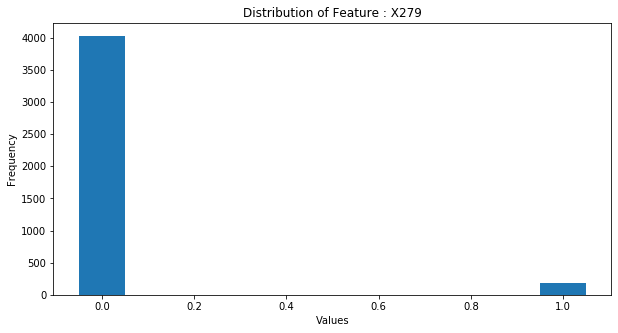

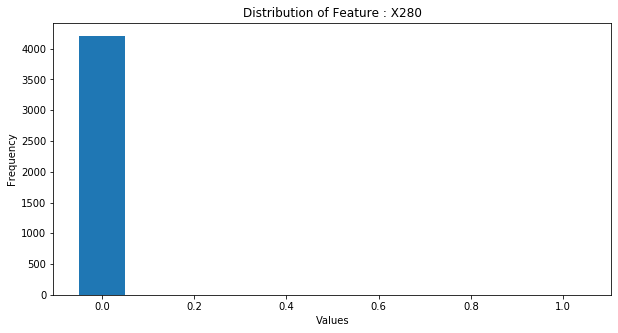

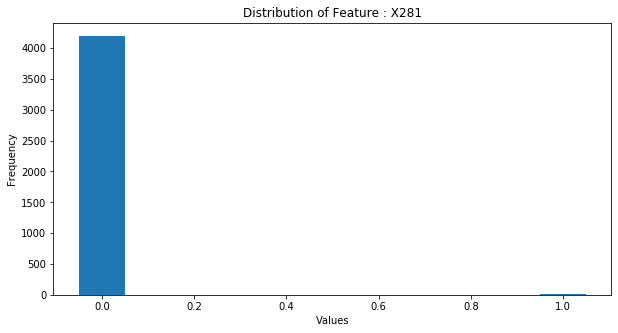

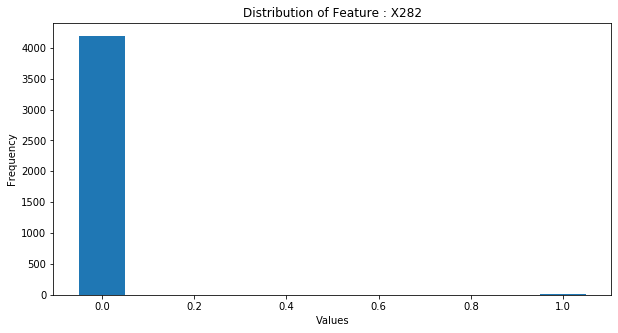

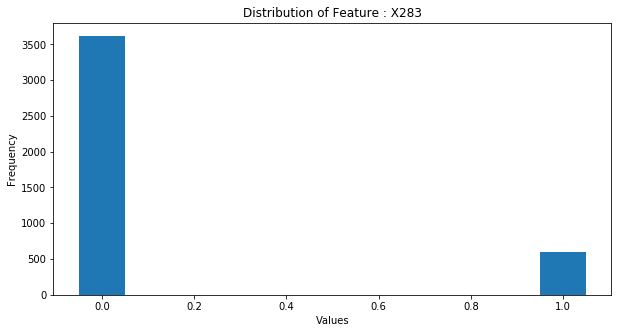

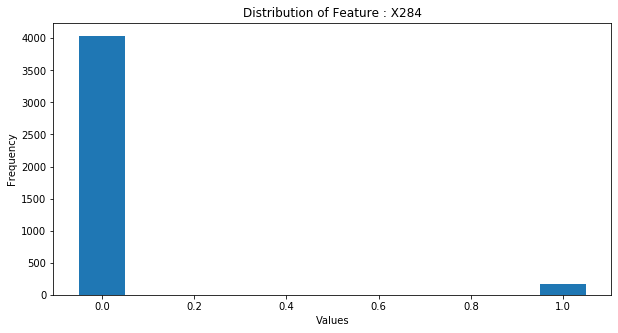

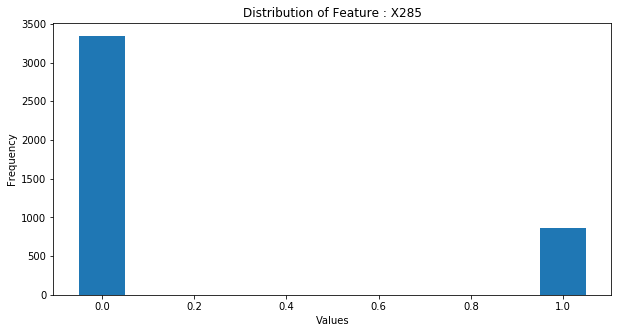

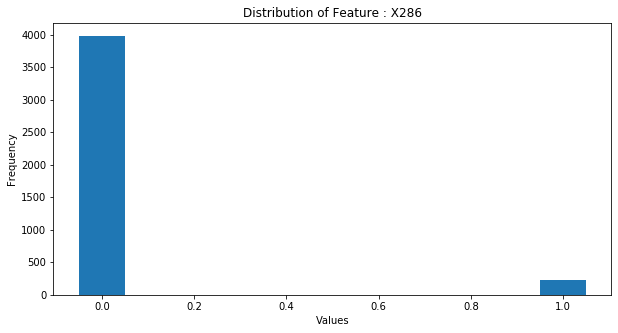

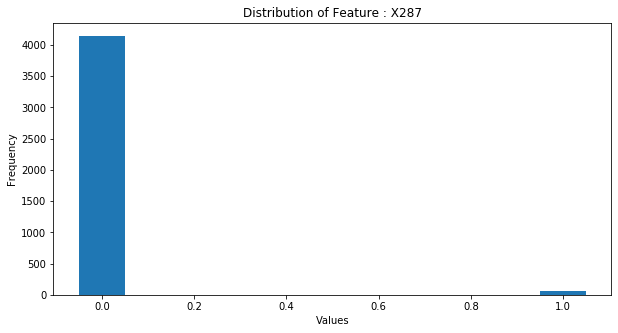

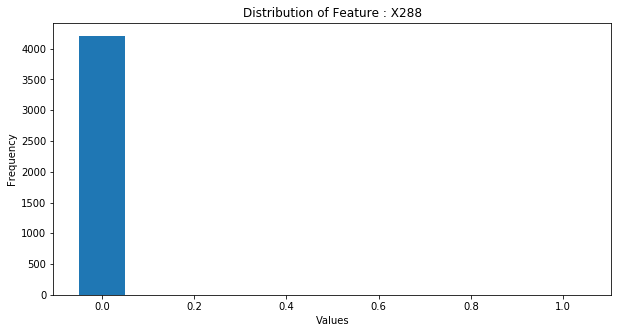

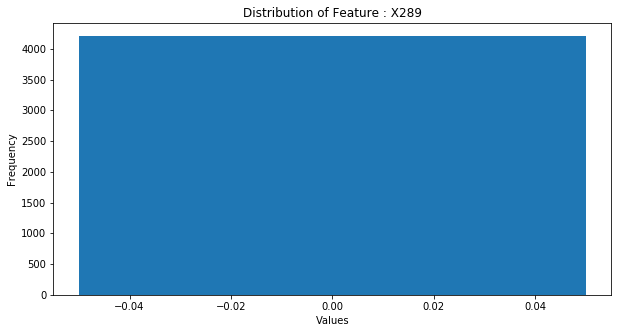

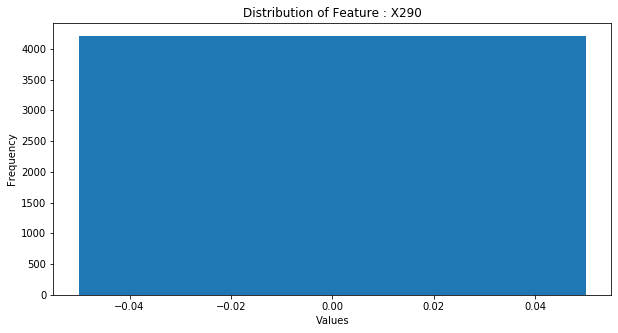

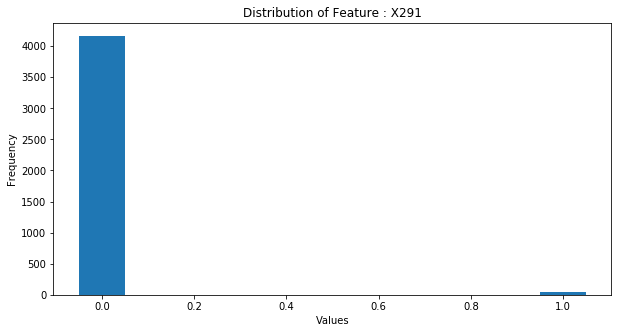

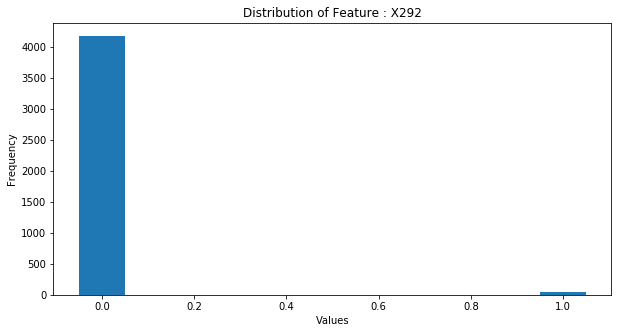

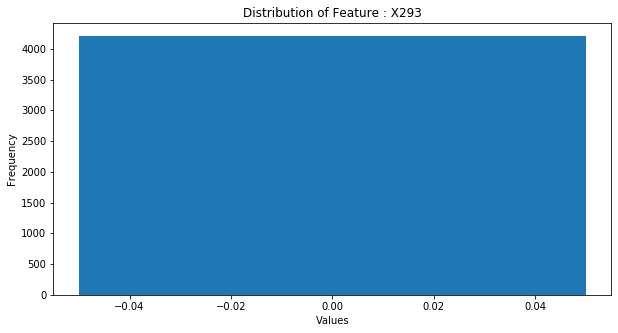

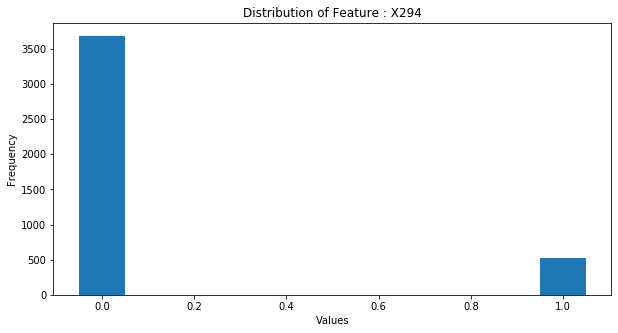

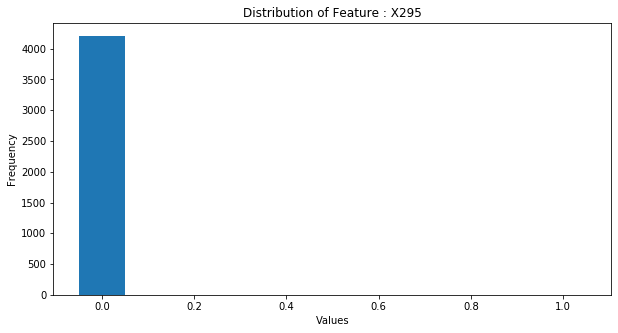

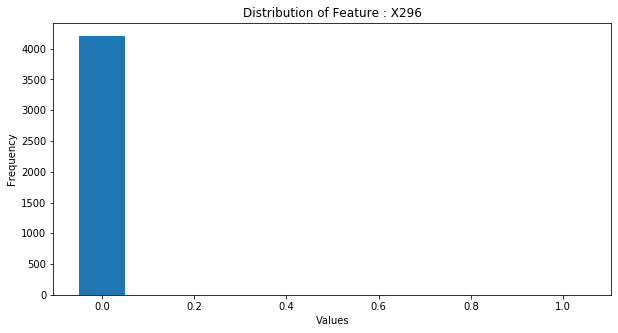

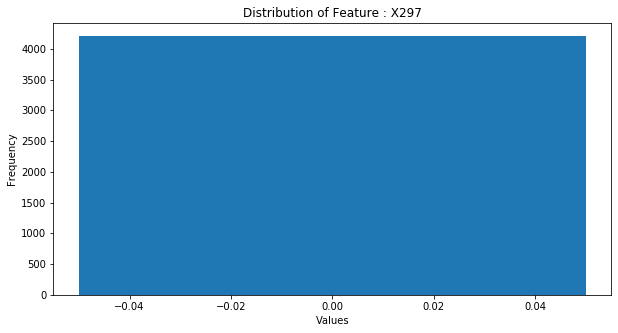

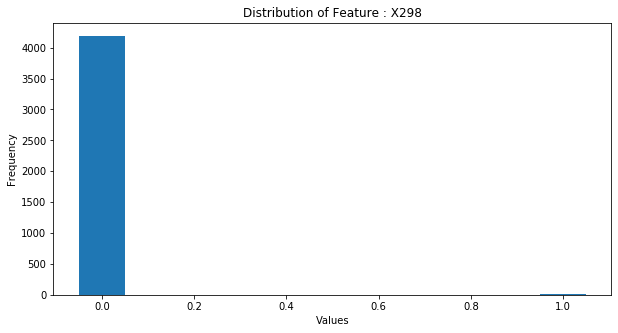

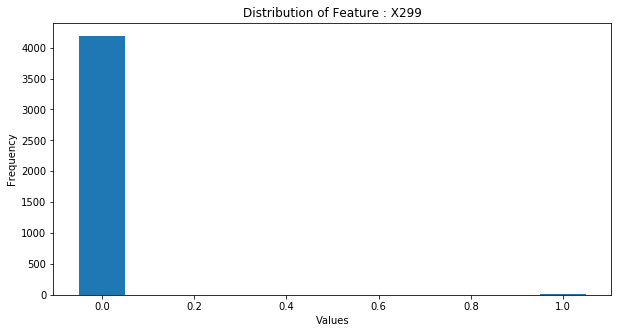

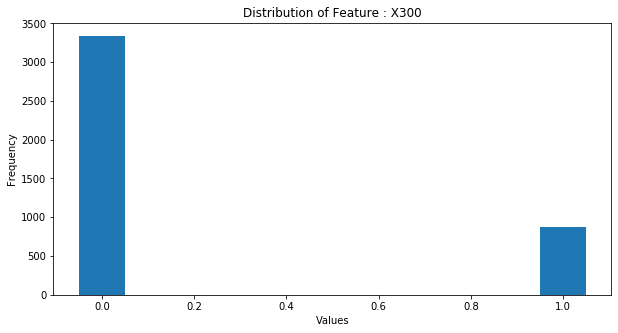

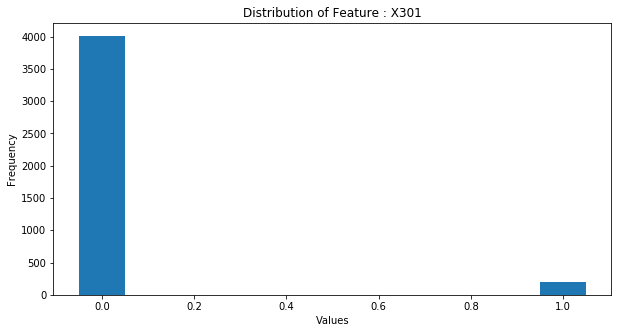

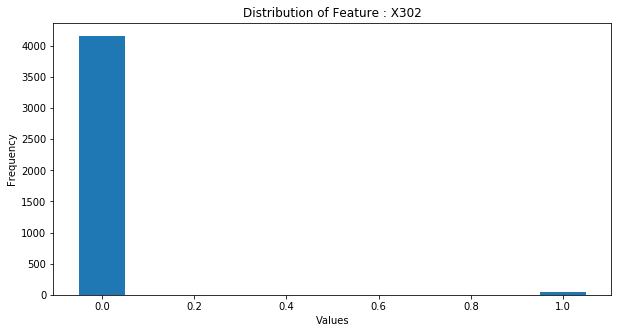

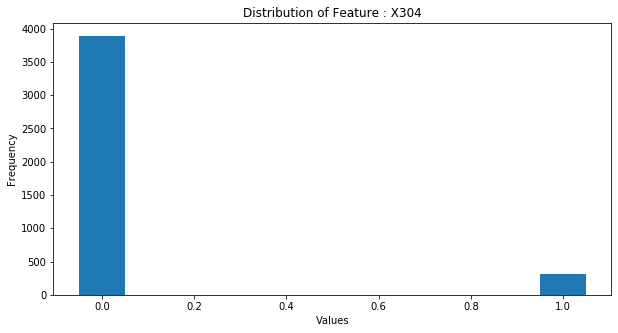

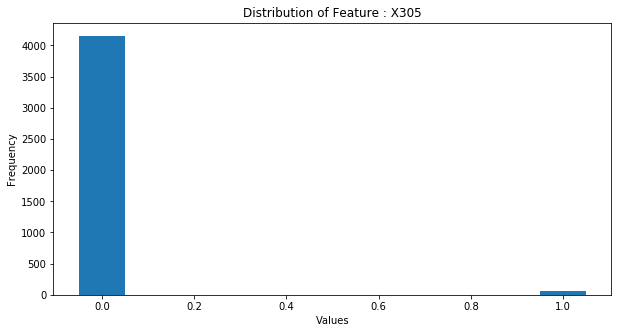

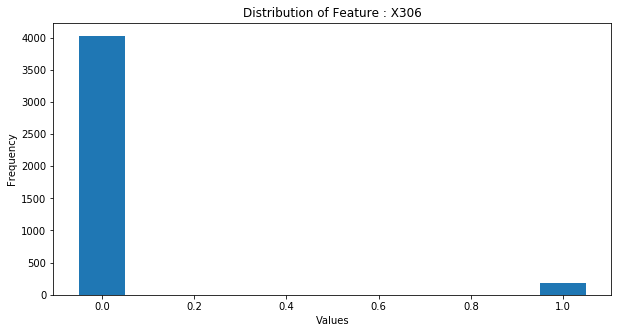

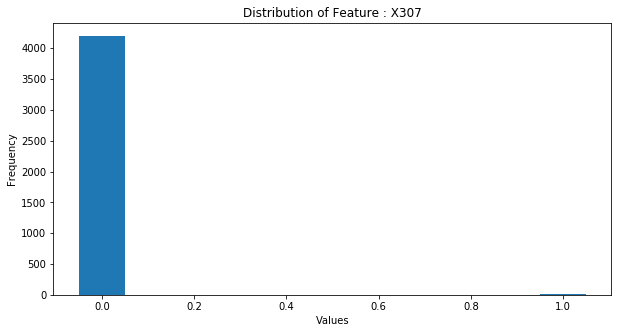

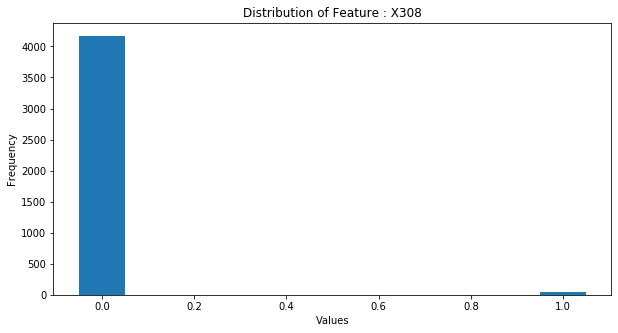

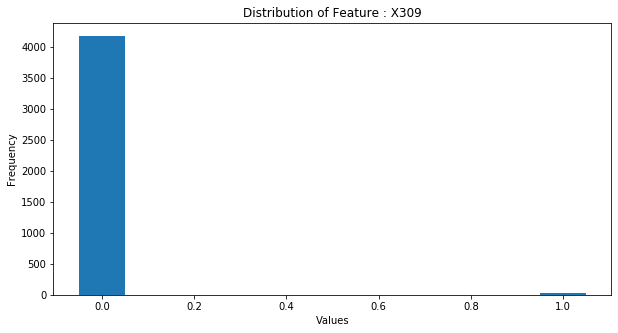

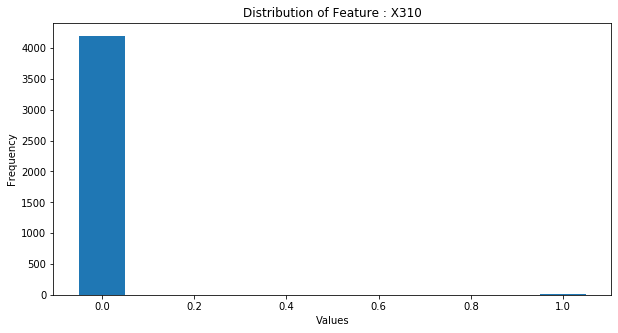

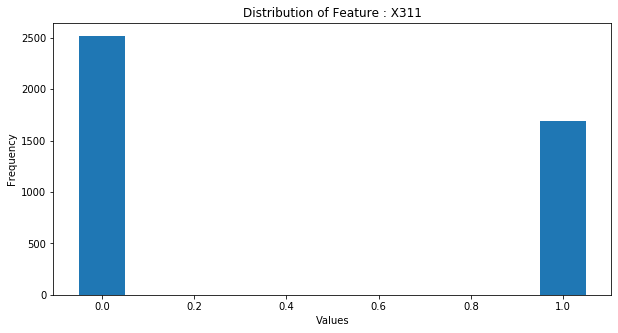

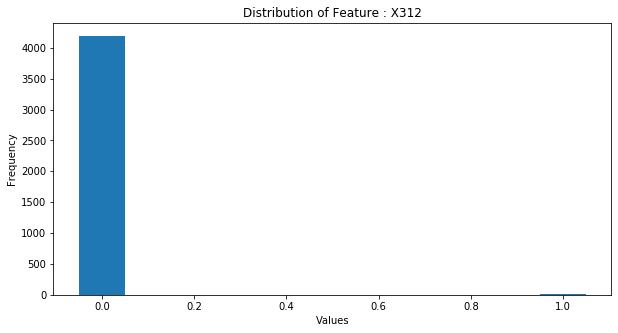

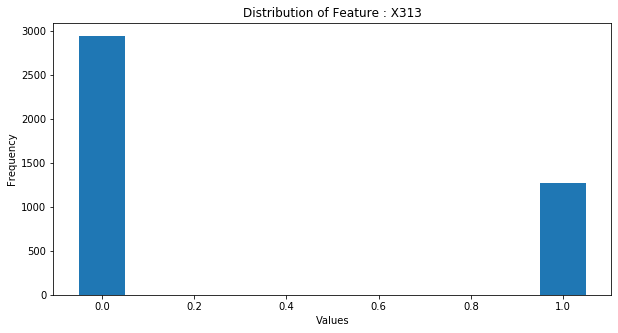

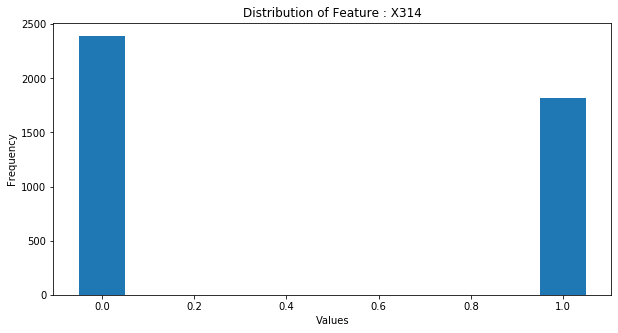

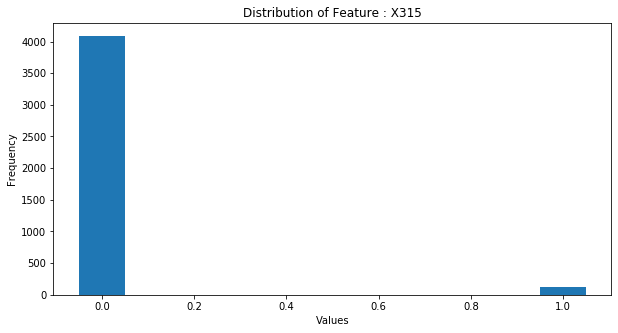

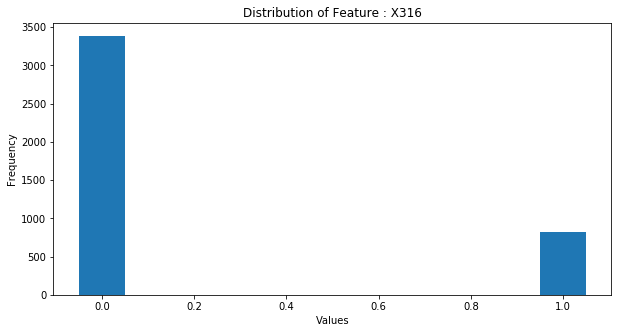

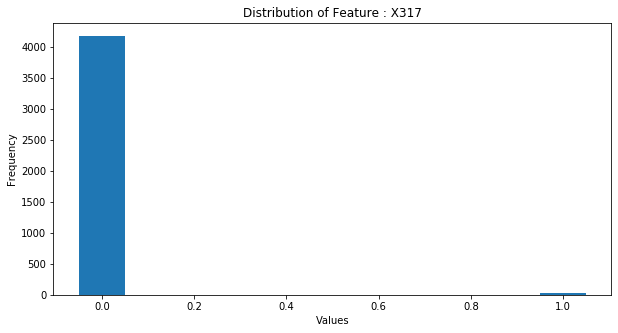

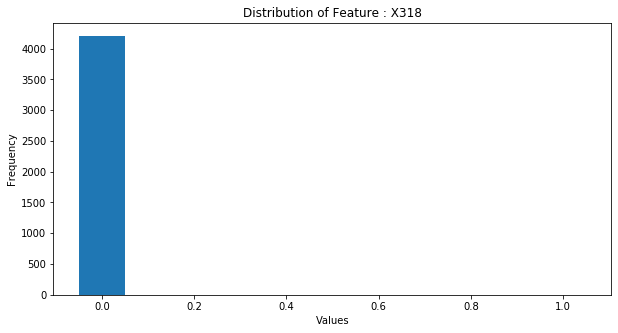

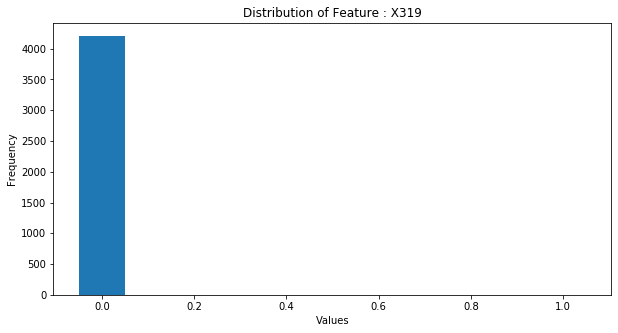

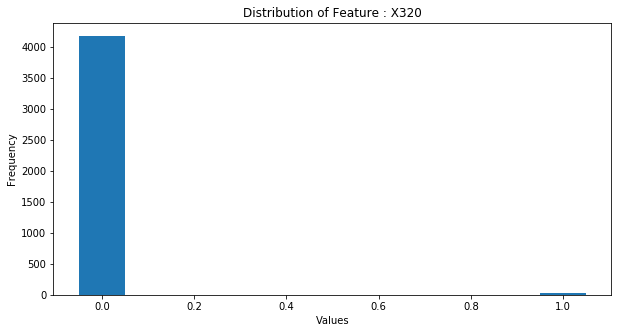

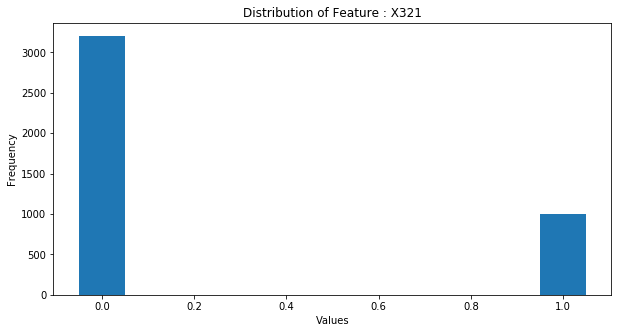

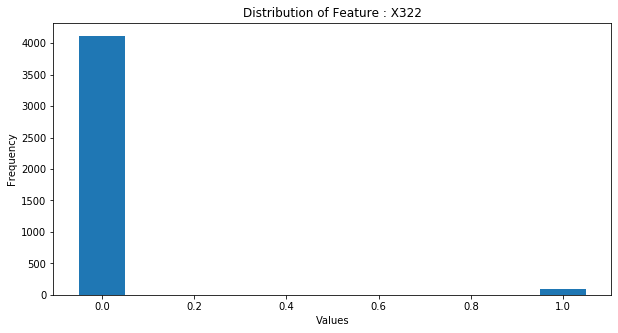

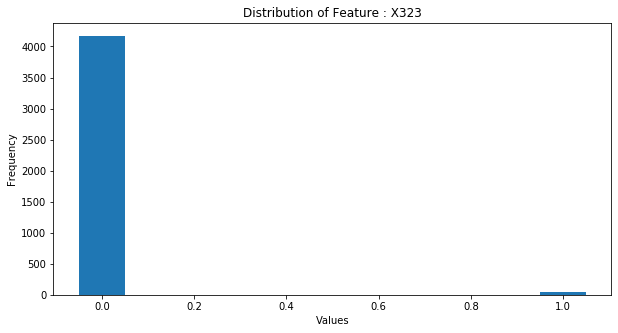

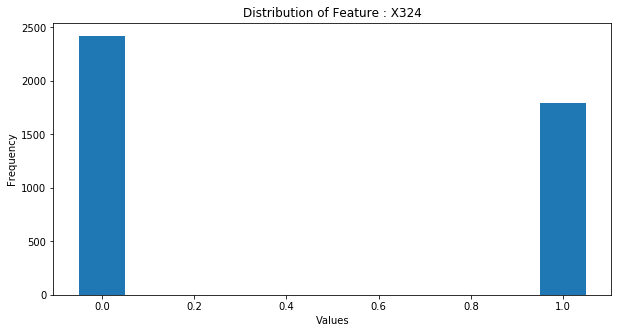

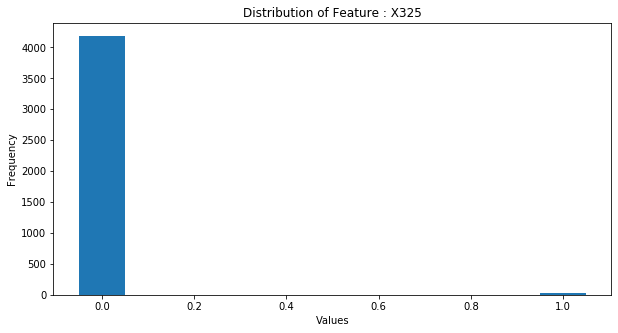

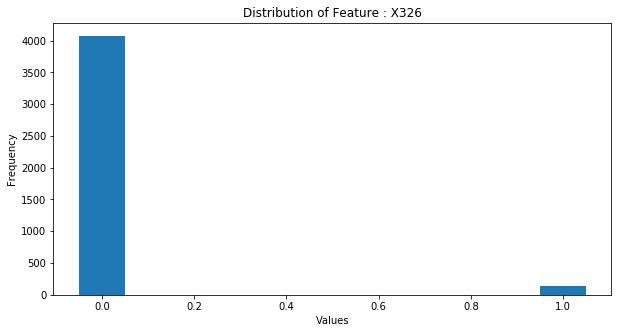

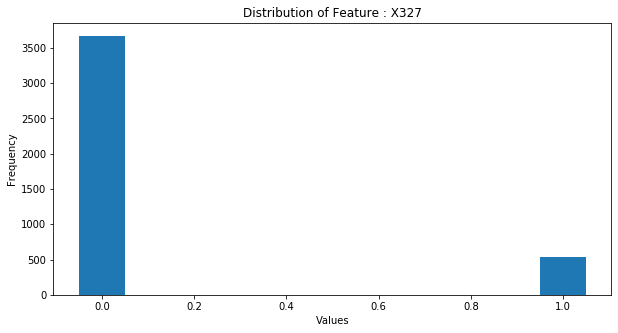

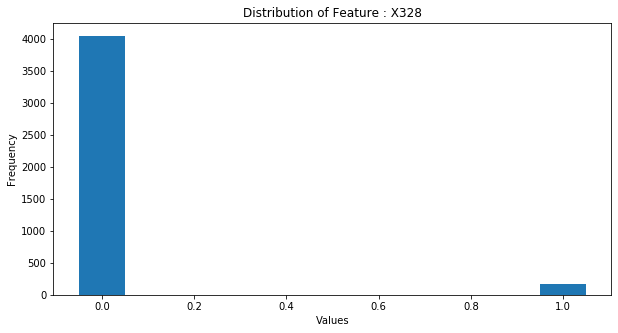

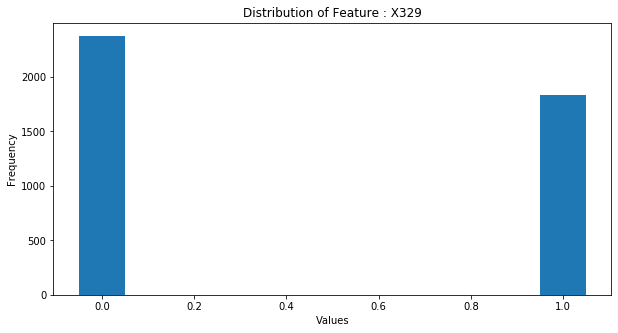

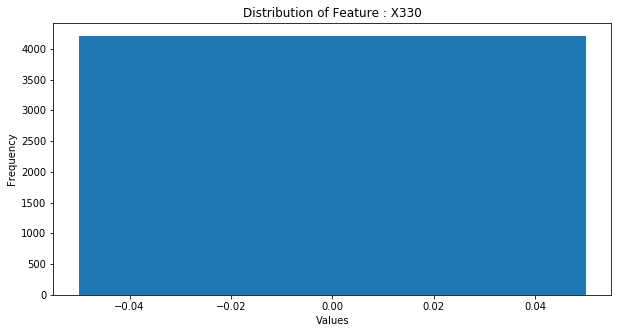

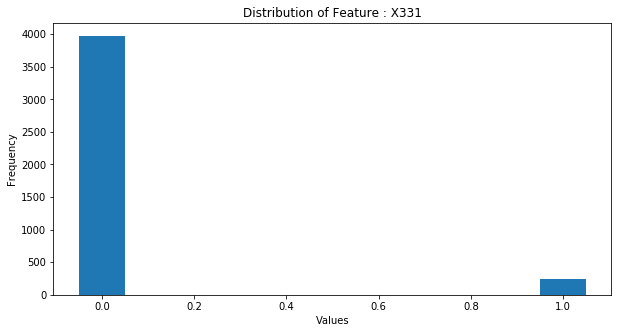

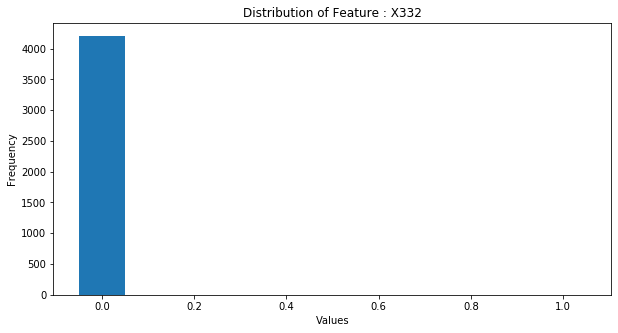

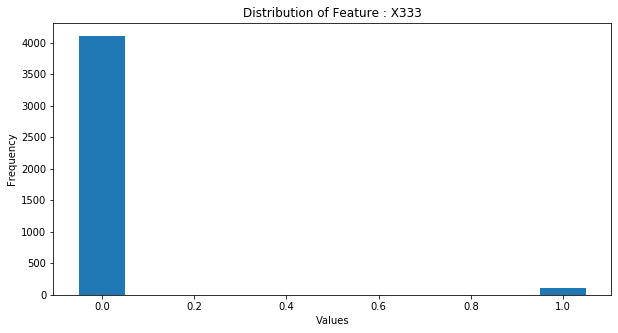

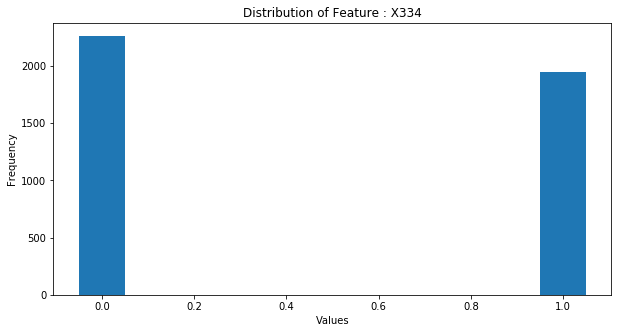

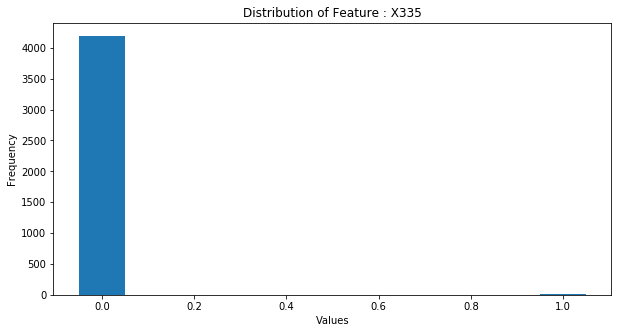

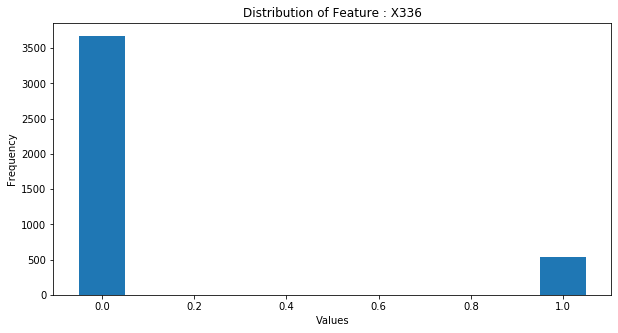

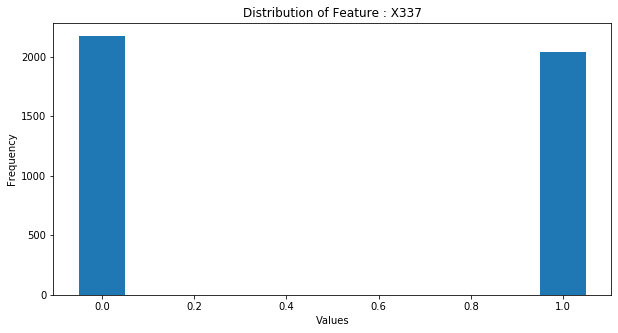

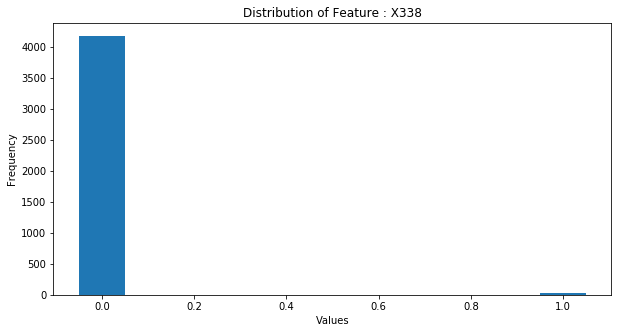

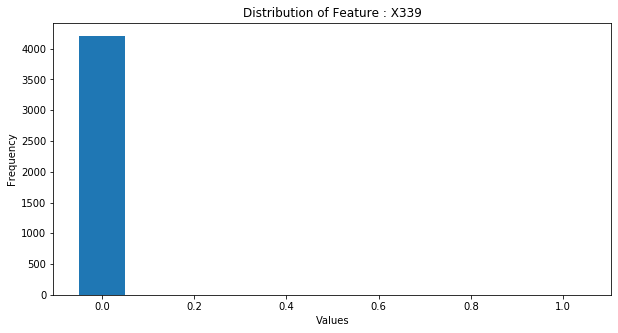

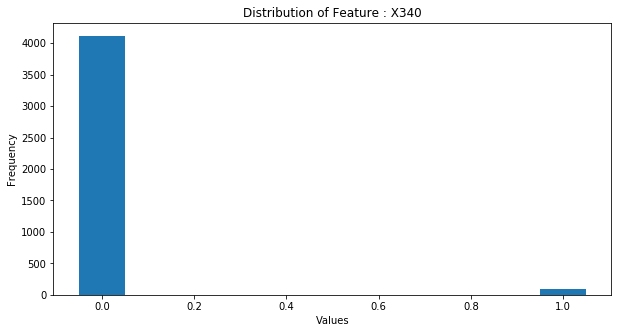

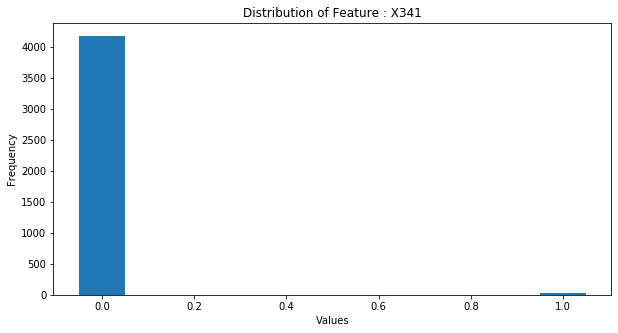

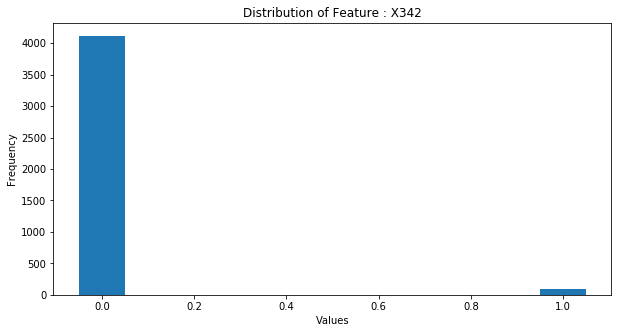

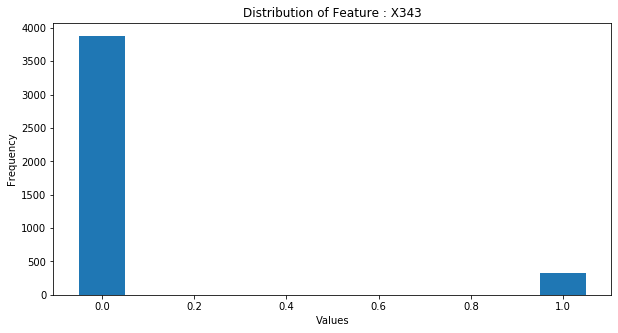

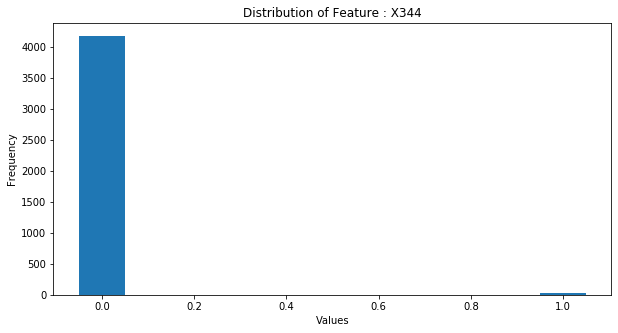

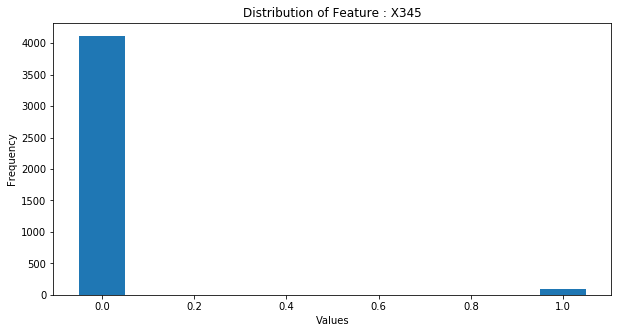

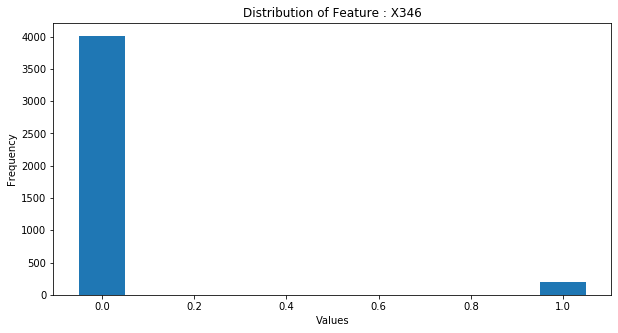

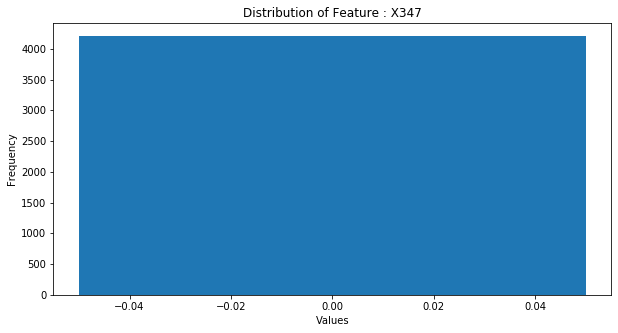

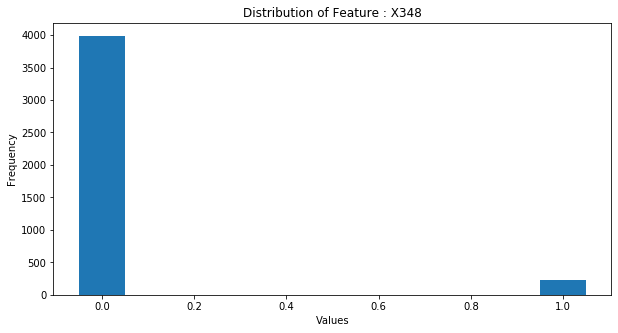

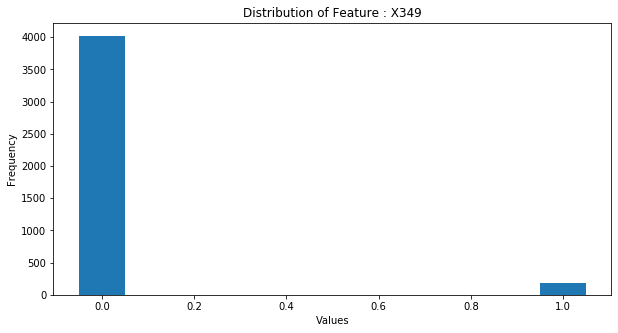

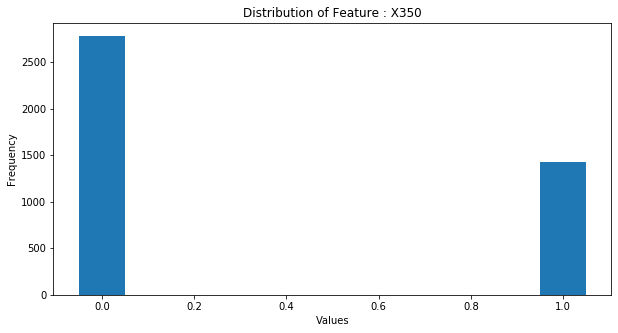

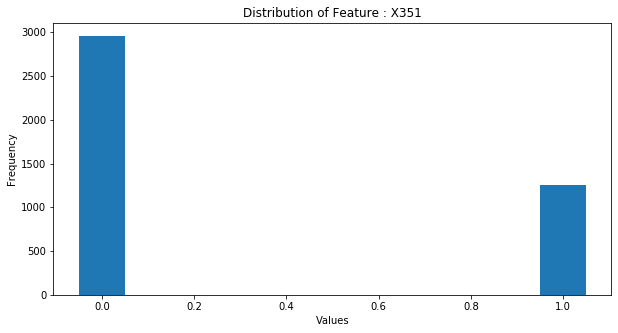

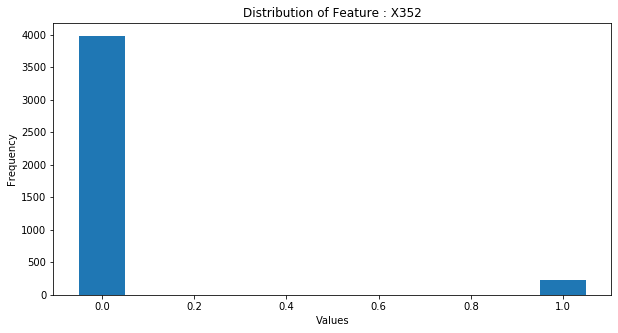

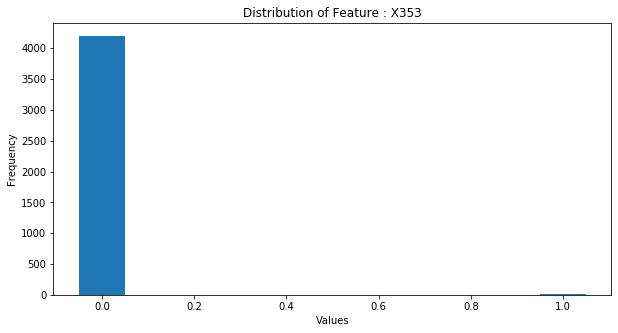

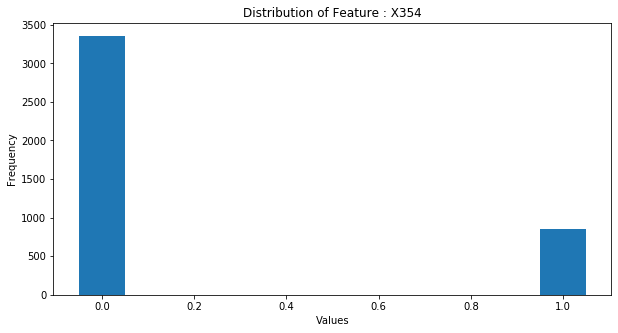

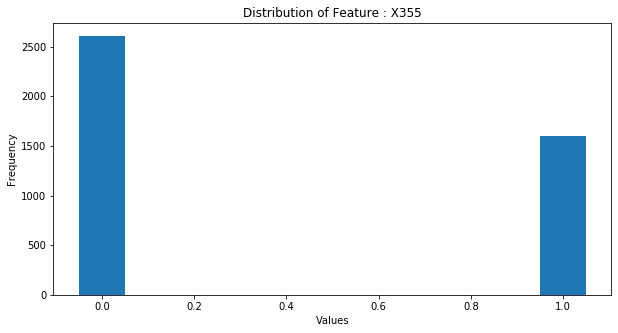

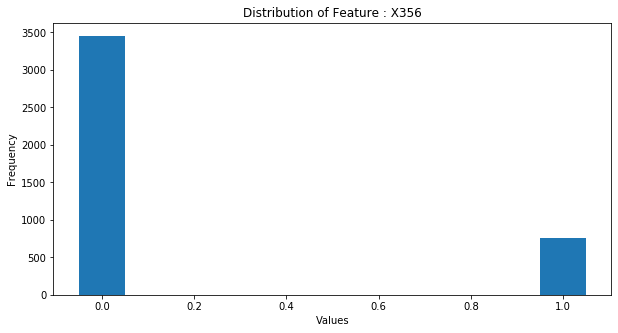

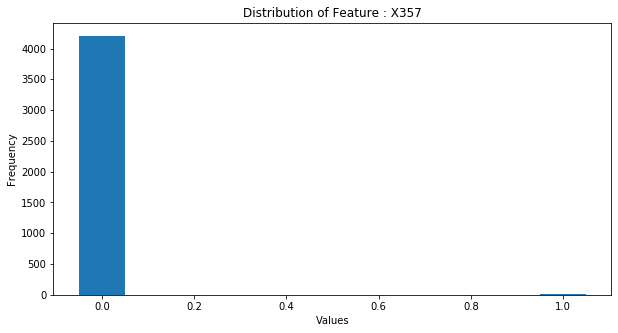

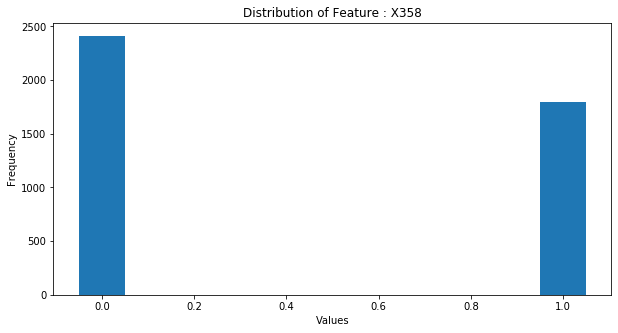

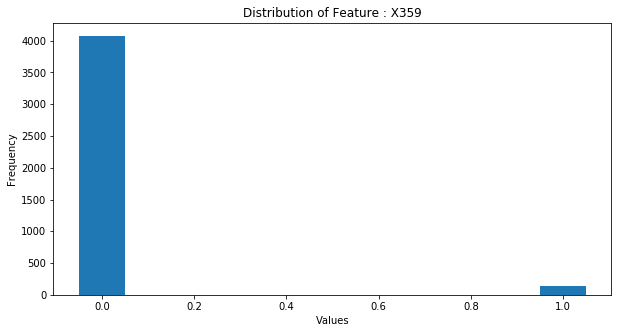

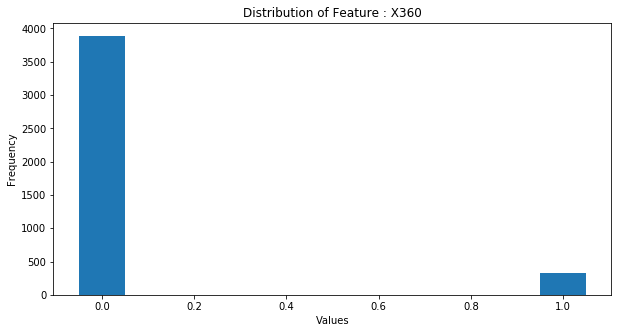

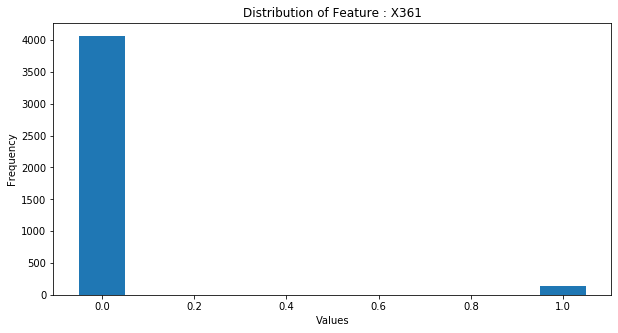

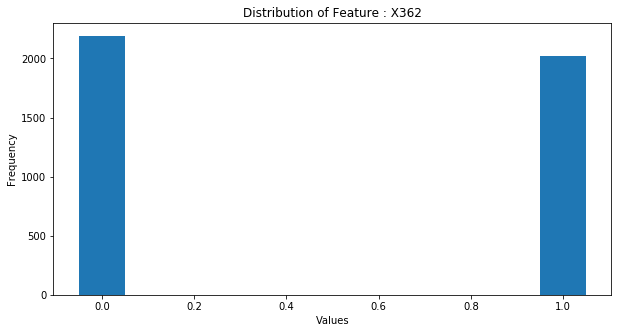

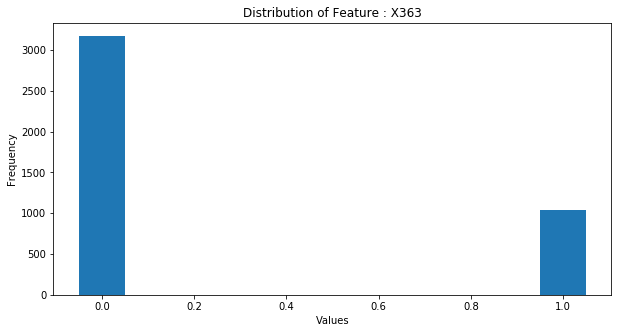

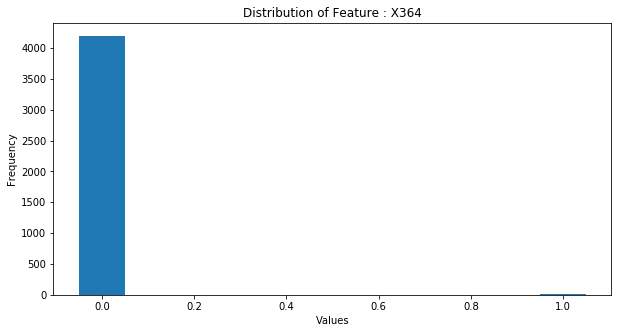

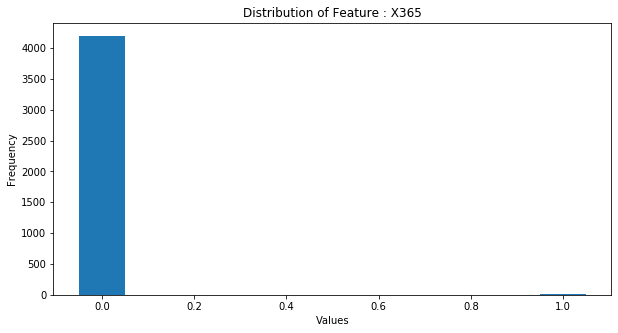

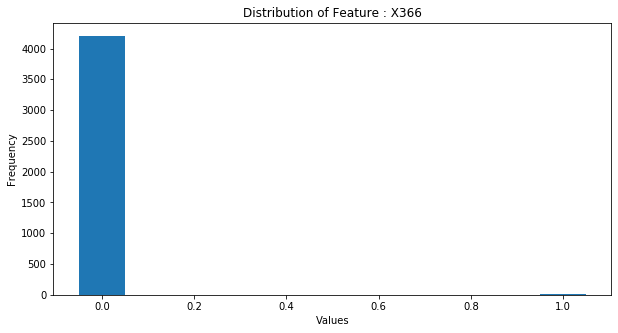

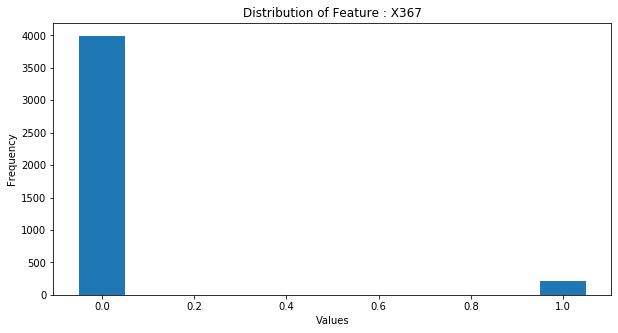

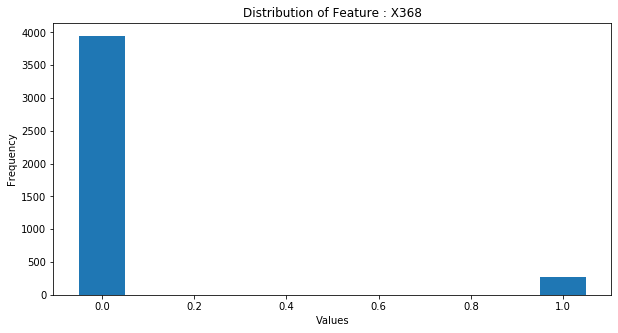

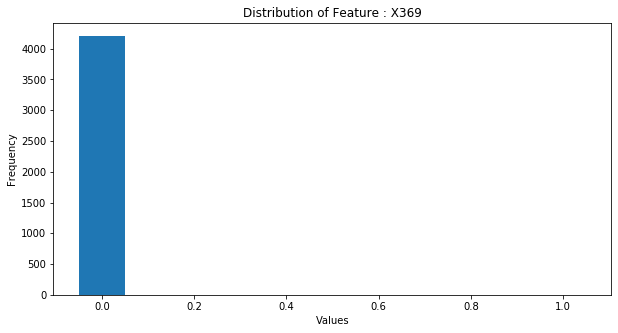

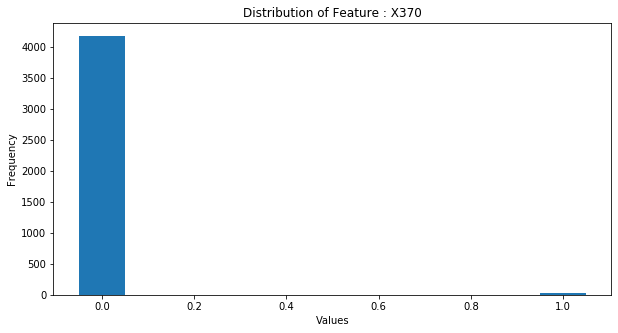

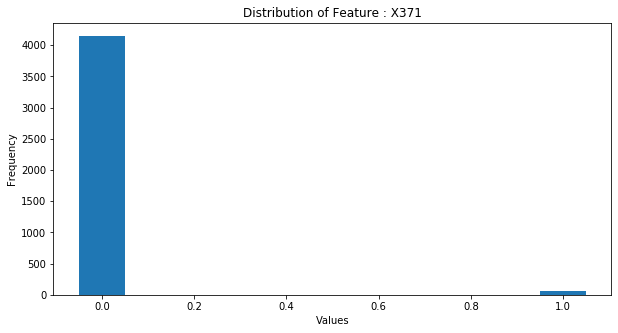

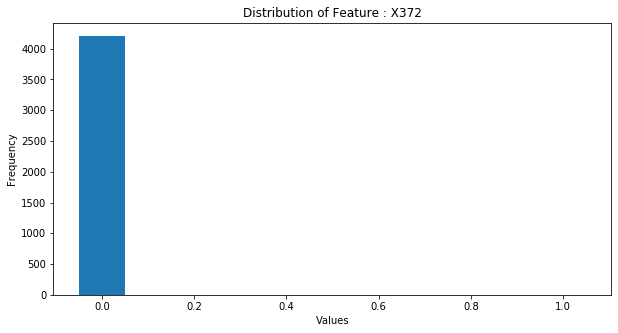

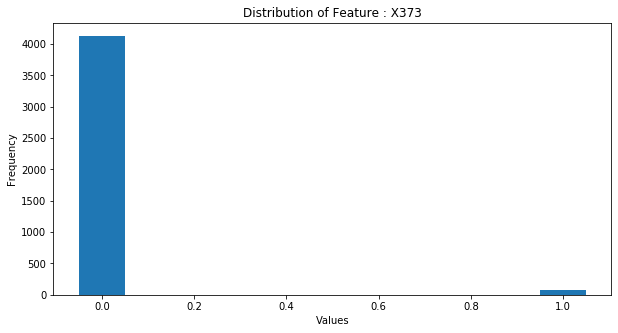

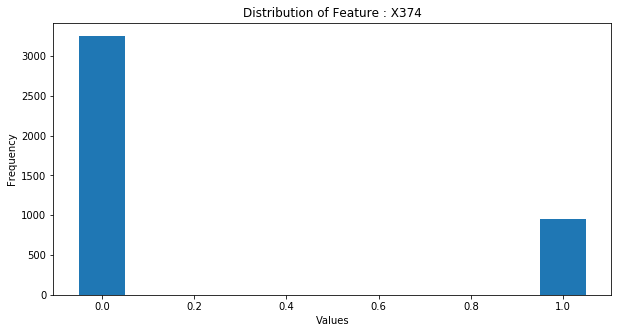

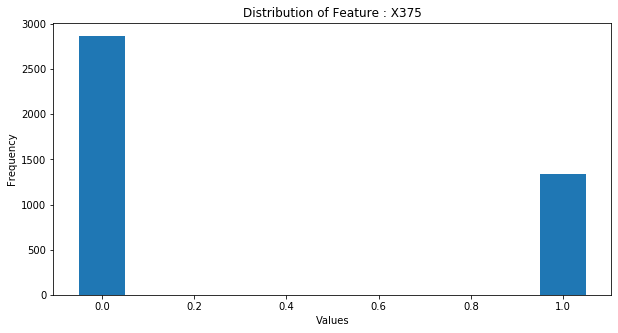

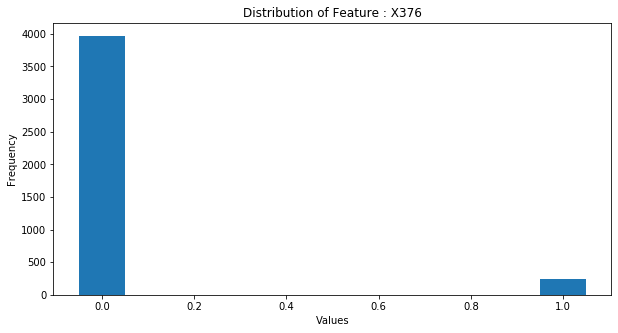

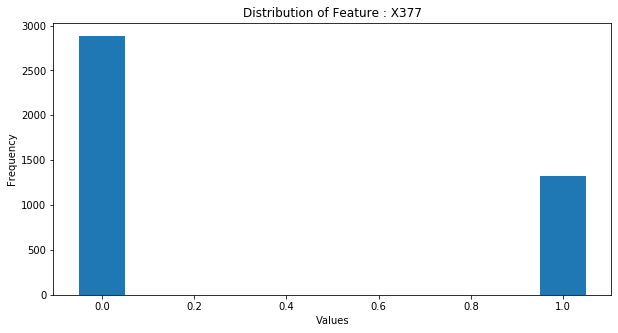

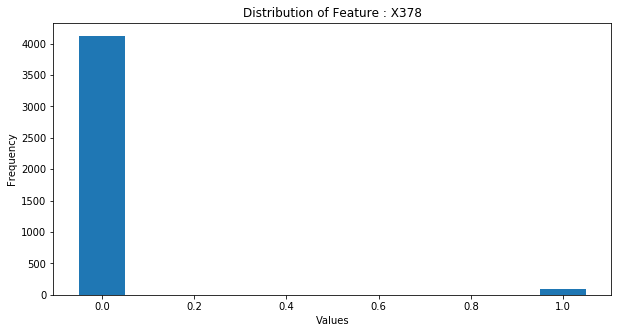

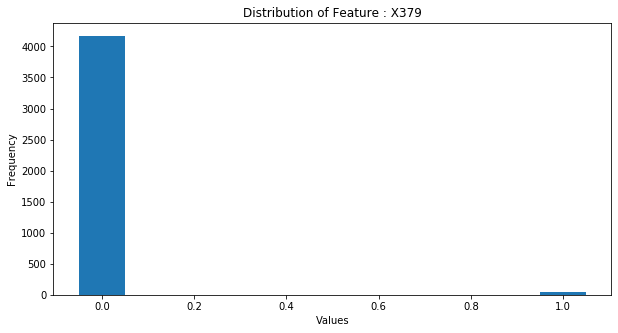

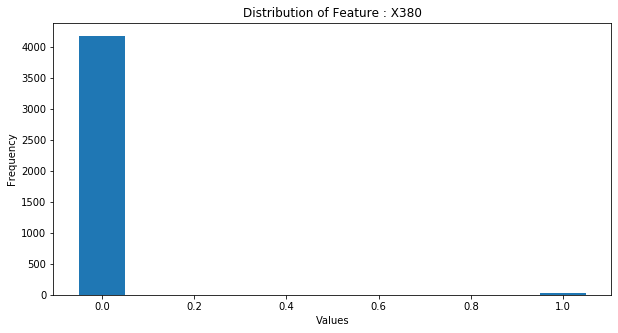

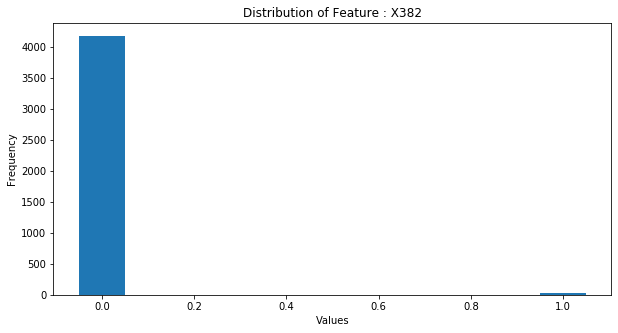

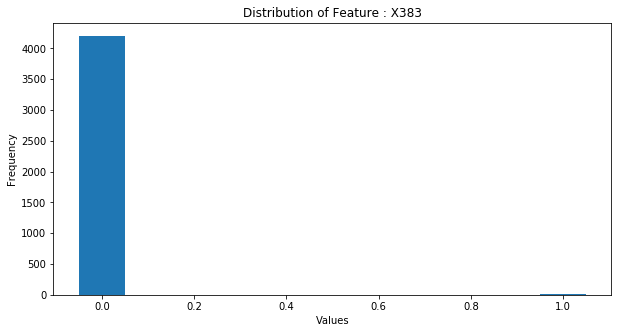

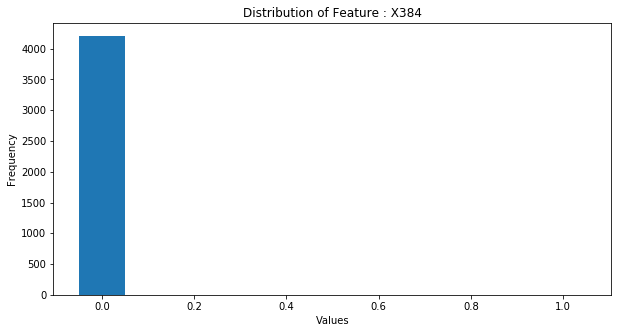

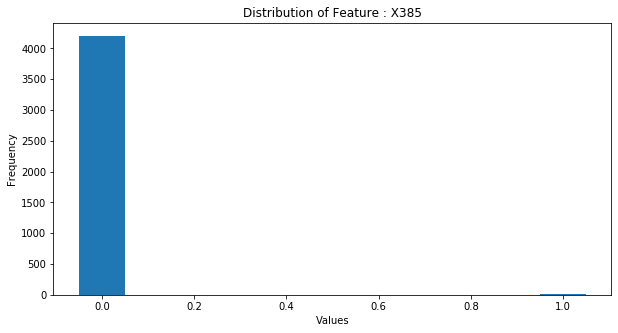

In [62]:
#Let us visualize the distribution of each of the features

for i in numerical_columns:
    b = df_train[i].value_counts()
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("Distribution of Feature : {}".format(i))
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.bar(range(len(b)), b.values, 0.1)
    plt.show()

Above we can see that all our numerical features contains Binary Values i.e. <b>0</b> or <b>1</b>

In [63]:
#Apply Label Encoder on our Categorical Features
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for c in cat_columns:
    df_train[c] = lb.fit_transform(df_train[c])


Since the Column named as <b>ID</b> is of no use so let us drop the column

In [64]:
#Dropping the ID column
df_train = df_train.iloc[:, 1:]

In [65]:
#Checking the corelation of the features with the Target Variable using corelation matrix and a heatmap
corrmat = df_train.corr()
corr_features = corrmat.index
corrmat

y        X0        X1        X2        X3        X4        X5  \
y     1.000000 -0.187081 -0.003032  0.078852 -0.150741 -0.015272 -0.039031   
X0   -0.187081  1.000000 -0.271123 -0.139904 -0.070645  0.017988  0.012293   
X1   -0.003032 -0.271123  1.000000  0.088266  0.205657 -0.020724  0.046417   
X2    0.078852 -0.139904  0.088266  1.000000 -0.093546  0.002289 -0.017722   
X3   -0.150741 -0.070645  0.205657 -0.093546  1.000000  0.015298 -0.008161   
X4   -0.015272  0.017988 -0.020724  0.002289  0.015298  1.000000  0.039778   
X5   -0.039031  0.012293  0.046417 -0.017722 -0.008161  0.039778  1.000000   
X6    0.004252  0.037549 -0.079119  0.065778 -0.048468  0.027854 -0.019917   
X8    0.003328  0.047735 -0.000306 -0.069932 -0.001249 -0.008909  0.012746   
X10  -0.026985  0.081122 -0.137193  0.042398  0.019663  0.003360 -0.006800   
X11        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
X12   0.089792 -0.134577  0.112263  0.131464  0.056166  0.008245  0.060161   
X13   0.048276 -0.130529  0.286683  0.222132 -0.216464  0.007179 -0.003452   
X14   0.193643 -0.138310  0.079784 -0.079183  0.045183  0.005544 -0.003439   
X15   0.023116  0.011491 -0.023295 -0.001613 -0.024059  0.000631 -0.003542   
X16   0.048946  0.003940 -0.005591 -0.020227 -0.008337 -0.061497 -0.032571   
X17  -0.159815 -0.060401  0.120044  0.024392 -0.046271  0.002533 -0.031128   
X18  -0.001789 -0.036495  0.068924 -0.060337 -0.028413  0.002572 -0.004646   
X19  -0.168895  0.203244 -0.207605 -0.312393 -0.068126  0.009622  0.009854   
X20  -0.095148  0.030838  0.030153 -0.494692  0.073098 -0.015761  0.008522   
X21   0.031111 -0.025532  0.069149 -0.018519 -0.032411  0.001481 -0.029751   
X22  -0.094320  0.147904 -0.129648  0.444380 -0.188833  0.008931 -0.050032   
X23  -0.078676  0.115098 -0.011723  0.115886  0.055659  0.004204 -0.033924   
X24  -0.003526  0.001554 -0.022323 -0.008234 -0.048153  0.001263  0.008780   
X26  -0.021173 -0.006131 -0.004501  0.030495 -0.041311  0.002049 -0.024992   
X27  -0.053483  0.050622 -0.048785  0.137151 -0.049081  0.021713  0.037836   
X28  -0.250288 -0.100412  0.127520  0.280952  0.162385  0.005308  0.026029   
X29  -0.379629 -0.149090  0.202989  0.209387  0.188854  0.006134  0.006306   
X30  -0.043247  0.062321  0.035667 -0.076038  0.078486  0.001949  0.010111   
X31  -0.086976  0.120973 -0.092994  0.110163 -0.080666  0.000695 -0.040828   
...        ...       ...       ...       ...       ...       ...       ...   
X355  0.124188  0.132281 -0.332577 -0.065141 -0.189158 -0.010442  0.022560   
X356 -0.019163  0.159288 -0.407207  0.017311 -0.392994  0.013551 -0.002591   
X357 -0.016526  0.015664  0.048057 -0.004134  0.041239  0.000998 -0.023996   
X358 -0.020961 -0.331767  0.492712 -0.020174  0.196666 -0.014025 -0.018653   
X359 -0.014465 -0.024918  0.124822 -0.015778  0.037152  0.005248 -0.022078   
X360  0.129839 -0.212191  0.240327  0.185954 -0.117218 -0.015865  0.037645   
X361  0.022974 -0.021215  0.244337  0.095281 -0.209929 -0.005427 -0.028669   
X362 -0.039556  0.417100 -0.553714 -0.121228 -0.208063  0.010831  0.035216   
X363  0.108564 -0.235644  0.209735 -0.086462  0.031959 -0.009071  0.028312   
X364  0.001008 -0.040265  0.026452  0.018530  0.048572  0.001547 -0.002205   
X365  0.001008 -0.040265  0.026452  0.018530  0.048572  0.001547 -0.002205   
X366 -0.001777  0.010643 -0.003694 -0.005400  0.017451  0.000998 -0.000586   
X367  0.100708 -0.054229 -0.045593 -0.044346 -0.203050 -0.007746  0.040783   
X368  0.101059 -0.081594 -0.052381  0.084253 -0.155343 -0.019036 -0.000097   
X369  0.015230  0.001967 -0.020739  0.019393  0.001006  0.000631 -0.003542   
X370  0.056700  0.050787  0.097932  0.170400 -0.009662  0.002368  0.007608   
X371 -0.215375 -0.085449  0.079697  0.175921  0.143799  0.003480 -0.003016   
X372 -0.036545 -0.015493  0.029105  0.033397  0.026072  0.000631  0.005708   
X373 -0.058952  0.021198 -0.123914 -0.102637  0.161539  0.004054 -0.007035   
X374  0.015378 -0.161102  0.202307 

In [66]:
#Seperating into features and targets; features:x; targets:y and splitting into train and test datasets
x = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0]

In [67]:
x.head(2)

X0  X1  X2  X3  X4  X5  X6  X8  X10  X11  ...  X375  X376  X377  X378  \
0  32  23  17   0   3  24   9  14    0    0  ...     0     0     1     0   
1  32  21  19   4   3  28  11  14    0    0  ...     1     0     0     0   

   X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  

[2 rows x 376 columns]

In [68]:
y.head(2)

0    130.81
1     88.53
Name: y, dtype: float64

In [69]:
#X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=50)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (3367, 376)
X_test shape: (842, 376)
y_train shape: (3367,)
y_test shape: (842,)


In [70]:
X_train.describe()

X0           X1           X2           X3           X4  \
count  3367.000000  3367.000000  3367.000000  3367.000000  3367.000000   
mean     29.783487    11.036531    17.435105     2.919216     2.997921   
std      13.691981     8.523124    10.999076     1.739242     0.075102   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      19.000000     3.000000     8.000000     2.000000     3.000000   
50%      34.000000    13.000000    16.000000     2.000000     3.000000   
75%      43.000000    20.000000    25.000000     5.000000     3.000000   
max      46.000000    26.000000    43.000000     6.000000     3.000000   

                X5           X6           X8          X10     X11  ...  \
count  3367.000000  3367.000000  3367.000000  3367.000000  3367.0  ...   
mean     13.377784     6.824770    11.559252     0.012771     0.0  ...   
std       8.232103     2.926441     7.030701     0.112302     0.0  ...   
min       0.000000     0.000000     0.000000     0.000000     0.0  ...   
25%       5.000000     6.000000     5.000000     0.000000     0.0  ...   
50%      15.000000     7.000000    11.000000     0.000000     0.0  ...   
75%      21.000000     9.000000    18.000000     0.000000     0.0  ...   
max      28.000000    11.000000    24.000000     1.000000     0.0  ...   

              X375         X376         X377         X378         X379  \
count  3367.000000  3367.000000  3367.000000  3367.000000  3367.000000   
mean      0.316305     0.055539     0.318978     0.020790     0.008019   
std       0.465103     0.229063     0.466150     0.142702     0.089202   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  3367.000000  3367.000000  3367.000000  3367.000000  3367.000000  
mean      0.009207     0.007722     0.002079     0.000594     0.001188  
std       0.095525     0.087548     0.045555     0.024369     0.034452  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 376 columns]

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
#Applying PCA for Dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [77]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.06998126, 0.05852054, 0.04563933, 0.03505086, 0.03337323,
       0.03211491, 0.02919265, 0.02161151, 0.02009445, 0.01809579,
       0.01669524, 0.01589546, 0.01516178, 0.014688  , 0.01372198,
       0.01304428, 0.0126878 , 0.01188957, 0.01151958, 0.01055821,
       0.01006472, 0.00980511, 0.00932384, 0.00918307, 0.00884621,
       0.00801141, 0.00789251, 0.00777049, 0.00737324, 0.00730197,
       0.00704475, 0.0069437 , 0.00667147, 0.00653083, 0.00635051,
       0.00624716, 0.00603357, 0.00592768, 0.00580241, 0.00576062,
       0.00559999, 0.00538651, 0.00536086, 0.00531001, 0.00517275,
       0.00503008, 0.00480851, 0.00465086, 0.00463314, 0.00450549,
       0.00445468, 0.00438372, 0.00431256, 0.0042321 , 0.0041687 ,
       0.00413557, 0.00405107, 0.00399252, 0.00391292, 0.00388273,
       0.00373857, 0.0037115 , 0.00368403, 0.00362524, 0.00356784,
       0.00354312, 0.00347297, 0.00342174, 0.0033904 , 0.00334087,
       0.00330342, 0.00323841, 0.00320718, 0.00320136, 0.00316

In [83]:
sum(explained_variance)

0.9507186821565075

In [78]:
principal_components = len(explained_variance)
principal_components

144

So from <b>376 Dimensions</b> we are able to reduce our data to 144 dimensions or 144 principal components

In [80]:
len(X_train[0])

144

In [104]:
import xgboost as xgb
from sklearn.metrics import r2_score

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)
params ={}
params["objective"] = 'reg:linear'
params["eta"] = 0.01
params["max_depth"] = 4

watchlist = [(d_train, 'train'), (d_test, 'test')]

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

In [105]:
#Regressor
clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=200,
               feval=xgb_r2_score, maximize=True, verbose_eval=10)

[22:22:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:99.8586	test-rmse:100.421	train-r2:-59.9993	test-r2:-66.4883
Multiple eval metrics have been passed: 'test-r2' will be used for early stopping.

Will train until test-r2 hasn't improved in 200 rounds.
[10]	train-rmse:90.4339	test-rmse:90.9516	train-r2:-49.0284	test-r2:-54.3603
[20]	train-rmse:81.9196	test-rmse:82.3952	train-r2:-40.0515	test-r2:-44.4341
[30]	train-rmse:74.2279	test-rmse:74.6559	train-r2:-32.7046	test-r2:-36.2998
[40]	train-rmse:67.2812	test-rmse:67.6624	train-r2:-26.6912	test-r2:-29.6388
[50]	train-rmse:61.0097	test-rmse:61.3517	train-r2:-21.7694	test-r2:-24.1901
[60]	train-rmse:55.3496	test-rmse:55.6485	train-r2:-17.7406	test-r2:-19.7245
[70]	train-rmse:50.2423	test-rmse:50.5045	train-r2:-14.4416	test-r2:-16.0702
[80]	train-rmse:45.6369	test-rmse:45.8657	train-r2:-11.7405